In [2]:
from collections import defaultdict
import matplotlib.pyplot as plt

In [47]:
# dictionary mapping word length to a list of words of that length
word_lengths = {i: [] for i in range(1, 32)} 

# dictionary mapping word length to the number of words of that length
word_length_counts = {i: 0 for i in range(1, 32)} 

with open('words_alpha.txt', 'r') as words:
    for word in words.read().split():
        word_lengths[len(word)].append(word)
        word_length_counts[len(word)] += 1

# Distribution of Word Lengths

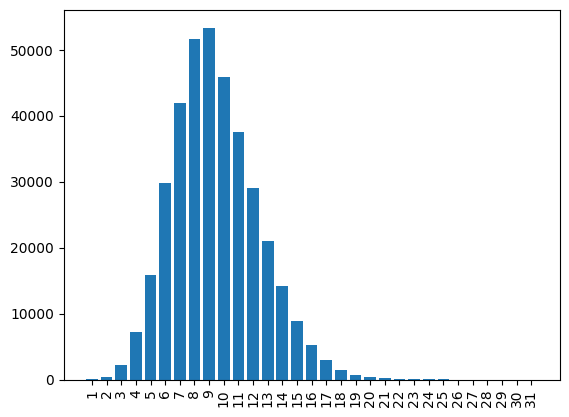

In [48]:
keys = list(word_length_counts.keys())
values = list(word_length_counts.values())
x_pos = range(len(keys))
plt.bar(x_pos, values)
plt.xticks(x_pos, keys, rotation=90)
plt.show()

# Character Frequency Analysis
- compute the frequency of each character for all words of all different lengths
    - e.g. the number of 'a's that occur in all five-letter words
- compute the percentage of each character for all words of all different lengths
    - e.g. the percentage of 'a's in all five-letter words relative to all other characters
- define a function to compute the frequency score
    - sum of all frequency percentages for each character in the word
    - allows you to rank any word based on how common the characters are relative to all other words of the samelength
    - function rewards unique characters 
        - only counts the value for each character once using a set
- sort words of length n by frequency score
    - allows you to compute the n letter word with the highest frequency score

In [205]:
def compute_frequencies():
    frequencies = {} 
    percentages = {}
    alphabet = [chr(i) for i in range(97, 123)] # list with each character from a to z
    for key in word_lengths:
        char_frequencies = {char: 0 for char in alphabet}
        char_percentages = {char: 0 for char in alphabet}
        total_chars = 0

        for word in word_lengths[key]:
            for char in word:
                char_frequencies[char] += 1
                total_chars += 1

        for char in char_frequencies:
            if total_chars > 0:
                char_percentages[char] = char_frequencies[char] / total_chars
            else:
                char_percentages[char] = 0

        frequencies[key] = char_frequencies
        percentages[key] = char_percentages
        
    return frequencies, percentages

In [206]:
def plot_frequencies(frequencies):
    for key in word_lengths:
        print(key)
        print(frequencies[key])
        keys = list(frequencies[key].keys())
        values = list(frequencies[key].values())
        x_pos = range(len(keys))
        plt.bar(x_pos, values)
        plt.xticks(x_pos, keys)
        plt.show()

1
{'a': 1, 'b': 1, 'c': 1, 'd': 1, 'e': 1, 'f': 1, 'g': 1, 'h': 1, 'i': 1, 'j': 1, 'k': 1, 'l': 1, 'm': 1, 'n': 1, 'o': 1, 'p': 1, 'q': 1, 'r': 1, 's': 1, 't': 1, 'u': 1, 'v': 1, 'w': 1, 'x': 1, 'y': 1, 'z': 1}


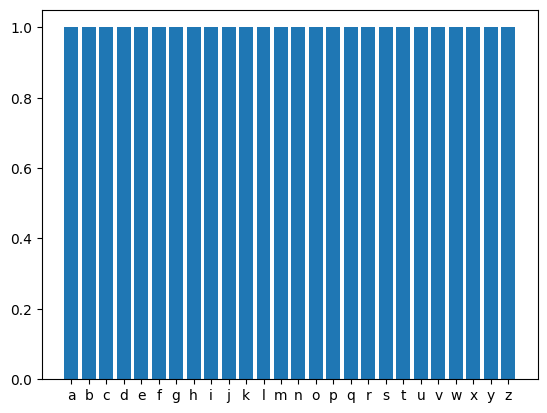

2
{'a': 46, 'b': 37, 'c': 38, 'd': 42, 'e': 40, 'f': 34, 'g': 34, 'h': 32, 'i': 39, 'j': 10, 'k': 25, 'l': 40, 'm': 44, 'n': 35, 'o': 41, 'p': 36, 'q': 19, 'r': 36, 's': 47, 't': 41, 'u': 30, 'v': 29, 'w': 28, 'x': 18, 'y': 24, 'z': 9}


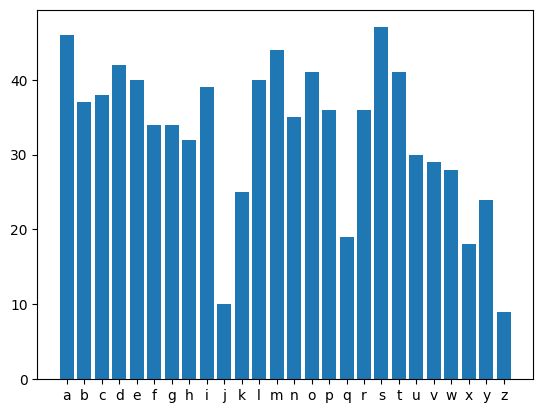

3
{'a': 597, 'b': 225, 'c': 224, 'd': 287, 'e': 473, 'f': 174, 'g': 222, 'h': 207, 'i': 368, 'j': 60, 'k': 131, 'l': 271, 'm': 246, 'n': 234, 'o': 461, 'p': 297, 'q': 30, 'r': 305, 's': 363, 't': 350, 'u': 290, 'v': 89, 'w': 158, 'x': 81, 'y': 196, 'z': 51}


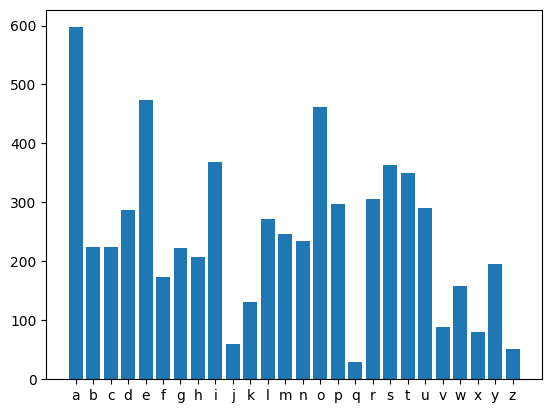

4
{'a': 2974, 'b': 813, 'c': 857, 'd': 1105, 'e': 2637, 'f': 566, 'g': 814, 'h': 835, 'i': 1787, 'j': 211, 'k': 800, 'l': 1506, 'm': 944, 'n': 1349, 'o': 2166, 'p': 954, 'q': 52, 'r': 1603, 's': 2007, 't': 1468, 'u': 1277, 'v': 308, 'w': 572, 'x': 164, 'y': 774, 'z': 197}


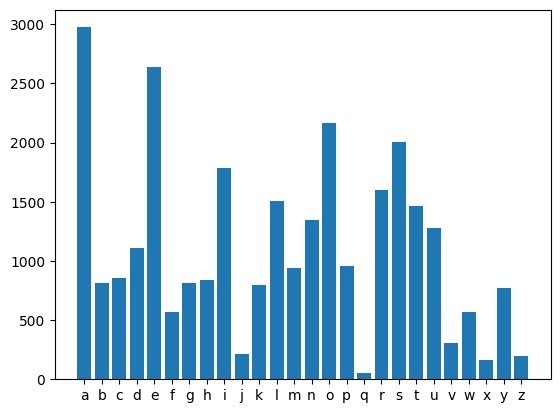

5
{'a': 8392, 'b': 2089, 'c': 2744, 'd': 2811, 'e': 7800, 'f': 1238, 'g': 1971, 'h': 2284, 'i': 5067, 'j': 376, 'k': 1743, 'l': 4246, 'm': 2494, 'n': 4043, 'o': 5219, 'p': 2299, 'q': 139, 'r': 5143, 's': 6537, 't': 4189, 'u': 3361, 'v': 878, 'w': 1171, 'x': 361, 'y': 2521, 'z': 474}


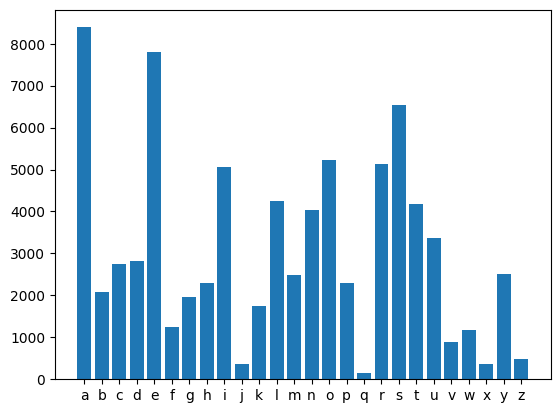

6
{'a': 17451, 'b': 4521, 'c': 6489, 'd': 7049, 'e': 20695, 'f': 2567, 'g': 4798, 'h': 4890, 'i': 12493, 'j': 696, 'k': 2889, 'l': 9920, 'm': 5609, 'n': 10568, 'o': 11025, 'p': 5051, 'q': 299, 'r': 12631, 's': 12789, 't': 9740, 'u': 7678, 'v': 1734, 'w': 2168, 'x': 607, 'y': 4024, 'z': 863}


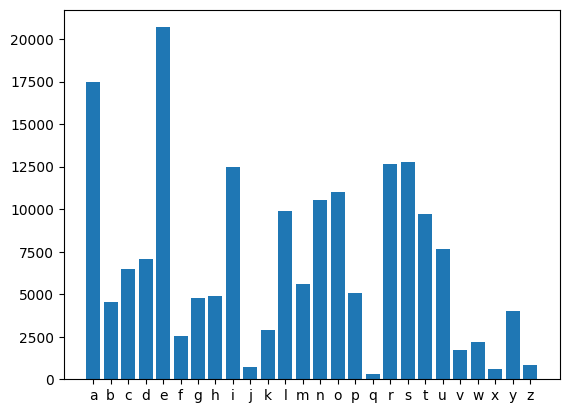

7
{'a': 27045, 'b': 6822, 'c': 11162, 'd': 11265, 'e': 33444, 'f': 4165, 'g': 8352, 'h': 7606, 'i': 23173, 'j': 851, 'k': 4052, 'l': 16579, 'm': 8858, 'n': 18270, 'o': 17909, 'p': 8494, 'q': 549, 'r': 21022, 's': 22182, 't': 16909, 'u': 11776, 'v': 2578, 'w': 3368, 'x': 907, 'y': 5341, 'z': 1300}


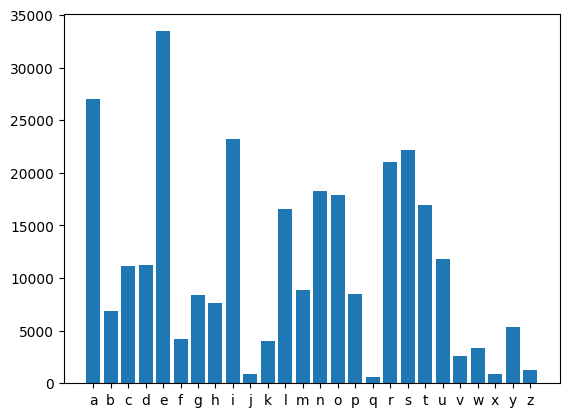

8
{'a': 36080, 'b': 8863, 'c': 16123, 'd': 15823, 'e': 47123, 'f': 5713, 'g': 10843, 'h': 10443, 'i': 34173, 'j': 775, 'k': 5083, 'l': 23660, 'm': 12569, 'n': 26595, 'o': 26914, 'p': 11691, 'q': 777, 'r': 29481, 's': 31762, 't': 24901, 'u': 15516, 'v': 3860, 'w': 4392, 'x': 1204, 'y': 7078, 'z': 1566}


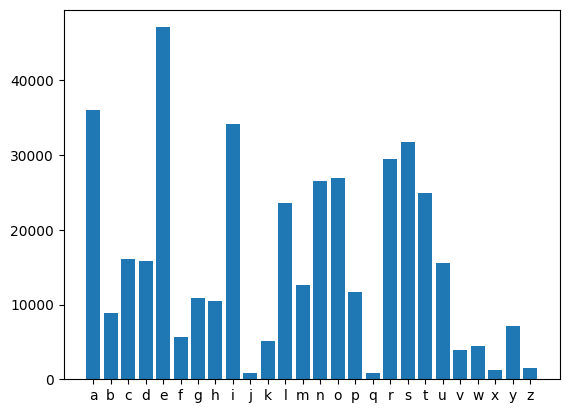

9
{'a': 40277, 'b': 9127, 'c': 19779, 'd': 17486, 'e': 54788, 'f': 6015, 'g': 11826, 'h': 12332, 'i': 42024, 'j': 752, 'k': 4649, 'l': 26501, 'm': 14622, 'n': 32508, 'o': 32333, 'p': 14382, 'q': 848, 'r': 34604, 's': 37097, 't': 30884, 'u': 17493, 'v': 4442, 'w': 4111, 'x': 1512, 'y': 8214, 'z': 2012}


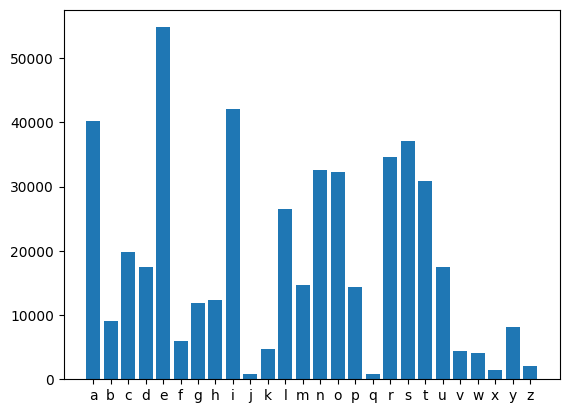

10
{'a': 37271, 'b': 8315, 'c': 19871, 'd': 15964, 'e': 51484, 'f': 5281, 'g': 11380, 'h': 11907, 'i': 42029, 'j': 579, 'k': 3206, 'l': 25335, 'm': 14107, 'n': 32960, 'o': 32392, 'p': 14621, 'q': 769, 'r': 33123, 's': 31530, 't': 30468, 'u': 17037, 'v': 4270, 'w': 2894, 'x': 1382, 'y': 8680, 'z': 1865}


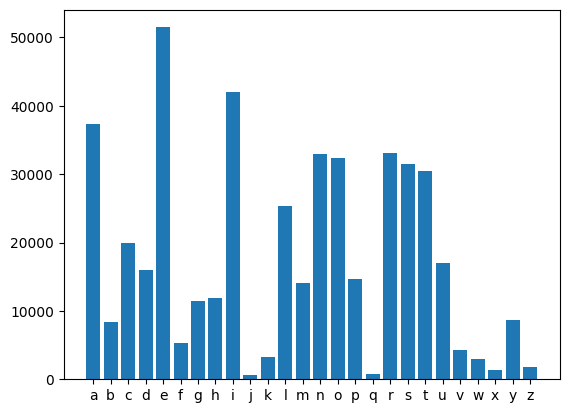

11
{'a': 33726, 'b': 6873, 'c': 19290, 'd': 13061, 'e': 44141, 'f': 4271, 'g': 9873, 'h': 11014, 'i': 39456, 'j': 393, 'k': 1998, 'l': 22478, 'm': 12583, 'n': 31038, 'o': 30292, 'p': 14102, 'q': 668, 'r': 30023, 's': 27039, 't': 28522, 'u': 15322, 'v': 3924, 'w': 1779, 'x': 1273, 'y': 8138, 'z': 1641}


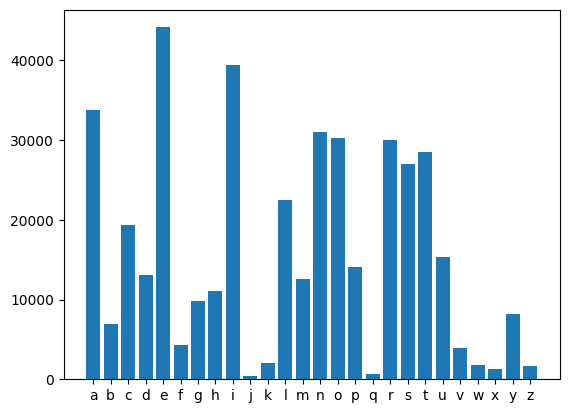

12
{'a': 28226, 'b': 5389, 'c': 16777, 'd': 10020, 'e': 36303, 'f': 3263, 'g': 7868, 'h': 9354, 'i': 33895, 'j': 285, 'k': 1106, 'l': 19211, 'm': 10425, 'n': 27588, 'o': 26830, 'p': 12255, 'q': 578, 'r': 24734, 's': 23381, 't': 24846, 'u': 13251, 'v': 3326, 'w': 913, 'x': 1000, 'y': 7209, 'z': 1479}


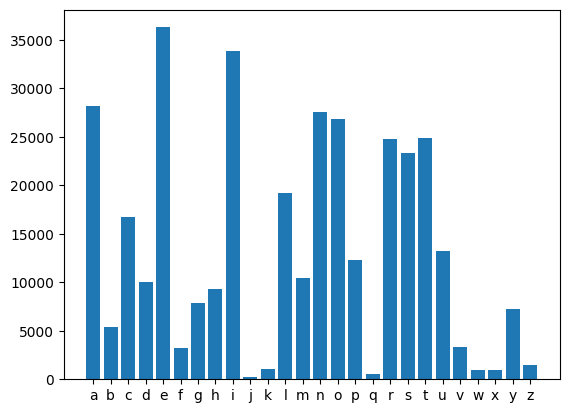

13
{'a': 22069, 'b': 4063, 'c': 13446, 'd': 6922, 'e': 27270, 'f': 2399, 'g': 5500, 'h': 7001, 'i': 27191, 'j': 203, 'k': 562, 'l': 15189, 'm': 8010, 'n': 22339, 'o': 21719, 'p': 9867, 'q': 416, 'r': 18796, 's': 18446, 't': 19706, 'u': 10191, 'v': 2652, 'w': 437, 'x': 791, 'y': 5866, 'z': 1221}


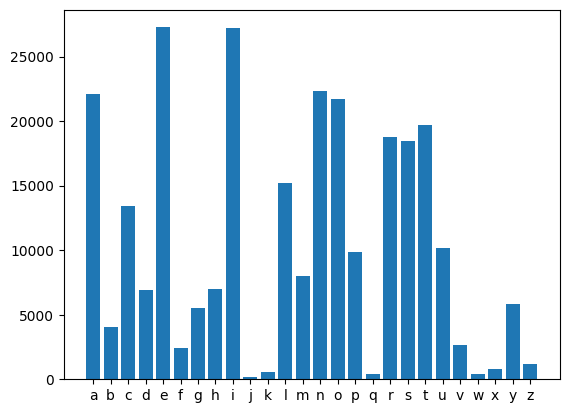

14
{'a': 15944, 'b': 2744, 'c': 9788, 'd': 4760, 'e': 19536, 'f': 1563, 'g': 3691, 'h': 5113, 'i': 19798, 'j': 111, 'k': 253, 'l': 11306, 'm': 5582, 'n': 16701, 'o': 16228, 'p': 7213, 'q': 356, 'r': 13390, 's': 13962, 't': 14669, 'u': 7400, 'v': 1935, 'w': 232, 'x': 510, 'y': 4466, 'z': 821}


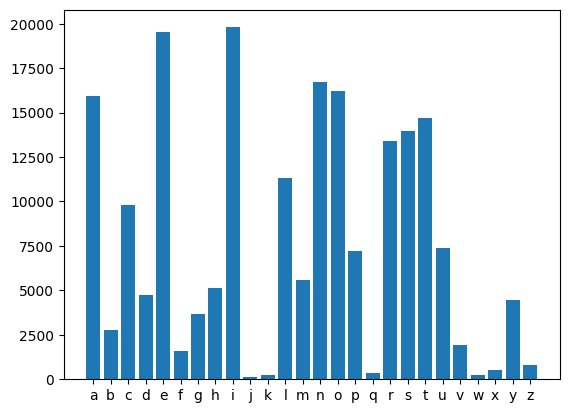

15
{'a': 10785, 'b': 1774, 'c': 6590, 'd': 2862, 'e': 12718, 'f': 963, 'g': 2369, 'h': 3556, 'i': 13314, 'j': 70, 'k': 175, 'l': 7640, 'm': 3783, 'n': 11394, 'o': 11126, 'p': 4962, 'q': 191, 'r': 8833, 's': 9496, 't': 9866, 'u': 4762, 'v': 1294, 'w': 102, 'x': 297, 'y': 3211, 'z': 557}


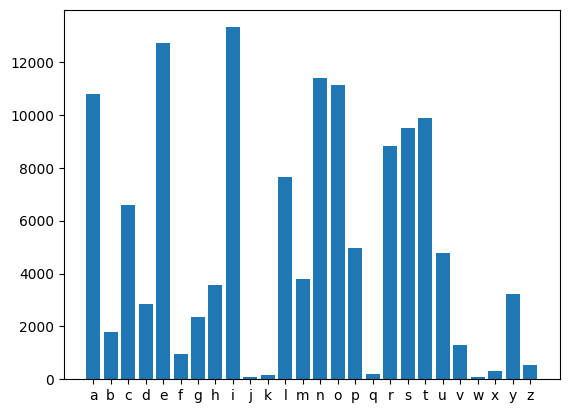

16
{'a': 6600, 'b': 1108, 'c': 4197, 'd': 1657, 'e': 8014, 'f': 535, 'g': 1403, 'h': 2330, 'i': 8123, 'j': 32, 'k': 64, 'l': 4833, 'm': 2316, 'n': 7131, 'o': 7128, 'p': 3192, 'q': 97, 'r': 5537, 's': 6039, 't': 6255, 'u': 2876, 'v': 784, 'w': 48, 'x': 190, 'y': 2116, 'z': 307}


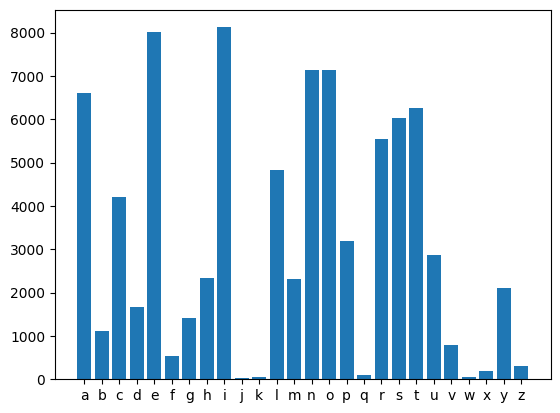

17
{'a': 4009, 'b': 614, 'c': 2576, 'd': 999, 'e': 4802, 'f': 252, 'g': 798, 'h': 1495, 'i': 4948, 'j': 22, 'k': 46, 'l': 2894, 'm': 1423, 'n': 4367, 'o': 4519, 'p': 1977, 'q': 52, 'r': 3291, 's': 3785, 't': 3862, 'u': 1667, 'v': 479, 'w': 21, 'x': 99, 'y': 1243, 'z': 199}


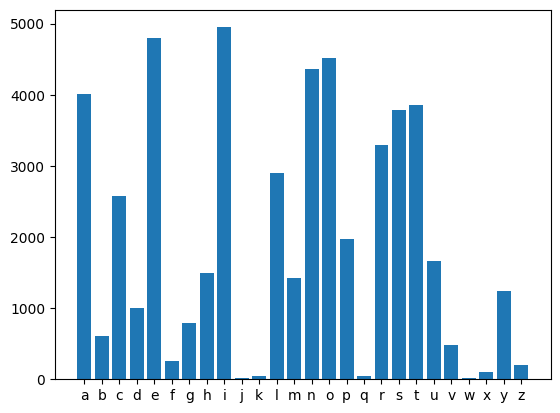

18
{'a': 2012, 'b': 308, 'c': 1409, 'd': 514, 'e': 2563, 'f': 131, 'g': 416, 'h': 834, 'i': 2516, 'j': 12, 'k': 20, 'l': 1494, 'm': 771, 'n': 2164, 'o': 2494, 'p': 1114, 'q': 28, 'r': 1768, 's': 2018, 't': 1989, 'u': 828, 'v': 275, 'w': 4, 'x': 47, 'y': 664, 'z': 85}


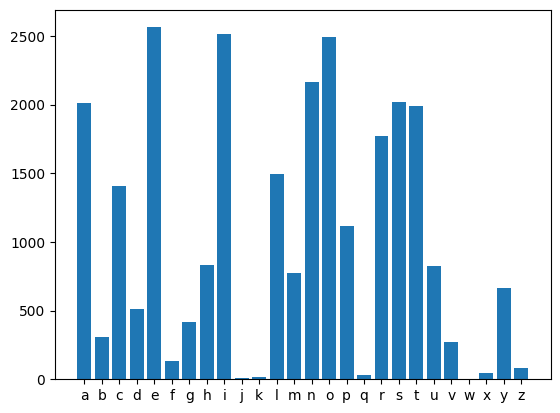

19
{'a': 1209, 'b': 136, 'c': 814, 'd': 270, 'e': 1331, 'f': 61, 'g': 237, 'h': 534, 'i': 1378, 'j': 8, 'k': 6, 'l': 904, 'm': 418, 'n': 1157, 'o': 1371, 'p': 579, 'q': 8, 'r': 897, 's': 983, 't': 1144, 'u': 407, 'v': 126, 'w': 6, 'x': 23, 'y': 380, 'z': 53}


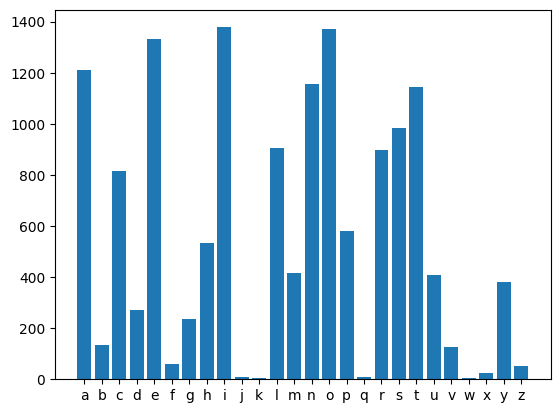

20
{'a': 593, 'b': 65, 'c': 404, 'd': 143, 'e': 668, 'f': 20, 'g': 121, 'h': 281, 'i': 668, 'j': 6, 'k': 1, 'l': 470, 'm': 204, 'n': 545, 'o': 706, 'p': 305, 'q': 5, 'r': 470, 's': 449, 't': 567, 'u': 184, 'v': 60, 'w': 0, 'x': 9, 'y': 208, 'z': 28}


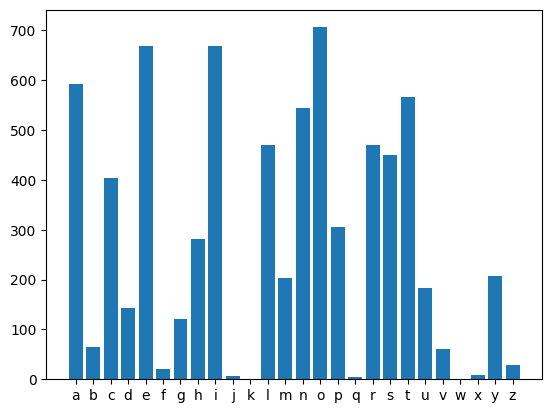

21
{'a': 282, 'b': 31, 'c': 216, 'd': 69, 'e': 317, 'f': 9, 'g': 67, 'h': 155, 'i': 309, 'j': 2, 'k': 3, 'l': 238, 'm': 95, 'n': 256, 'o': 372, 'p': 133, 'q': 0, 'r': 227, 's': 209, 't': 287, 'u': 90, 'v': 21, 'w': 1, 'x': 3, 'y': 116, 'z': 20}


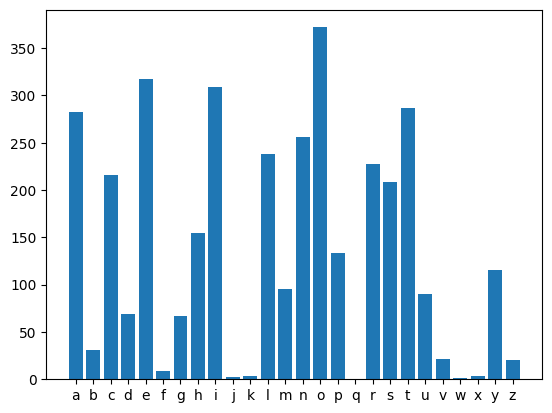

22
{'a': 104, 'b': 10, 'c': 100, 'd': 36, 'e': 158, 'f': 6, 'g': 20, 'h': 81, 'i': 128, 'j': 1, 'k': 1, 'l': 95, 'm': 54, 'n': 111, 'o': 203, 'p': 70, 'q': 1, 'r': 113, 's': 96, 't': 120, 'u': 38, 'v': 7, 'w': 1, 'x': 7, 'y': 61, 'z': 6}


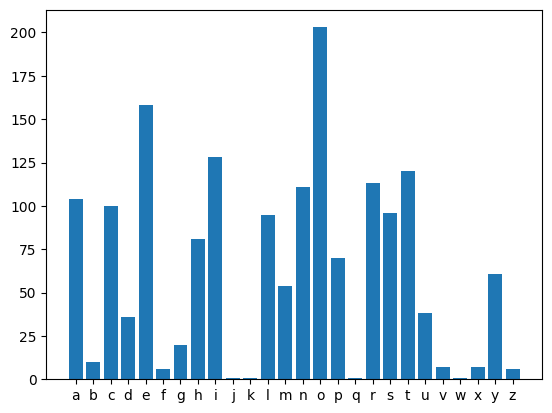

23
{'a': 52, 'b': 6, 'c': 39, 'd': 23, 'e': 68, 'f': 9, 'g': 11, 'h': 42, 'i': 63, 'j': 0, 'k': 0, 'l': 54, 'm': 22, 'n': 38, 'o': 79, 'p': 34, 'q': 0, 'r': 50, 's': 30, 't': 52, 'u': 14, 'v': 3, 'w': 0, 'x': 3, 'y': 20, 'z': 1}


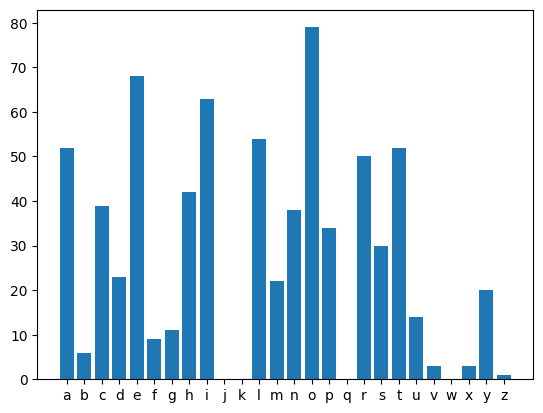

24
{'a': 21, 'b': 3, 'c': 17, 'd': 9, 'e': 27, 'f': 2, 'g': 5, 'h': 17, 'i': 30, 'j': 0, 'k': 0, 'l': 21, 'm': 8, 'n': 14, 'o': 29, 'p': 14, 'q': 0, 'r': 21, 's': 12, 't': 23, 'u': 4, 'v': 0, 'w': 0, 'x': 1, 'y': 9, 'z': 1}


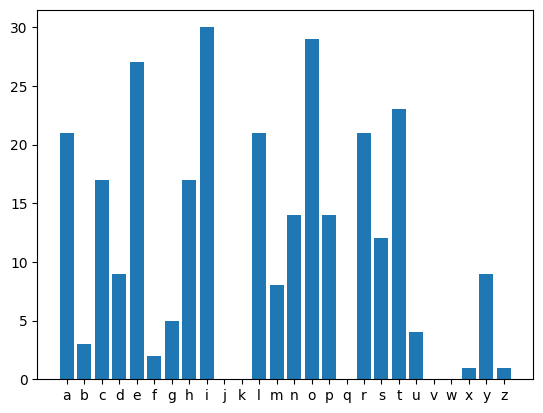

25
{'a': 13, 'b': 2, 'c': 15, 'd': 2, 'e': 27, 'f': 0, 'g': 4, 'h': 11, 'i': 15, 'j': 0, 'k': 0, 'l': 15, 'm': 7, 'n': 11, 'o': 17, 'p': 10, 'q': 0, 'r': 18, 's': 12, 't': 14, 'u': 2, 'v': 0, 'w': 0, 'x': 0, 'y': 5, 'z': 0}


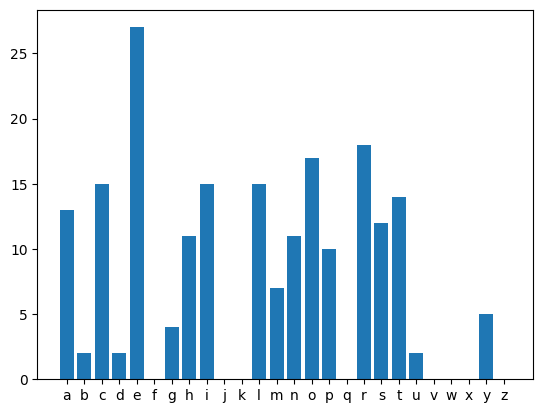

26
{'a': 0, 'b': 0, 'c': 0, 'd': 0, 'e': 0, 'f': 0, 'g': 0, 'h': 0, 'i': 0, 'j': 0, 'k': 0, 'l': 0, 'm': 0, 'n': 0, 'o': 0, 'p': 0, 'q': 0, 'r': 0, 's': 0, 't': 0, 'u': 0, 'v': 0, 'w': 0, 'x': 0, 'y': 0, 'z': 0}


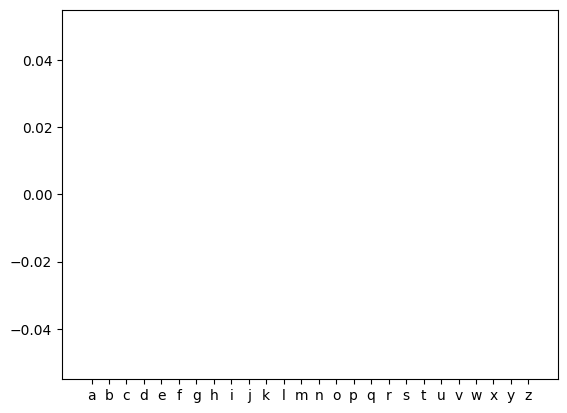

27
{'a': 4, 'b': 0, 'c': 8, 'd': 2, 'e': 9, 'f': 0, 'g': 1, 'h': 4, 'i': 4, 'j': 0, 'k': 0, 'l': 6, 'm': 2, 'n': 2, 'o': 11, 'p': 4, 'q': 0, 'r': 8, 's': 3, 't': 6, 'u': 0, 'v': 0, 'w': 0, 'x': 2, 'y': 5, 'z': 0}


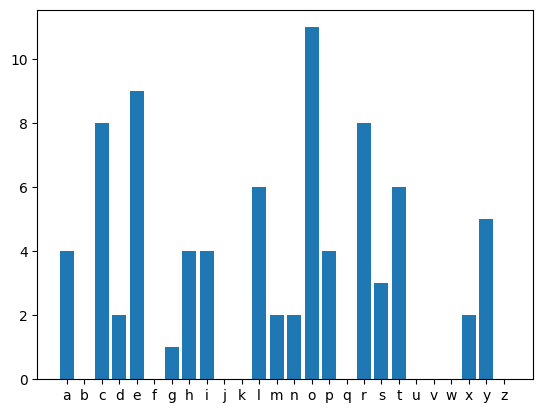

28
{'a': 4, 'b': 1, 'c': 2, 'd': 4, 'e': 5, 'f': 0, 'g': 0, 'h': 3, 'i': 6, 'j': 0, 'k': 0, 'l': 1, 'm': 2, 'n': 4, 'o': 5, 'p': 0, 'q': 0, 'r': 5, 's': 5, 't': 5, 'u': 0, 'v': 0, 'w': 0, 'x': 1, 'y': 3, 'z': 0}


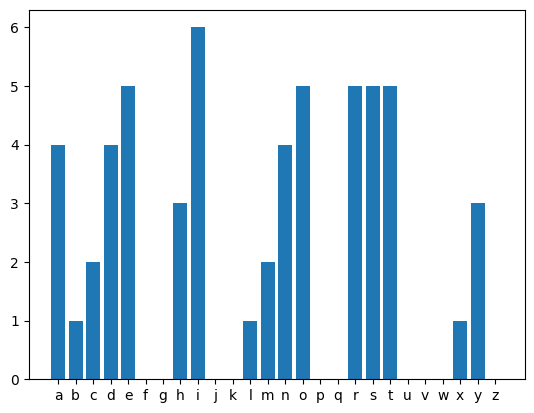

29
{'a': 2, 'b': 0, 'c': 2, 'd': 0, 'e': 7, 'f': 0, 'g': 0, 'h': 3, 'i': 8, 'j': 0, 'k': 0, 'l': 4, 'm': 4, 'n': 7, 'o': 2, 'p': 1, 'q': 0, 'r': 6, 's': 0, 't': 8, 'u': 0, 'v': 0, 'w': 0, 'x': 0, 'y': 4, 'z': 0}


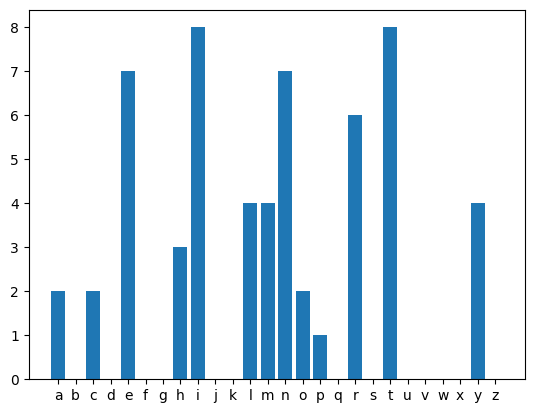

30
{'a': 0, 'b': 0, 'c': 0, 'd': 0, 'e': 0, 'f': 0, 'g': 0, 'h': 0, 'i': 0, 'j': 0, 'k': 0, 'l': 0, 'm': 0, 'n': 0, 'o': 0, 'p': 0, 'q': 0, 'r': 0, 's': 0, 't': 0, 'u': 0, 'v': 0, 'w': 0, 'x': 0, 'y': 0, 'z': 0}


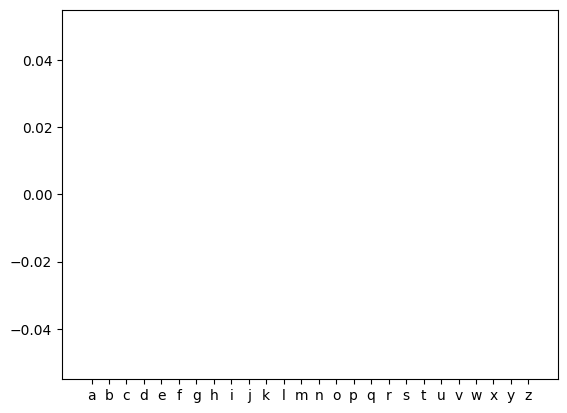

31
{'a': 1, 'b': 0, 'c': 2, 'd': 2, 'e': 3, 'f': 0, 'g': 0, 'h': 4, 'i': 3, 'j': 0, 'k': 0, 'l': 3, 'm': 0, 'n': 2, 'o': 4, 'p': 1, 'q': 0, 'r': 3, 's': 0, 't': 2, 'u': 0, 'v': 0, 'w': 0, 'x': 0, 'y': 1, 'z': 0}


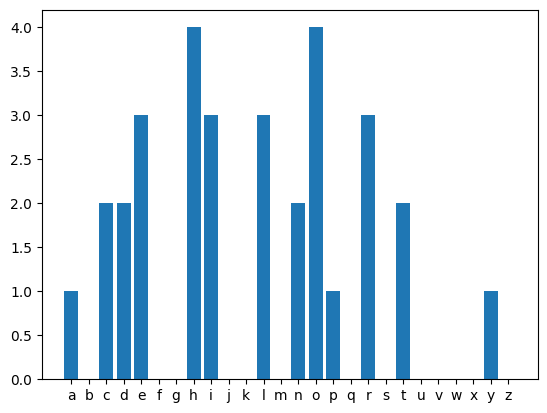

In [208]:
frequencies, percentages = compute_frequencies()
plot_frequencies(frequencies)

In [87]:
def get_frequency_score(word):
    return sum([percentages[len(word)][char] for char in set(word)])

In [230]:
def sort_by_frequency_score(words):
    return sorted(words, key = lambda word: get_frequency_score(word))[::-1]

In [231]:
sort_by_frequency_score(word_lengths[5])[:10]

['seora',
 'oreas',
 'arose',
 'serai',
 'raise',
 'arise',
 'aries',
 'aesir',
 'solea',
 'osela']

# Character Position Frequency Analysis
- compute the frequency of each character in the alphabet at each position of all words for all word lengths
    - e.g. the number of 'a's that occur at position 0 in all five letter words
- compute this frequency as a percentage relative to all other characters at that position for all words for all word lengths
    - e.g. the percentage of 'a's that occur at position 0 in all five letter words
- define a function to compute the position frequency score of a given word
    - sum of all position frequencies for each character in a given word
    - allows you to rank a word based on how often the characters occur at the given positions relative to all other words of the same length
- sort words of length n by position frequency score

In [201]:
def compute_position_frequencies():
    alphabet = [chr(i) for i in range(97, 123)] # list with each character from a to z
    
    position_frequencies = {key: {i: {char: 0 for char in alphabet} for i in range(key)} for key in word_lengths}
    position_percentages = {key: {i: {char: 0 for char in alphabet} for i in range(key)} for key in word_lengths}
    
    for length in word_lengths:
    #     total_chars = 0
        for word in word_lengths[length]:
            for i, char in enumerate(word):
                position_frequencies[length][i][char] += 1
    #             total_chars += 1

        for i in position_frequencies[length]:
            total_chars = sum([position_frequencies[length][i][char] for char in position_frequencies[length][i]])
            if total_chars == 0:
                position_percentages[length][i][char] = 0
            else:
                for char in position_frequencies[length][i]:
                    position_percentages[length][i][char] = position_frequencies[length][i][char] / total_chars

    return position_frequencies, position_percentages

In [211]:
def plot_position_frequencies(position_frequencies):
    for length in position_frequencies:
        for position in position_frequencies[length]:
            print("Length: {}, Position: {}".format(length, position))
            keys = position_frequencies[length][position].keys()
            values = list(position_frequencies[length][position].values())
            x_pos = range(len(keys))
            plt.bar(x_pos, values)
            plt.xticks(x_pos, keys)
            plt.show()
    

Length: 1, Position: 0


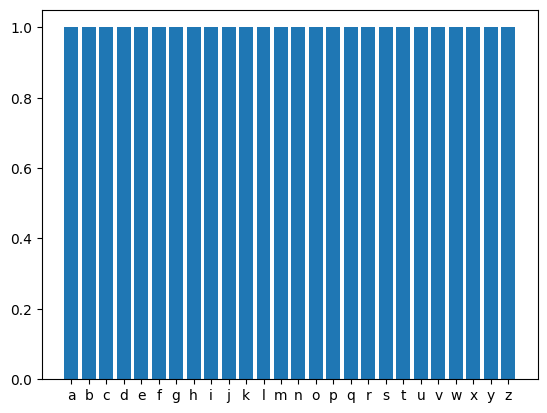

Length: 2, Position: 0


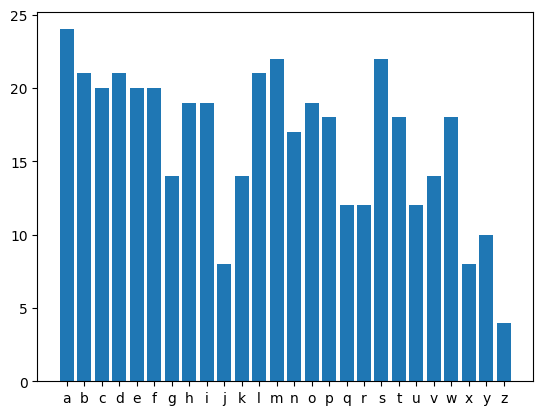

Length: 2, Position: 1


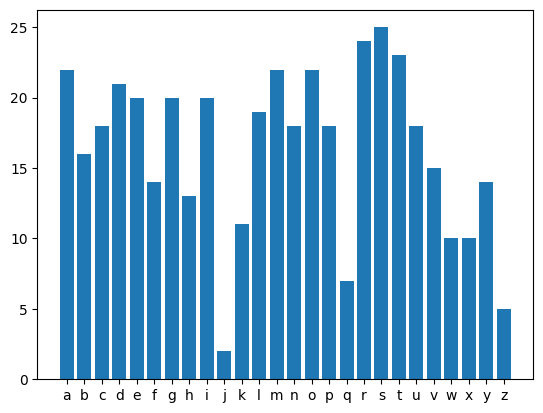

Length: 3, Position: 0


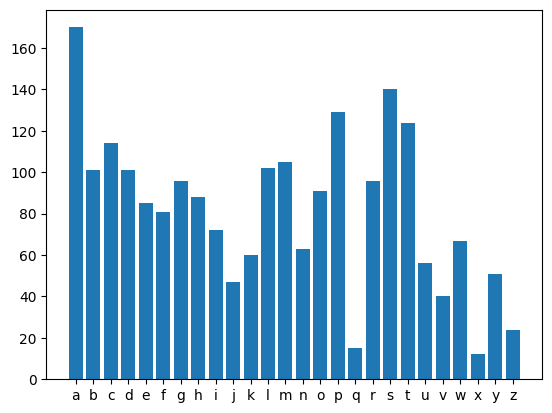

Length: 3, Position: 1


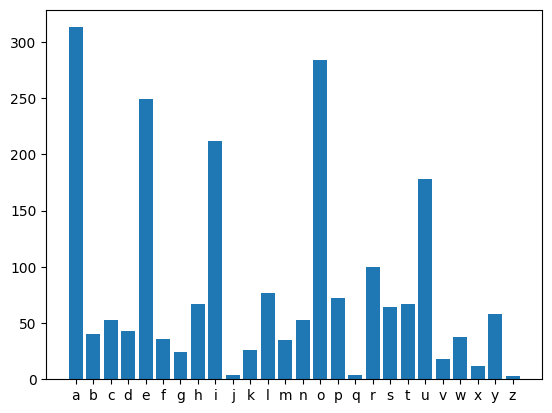

Length: 3, Position: 2


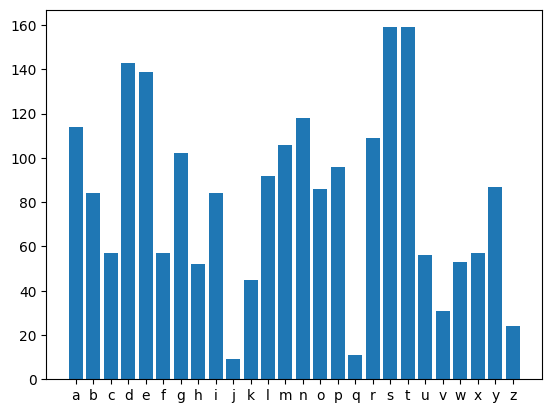

Length: 4, Position: 0


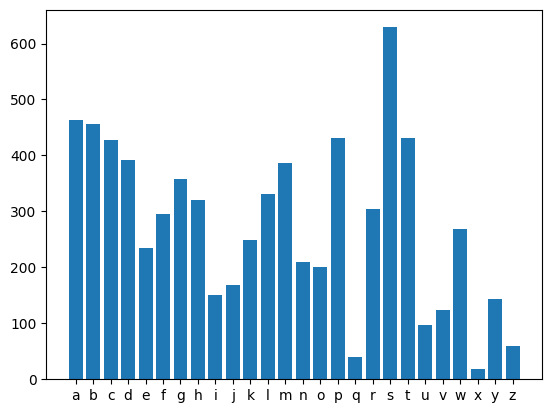

Length: 4, Position: 1


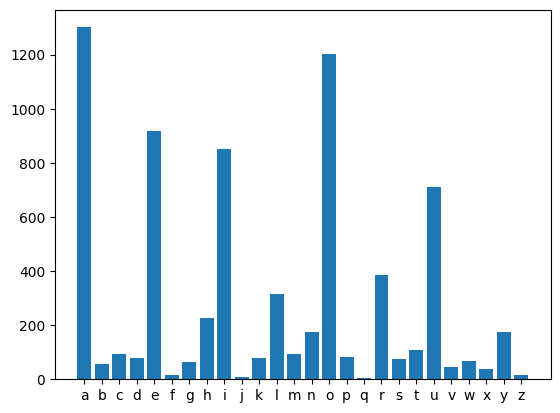

Length: 4, Position: 2


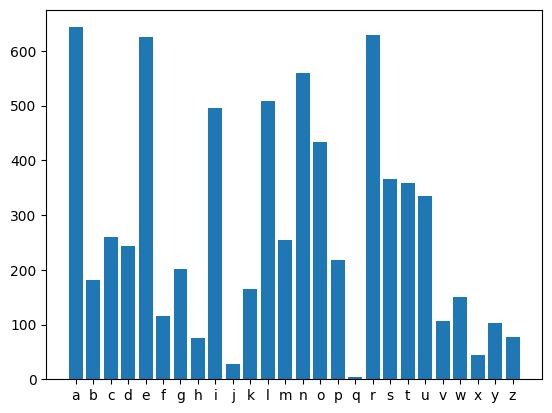

Length: 4, Position: 3


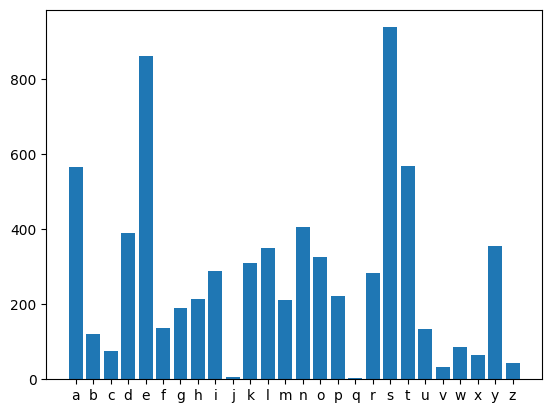

Length: 5, Position: 0


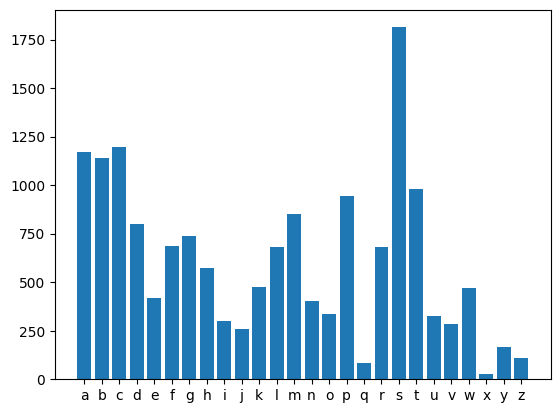

Length: 5, Position: 1


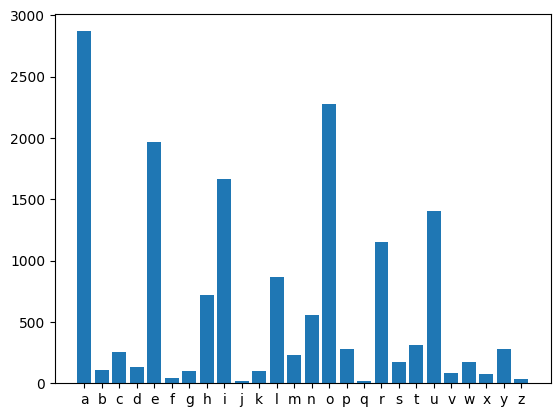

Length: 5, Position: 2


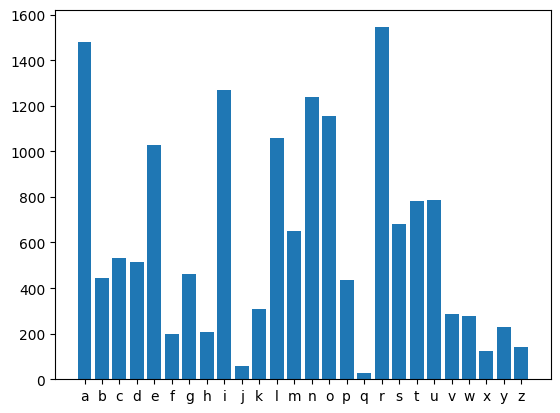

Length: 5, Position: 3


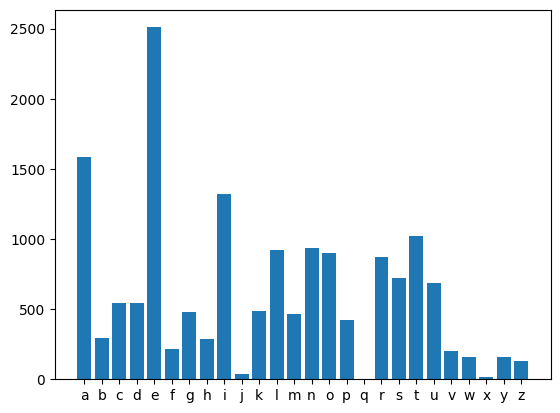

Length: 5, Position: 4


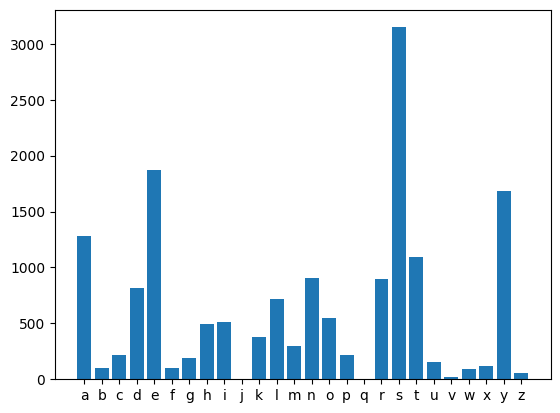

Length: 6, Position: 0


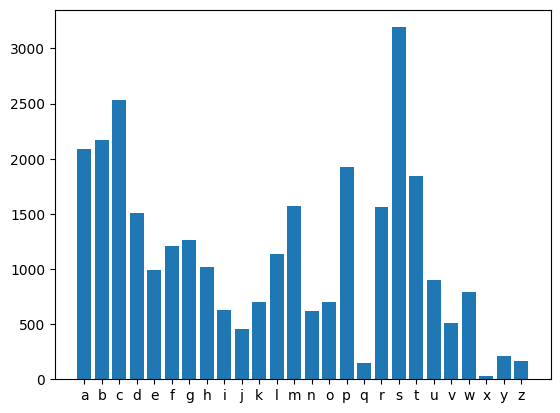

Length: 6, Position: 1


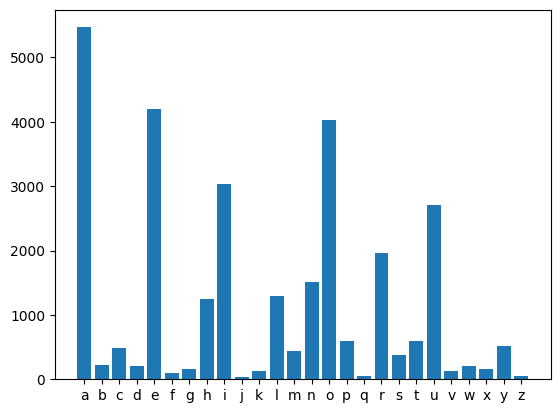

Length: 6, Position: 2


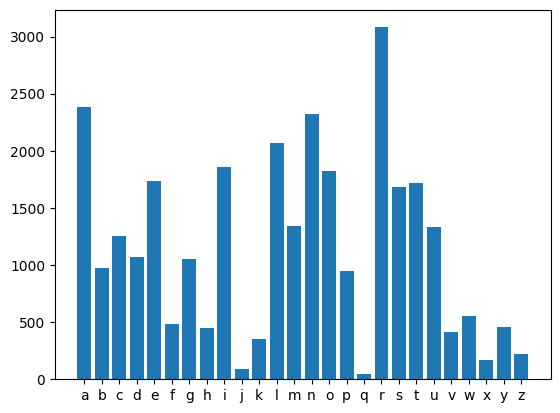

Length: 6, Position: 3


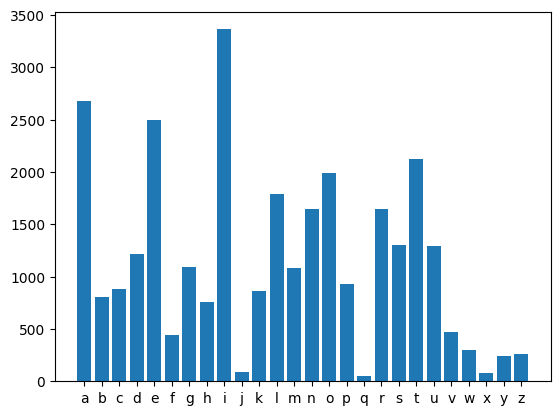

Length: 6, Position: 4


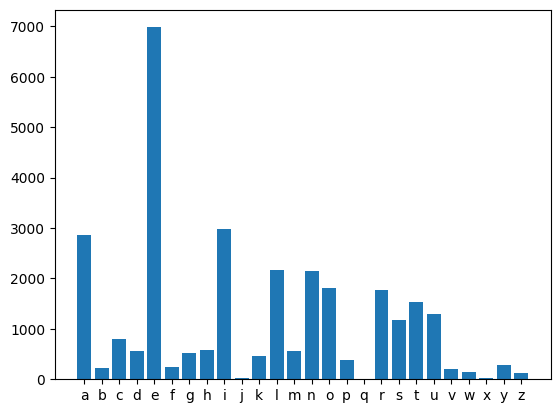

Length: 6, Position: 5


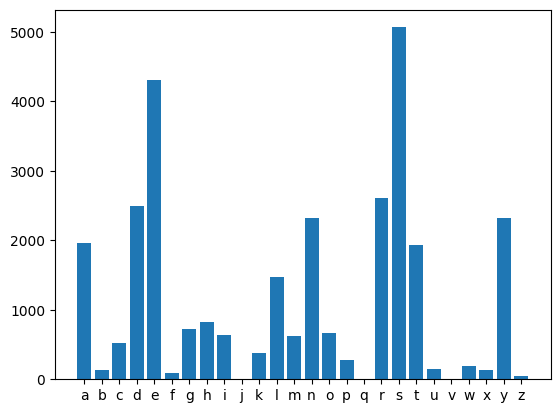

Length: 7, Position: 0


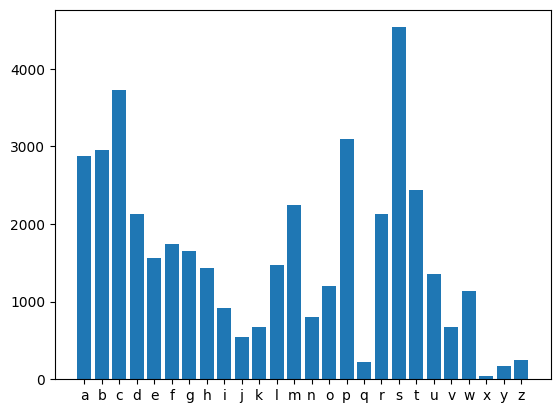

Length: 7, Position: 1


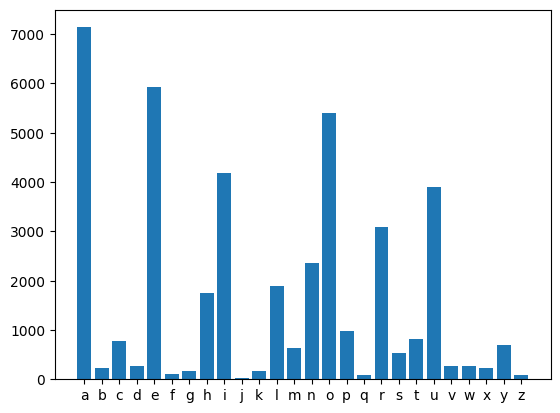

Length: 7, Position: 2


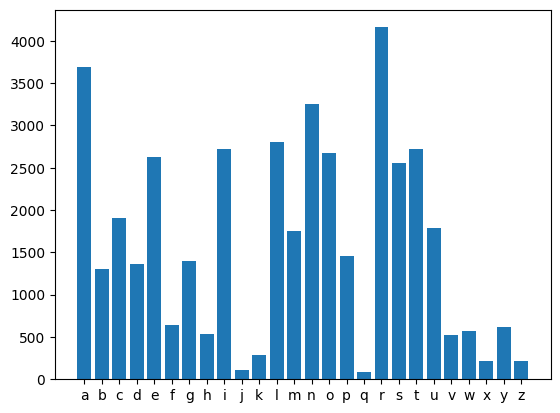

Length: 7, Position: 3


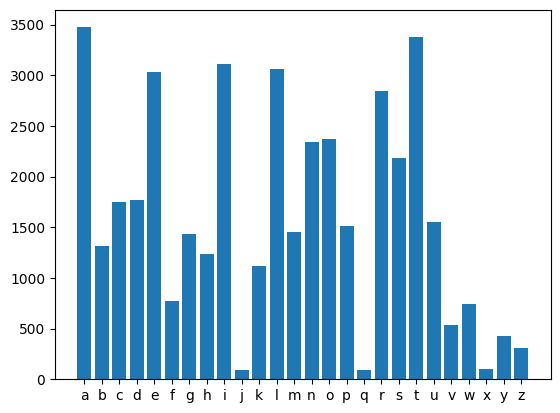

Length: 7, Position: 4


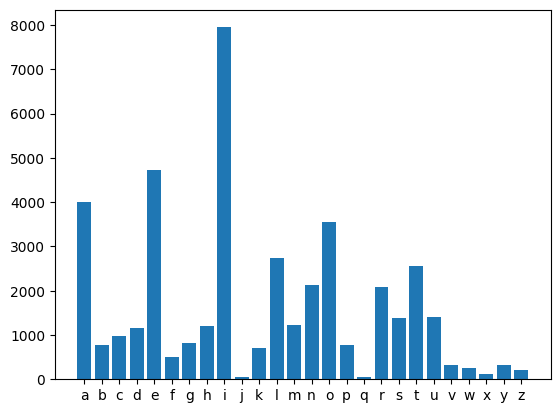

Length: 7, Position: 5


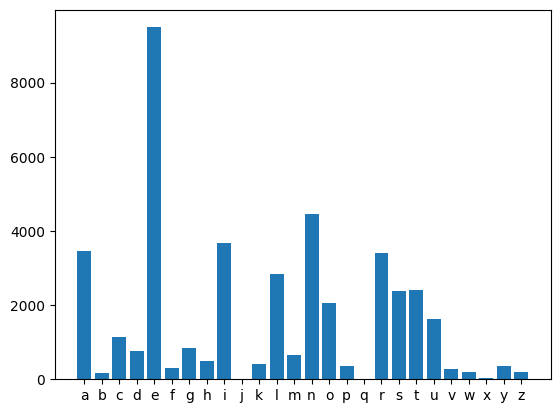

Length: 7, Position: 6


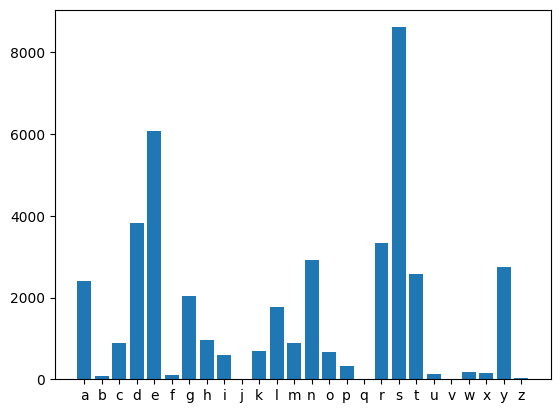

Length: 8, Position: 0


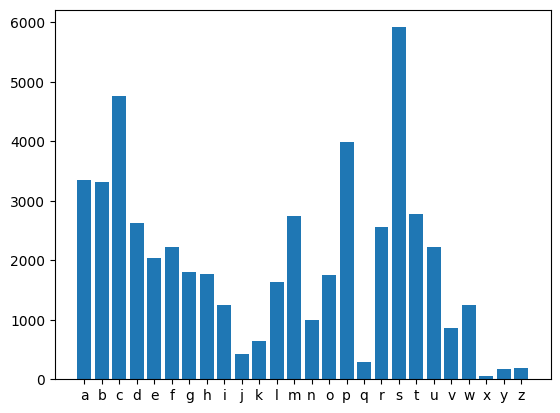

Length: 8, Position: 1


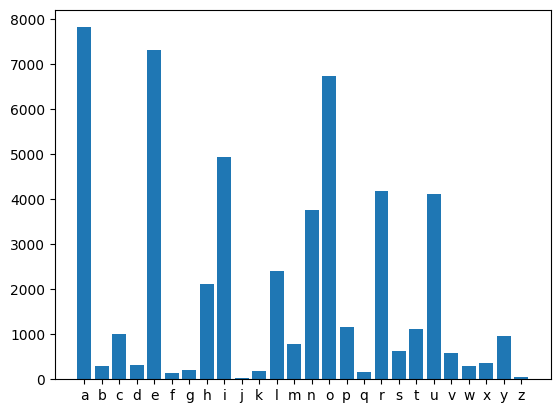

Length: 8, Position: 2


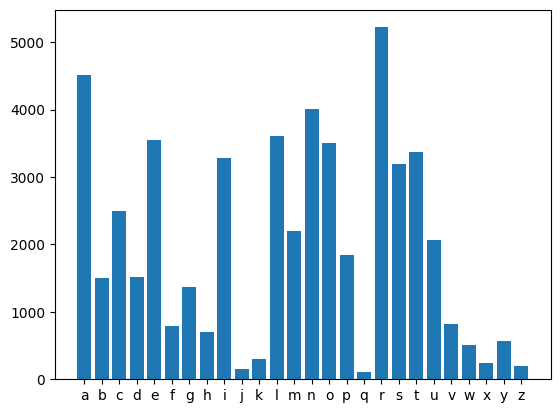

Length: 8, Position: 3


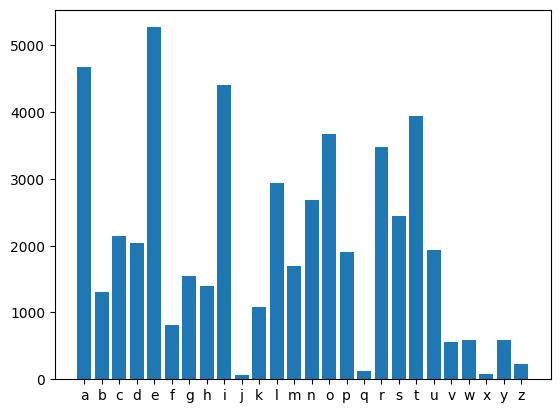

Length: 8, Position: 4


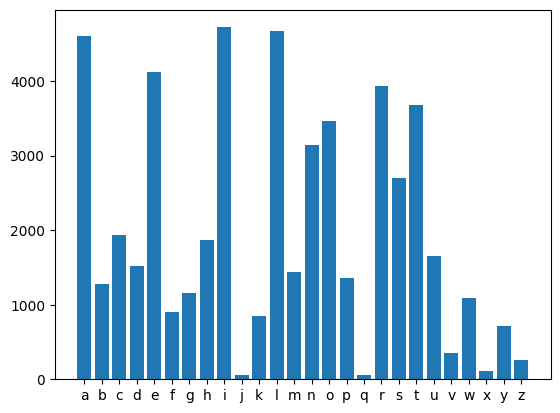

Length: 8, Position: 5


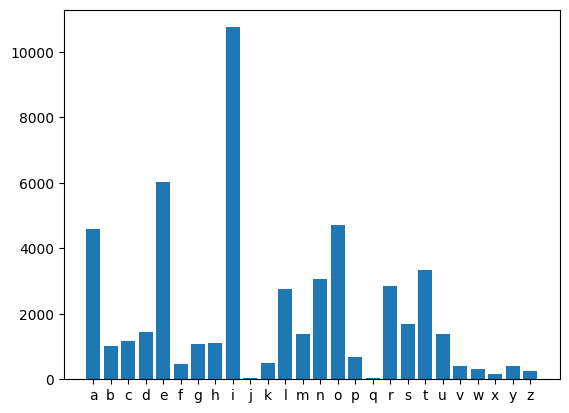

Length: 8, Position: 6


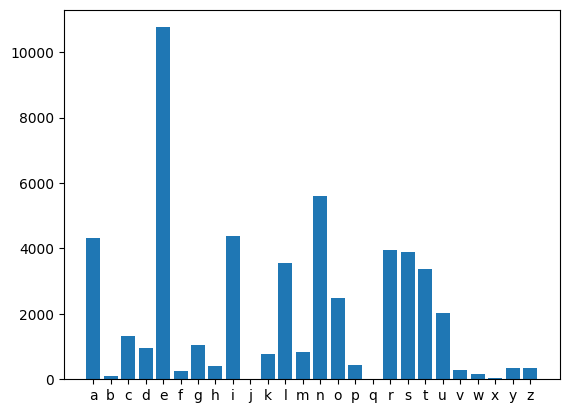

Length: 8, Position: 7


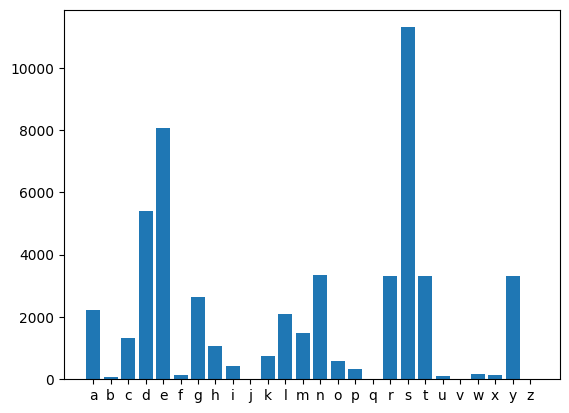

Length: 9, Position: 0


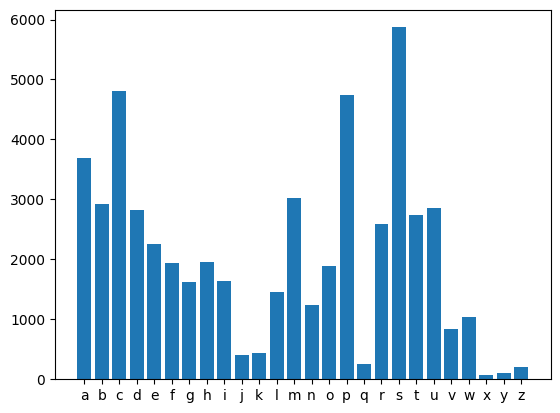

Length: 9, Position: 1


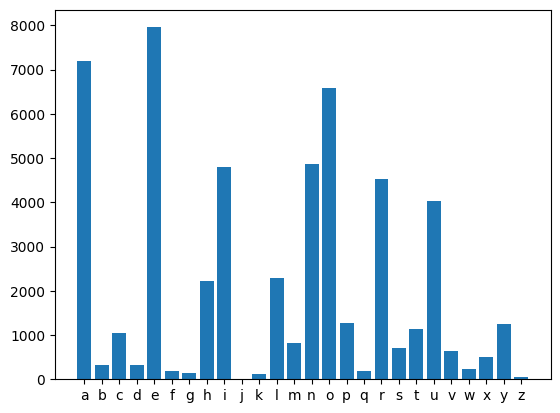

Length: 9, Position: 2


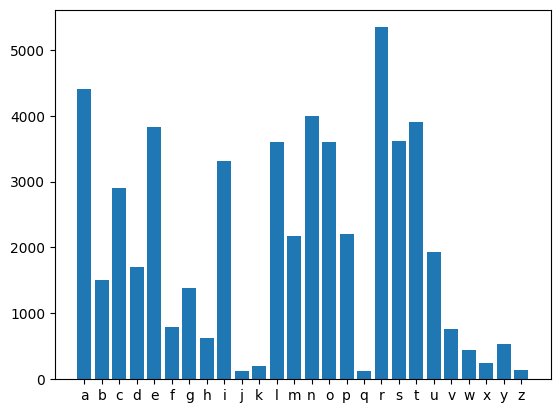

Length: 9, Position: 3


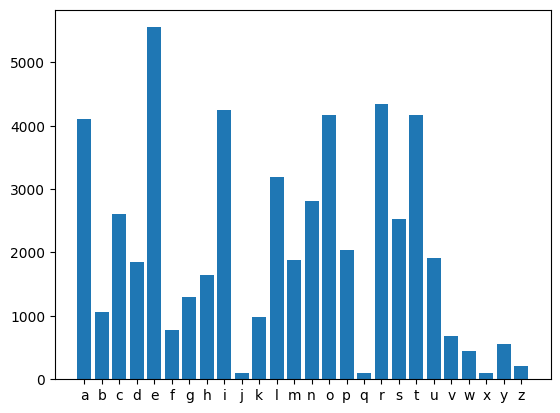

Length: 9, Position: 4


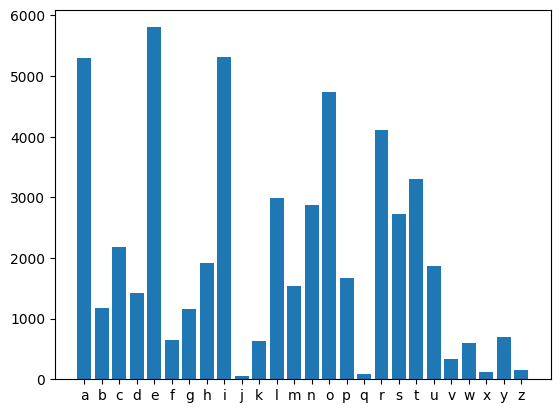

Length: 9, Position: 5


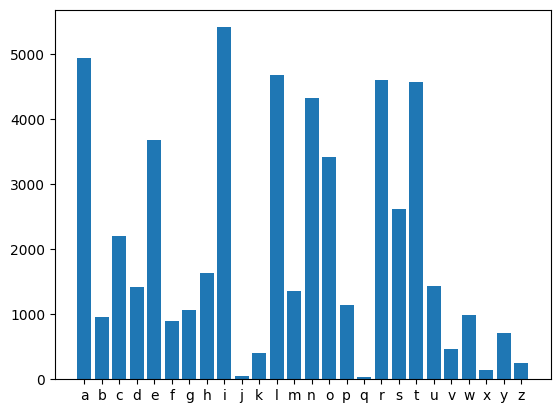

Length: 9, Position: 6


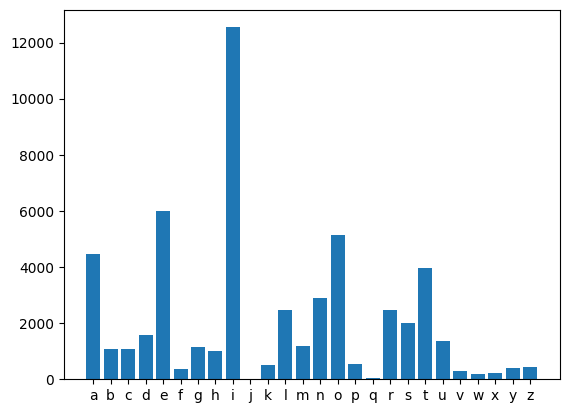

Length: 9, Position: 7


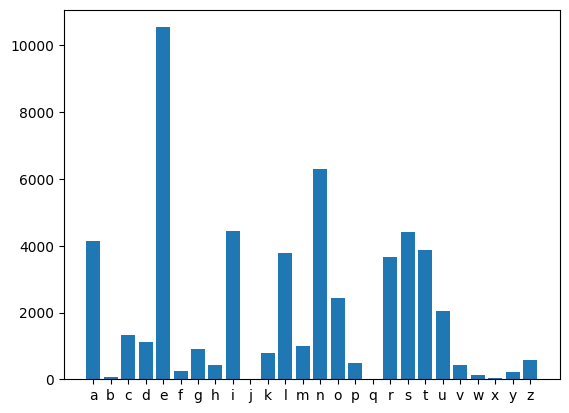

Length: 9, Position: 8


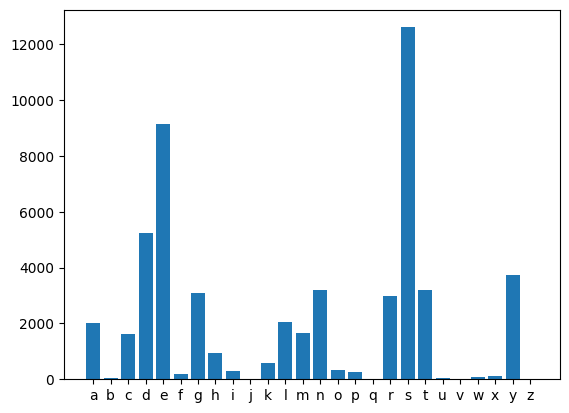

Length: 10, Position: 0


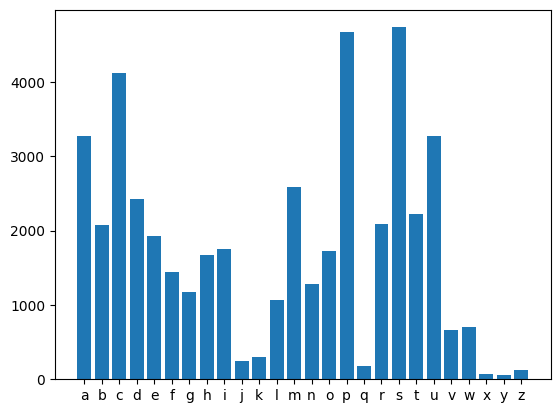

Length: 10, Position: 1


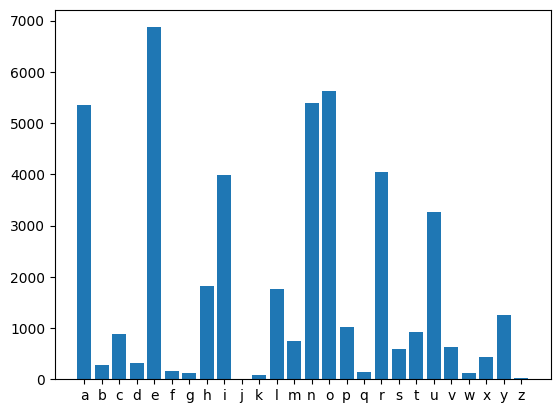

Length: 10, Position: 2


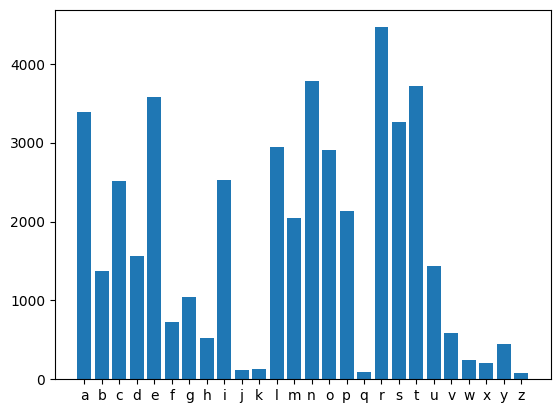

Length: 10, Position: 3


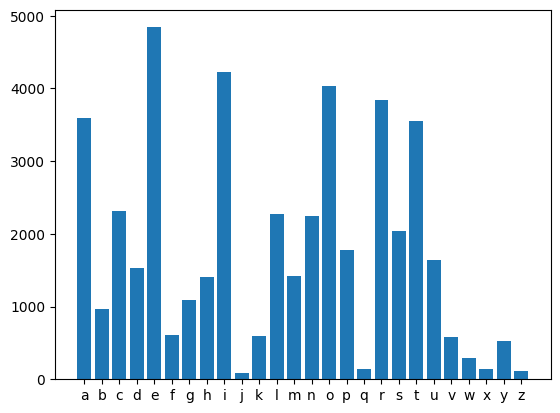

Length: 10, Position: 4


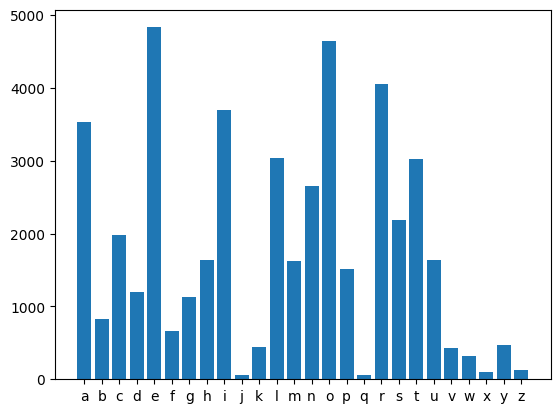

Length: 10, Position: 5


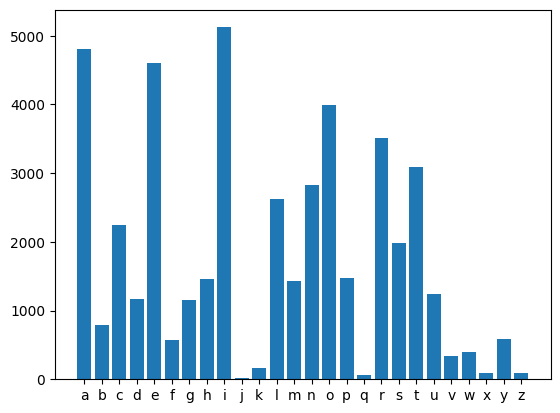

Length: 10, Position: 6


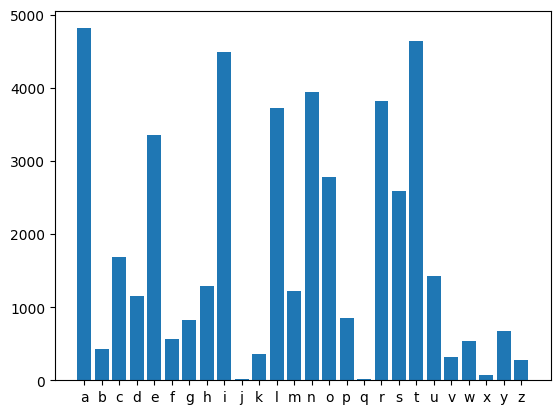

Length: 10, Position: 7


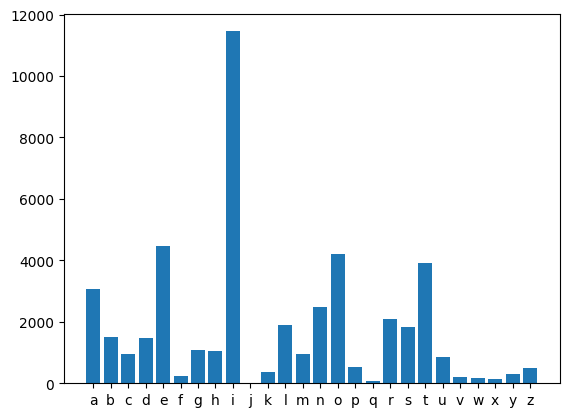

Length: 10, Position: 8


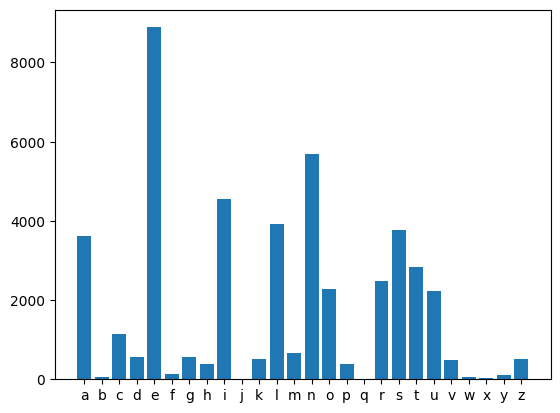

Length: 10, Position: 9


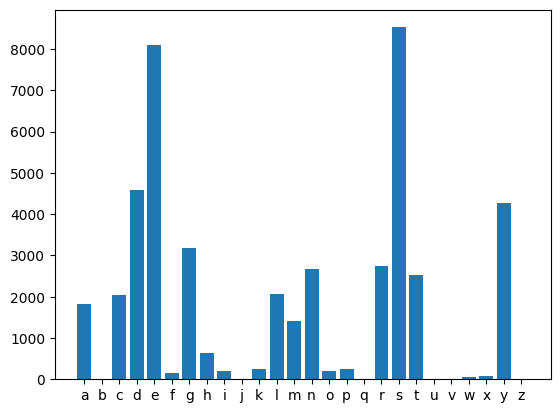

Length: 11, Position: 0


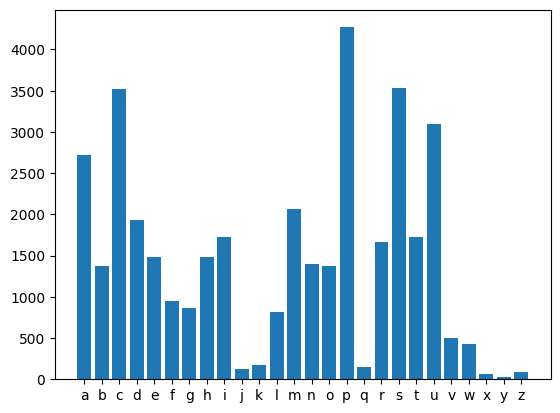

Length: 11, Position: 1


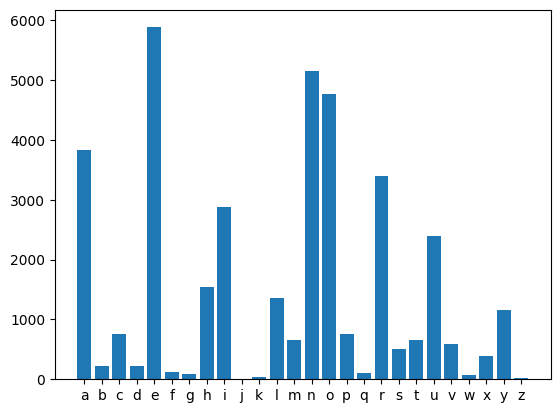

Length: 11, Position: 2


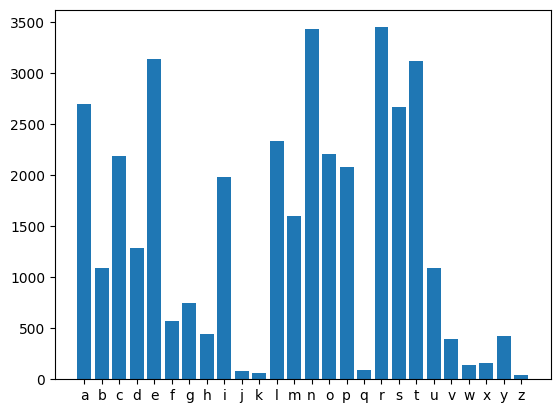

Length: 11, Position: 3


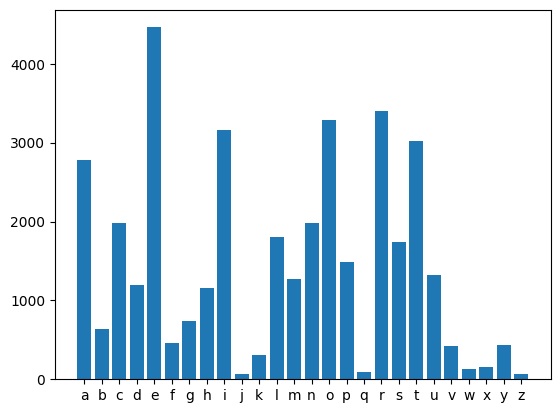

Length: 11, Position: 4


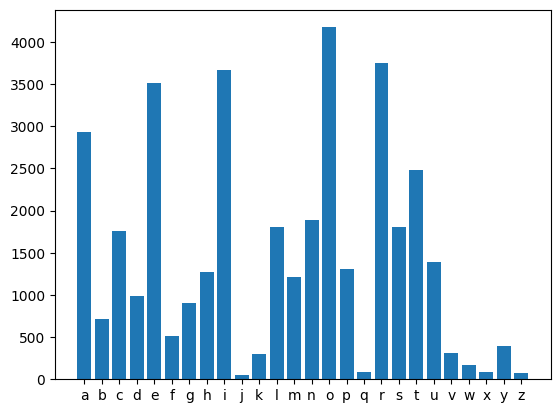

Length: 11, Position: 5


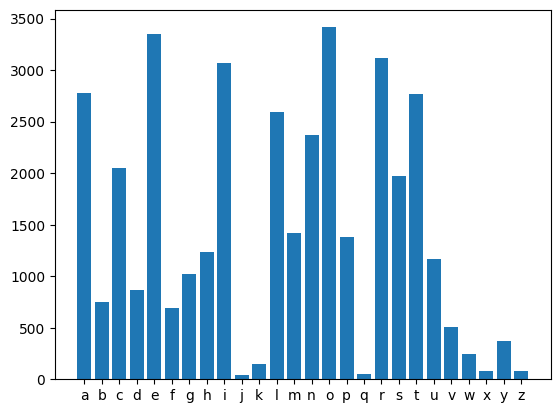

Length: 11, Position: 6


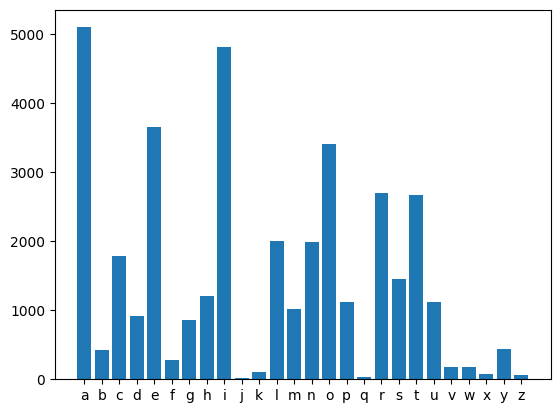

Length: 11, Position: 7


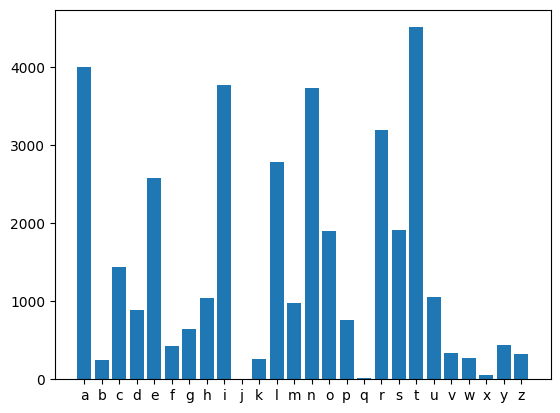

Length: 11, Position: 8


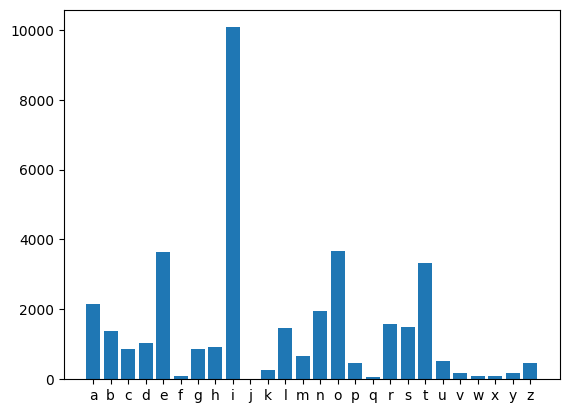

Length: 11, Position: 9


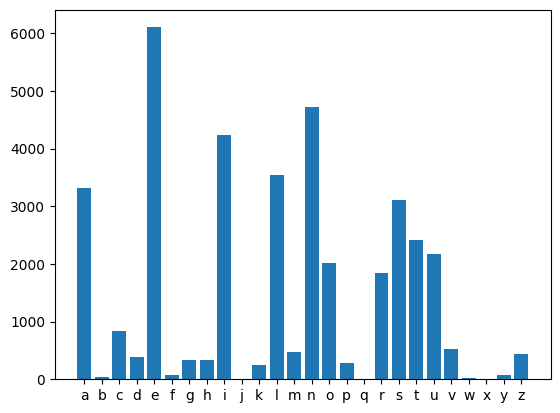

Length: 11, Position: 10


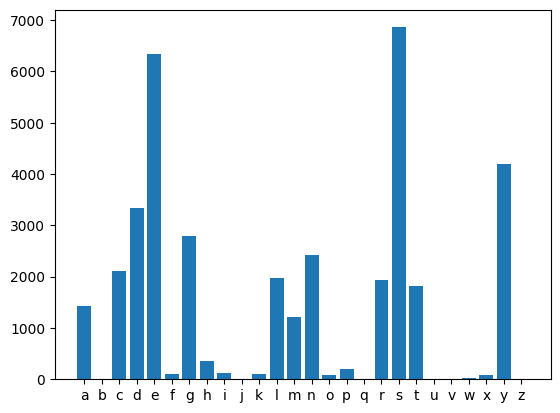

Length: 12, Position: 0


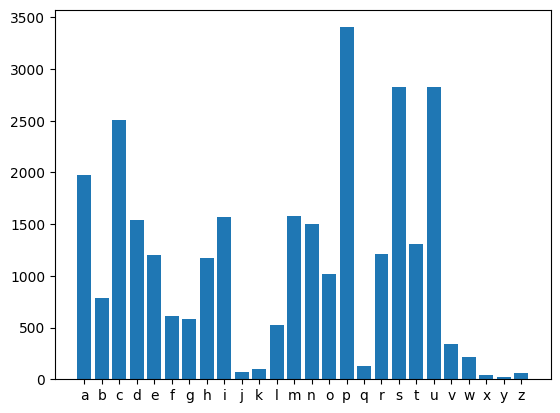

Length: 12, Position: 1


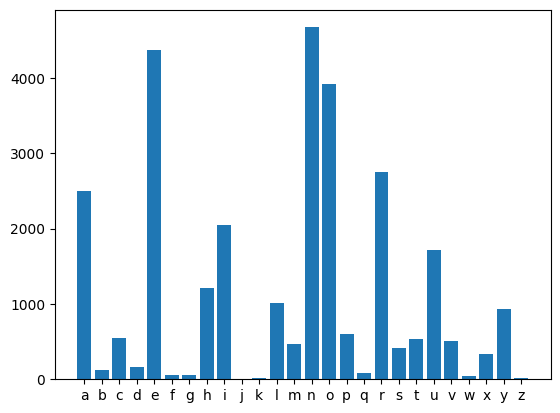

Length: 12, Position: 2


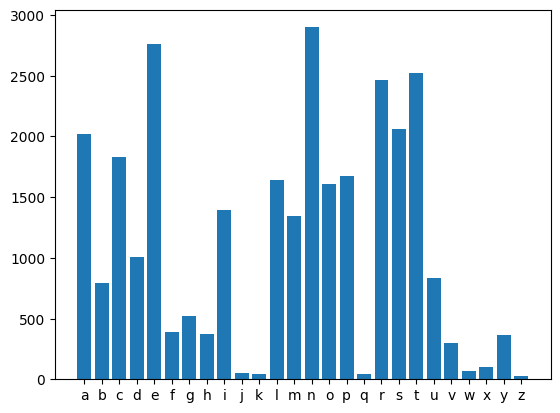

Length: 12, Position: 3


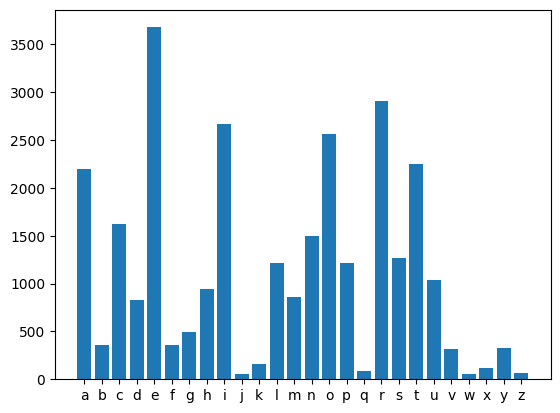

Length: 12, Position: 4


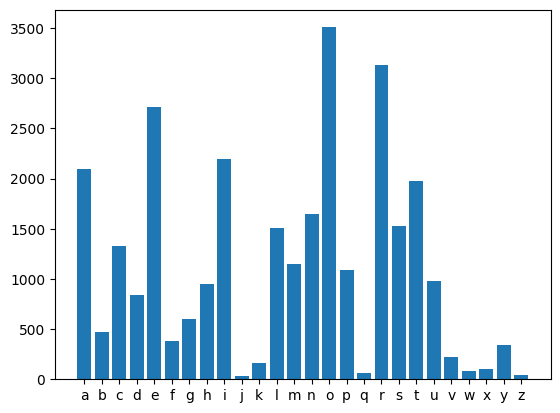

Length: 12, Position: 5


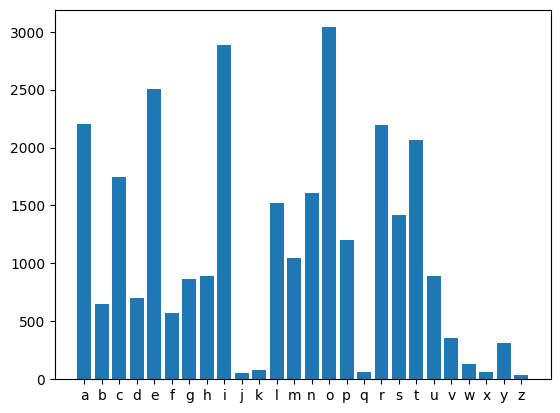

Length: 12, Position: 6


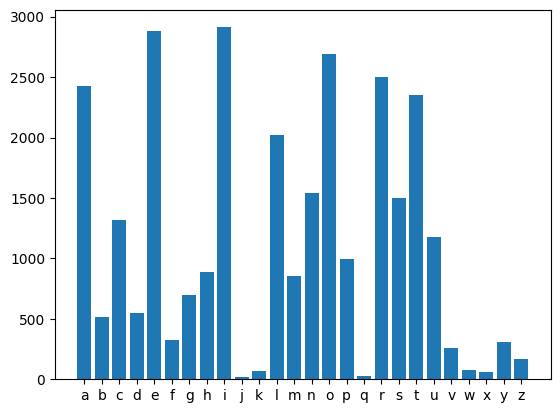

Length: 12, Position: 7


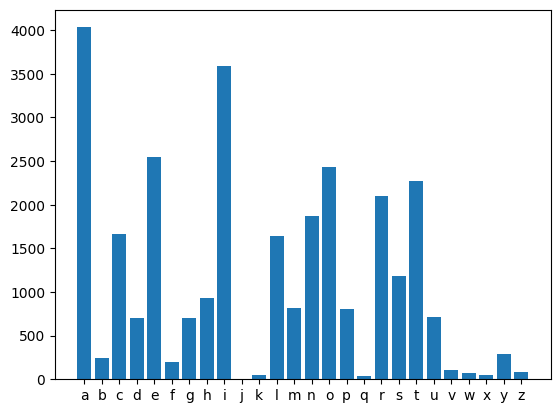

Length: 12, Position: 8


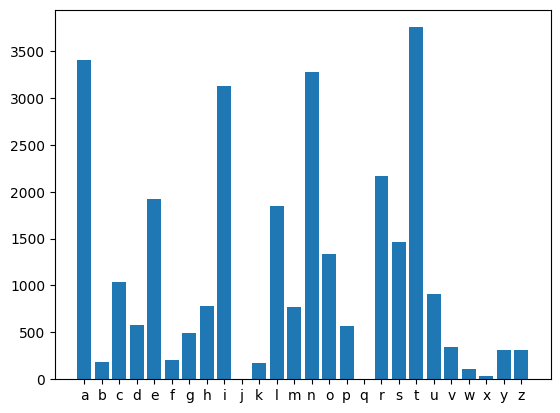

Length: 12, Position: 9


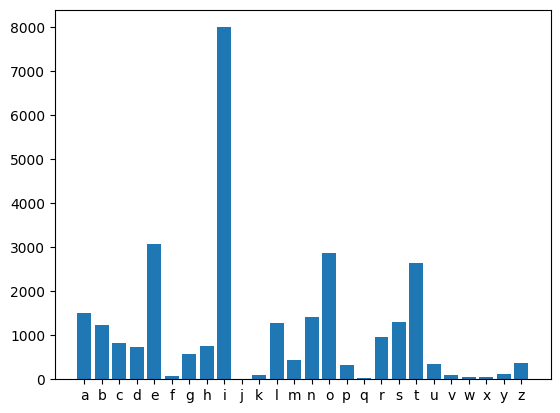

Length: 12, Position: 10


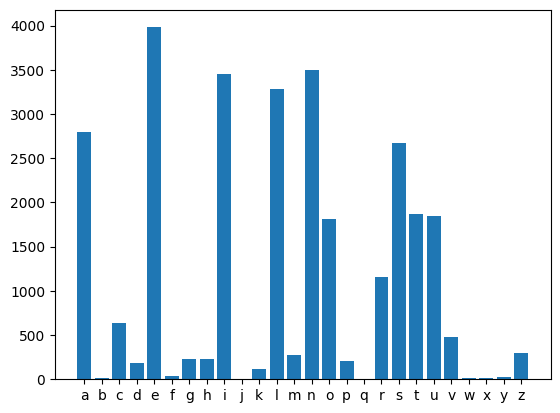

Length: 12, Position: 11


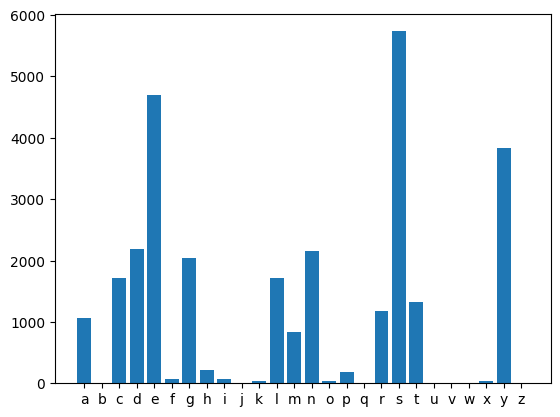

Length: 13, Position: 0


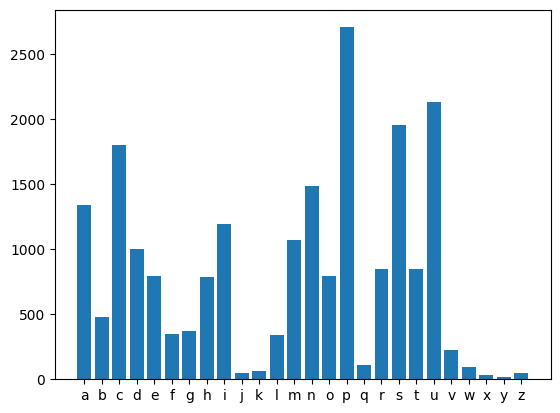

Length: 13, Position: 1


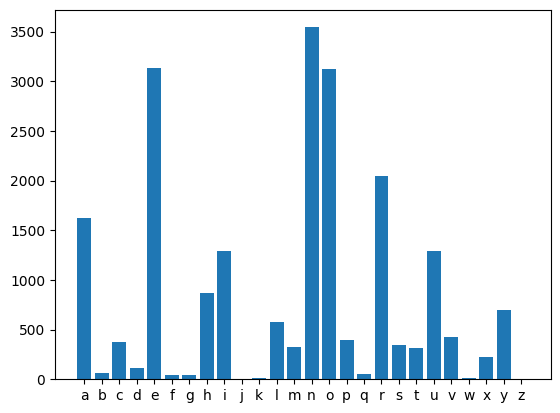

Length: 13, Position: 2


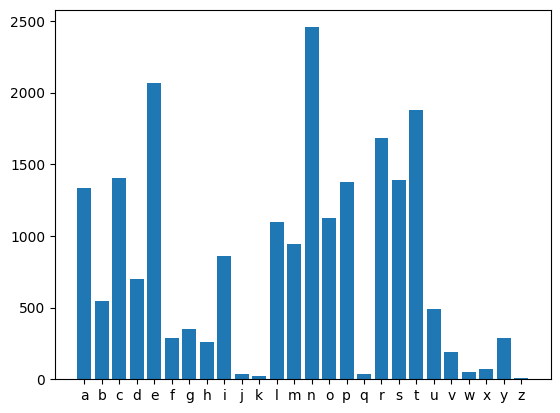

Length: 13, Position: 3


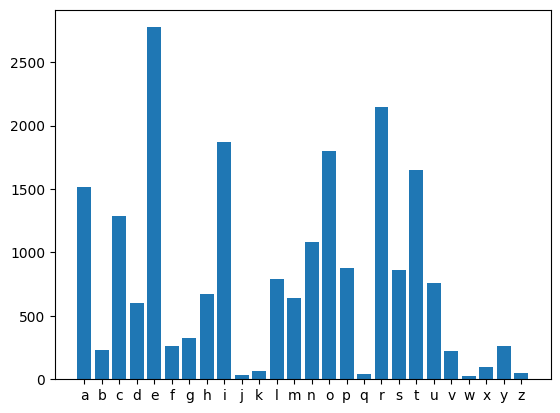

Length: 13, Position: 4


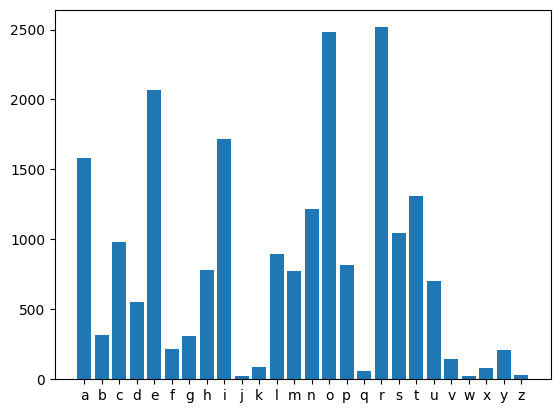

Length: 13, Position: 5


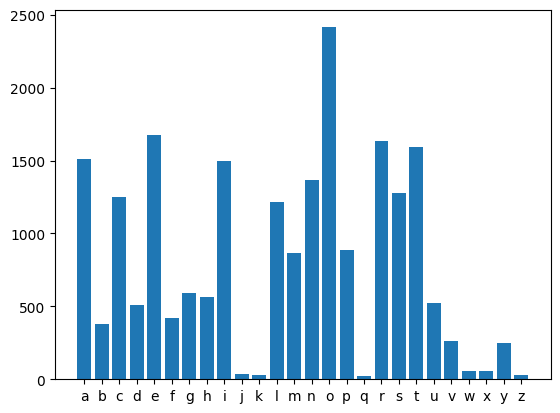

Length: 13, Position: 6


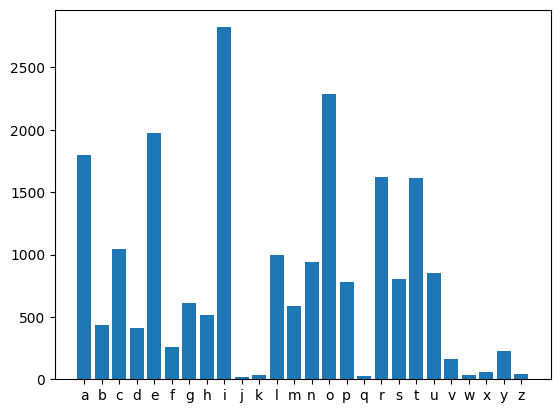

Length: 13, Position: 7


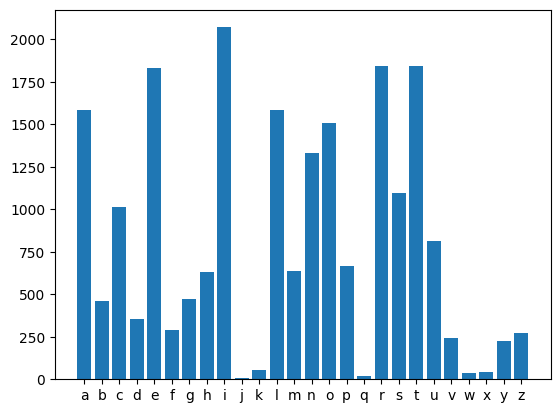

Length: 13, Position: 8


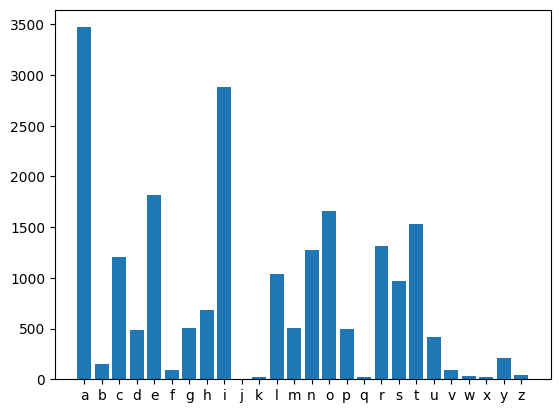

Length: 13, Position: 9


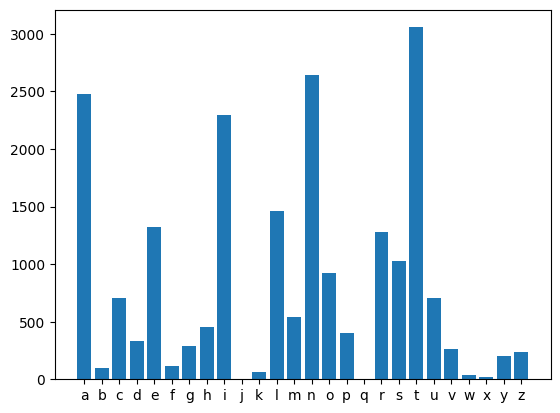

Length: 13, Position: 10


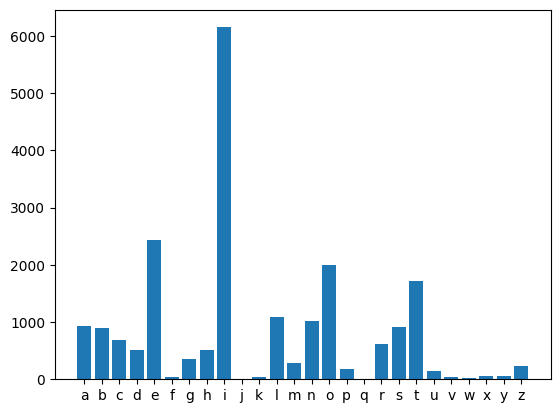

Length: 13, Position: 11


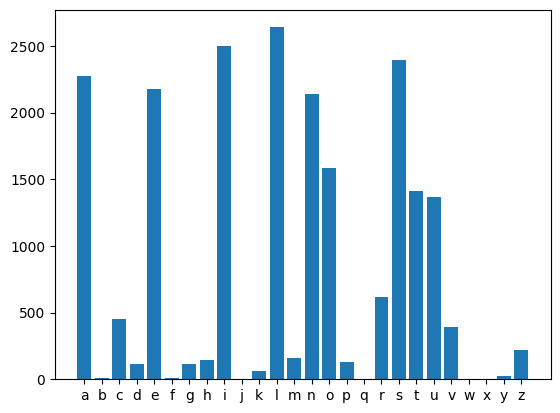

Length: 13, Position: 12


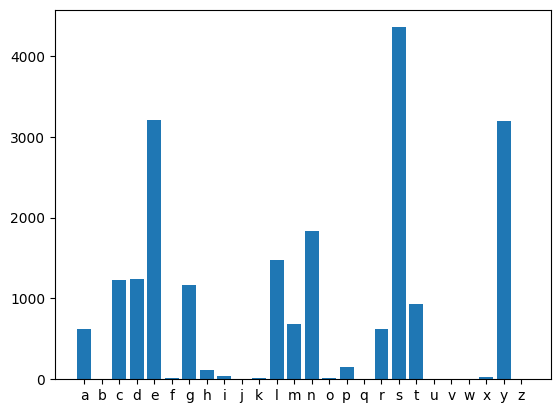

Length: 14, Position: 0


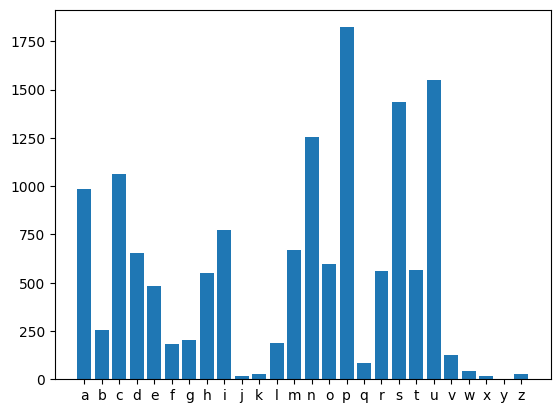

Length: 14, Position: 1


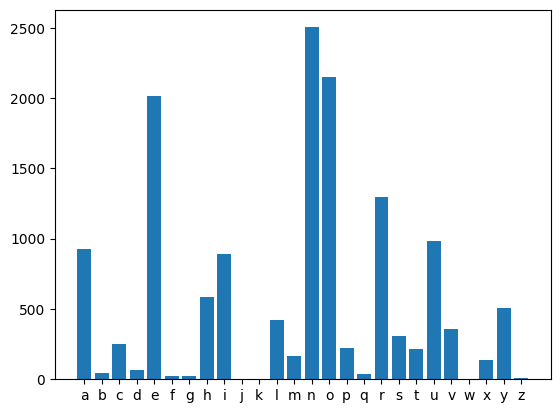

Length: 14, Position: 2


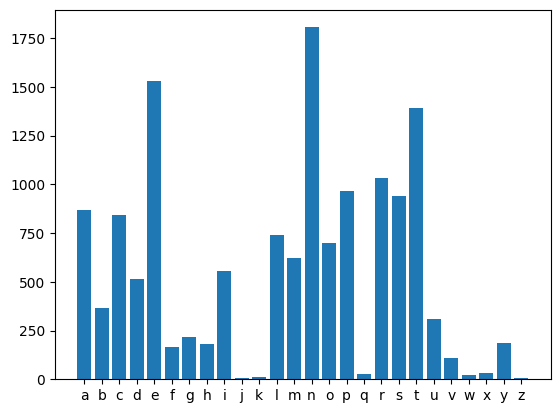

Length: 14, Position: 3


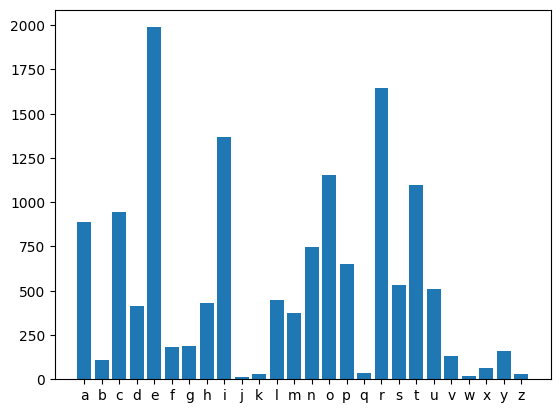

Length: 14, Position: 4


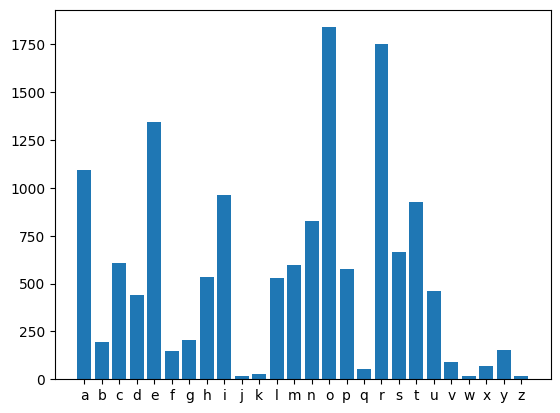

Length: 14, Position: 5


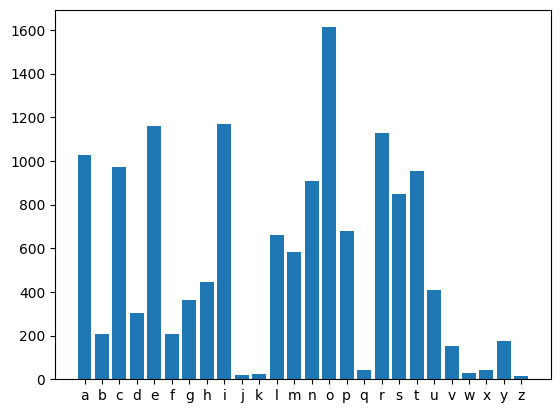

Length: 14, Position: 6


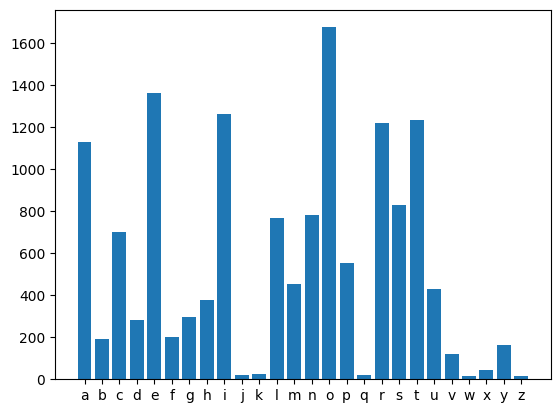

Length: 14, Position: 7


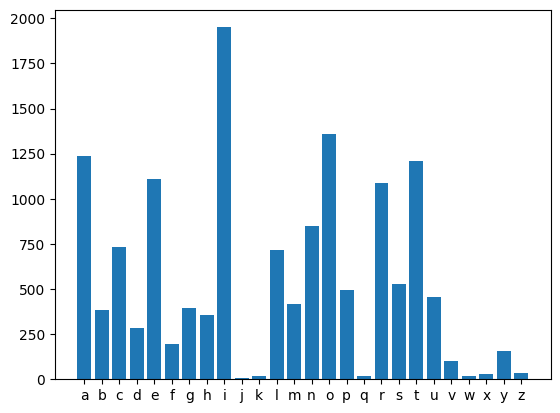

Length: 14, Position: 8


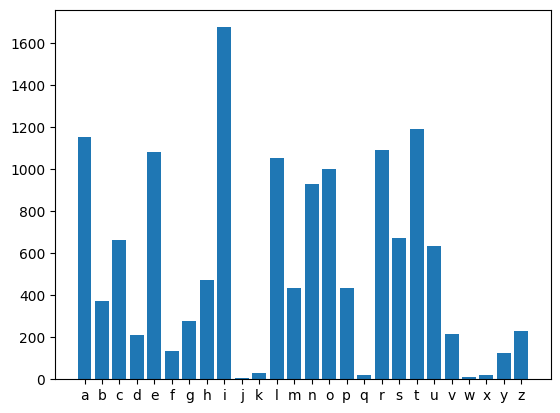

Length: 14, Position: 9


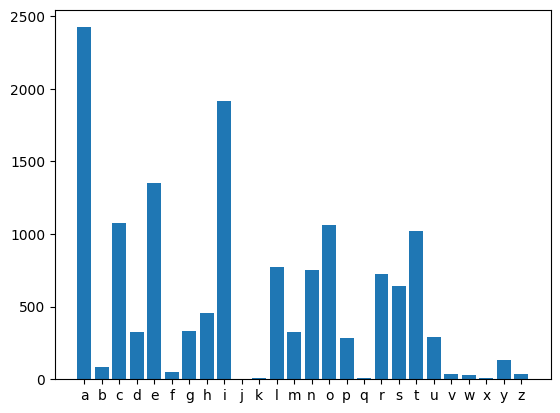

Length: 14, Position: 10


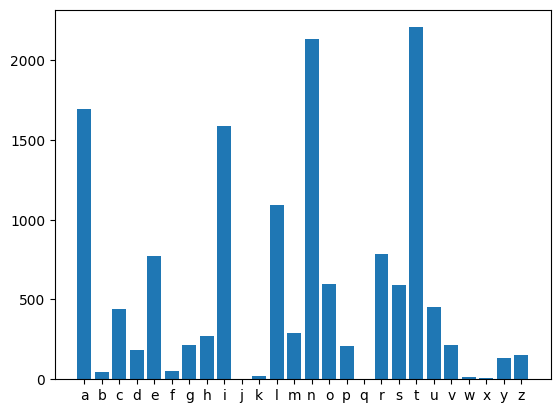

Length: 14, Position: 11


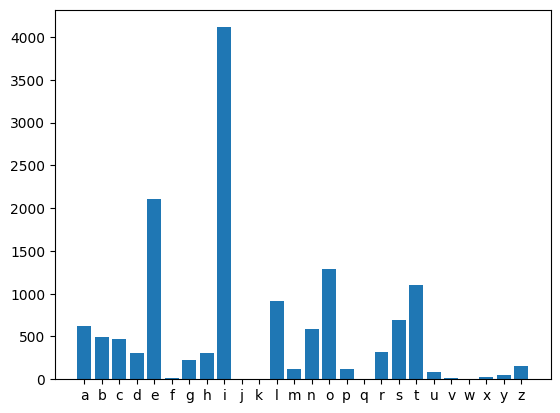

Length: 14, Position: 12


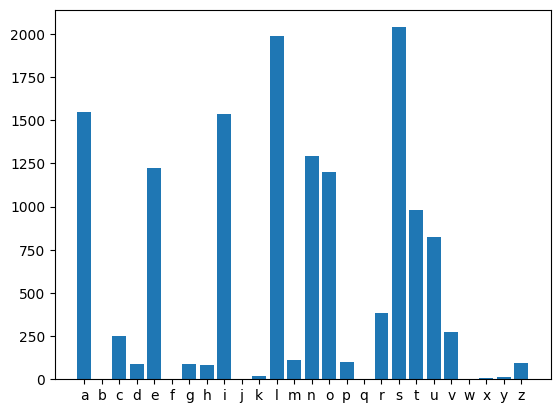

Length: 14, Position: 13


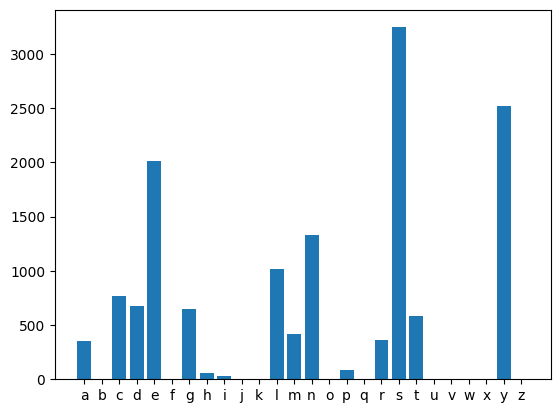

Length: 15, Position: 0


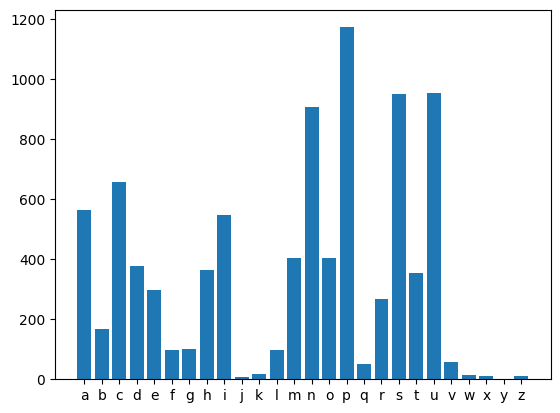

Length: 15, Position: 1


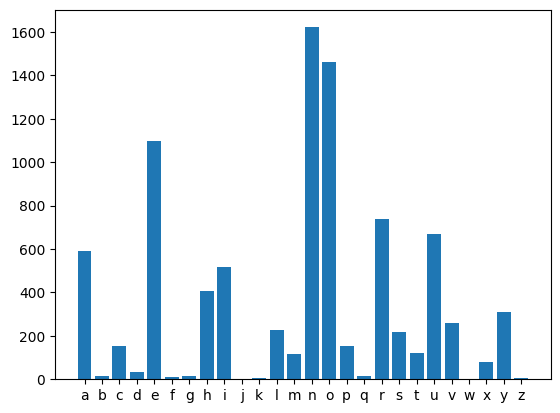

Length: 15, Position: 2


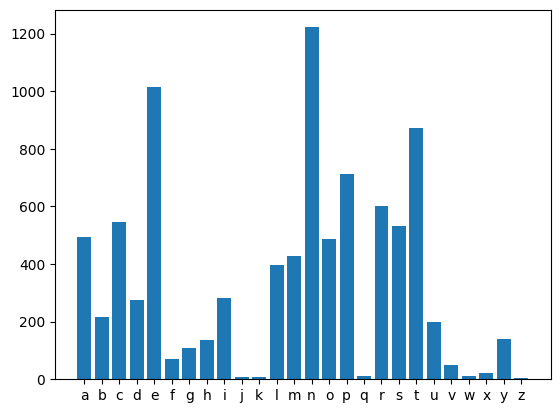

Length: 15, Position: 3


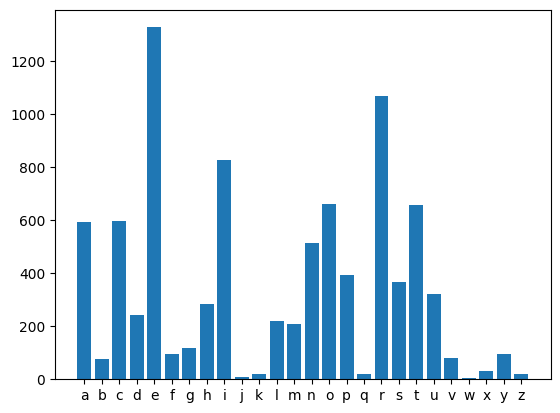

Length: 15, Position: 4


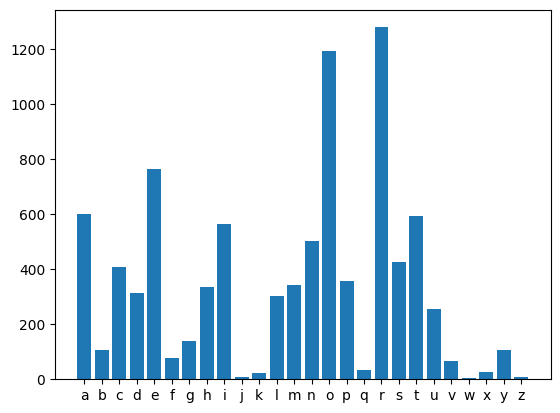

Length: 15, Position: 5


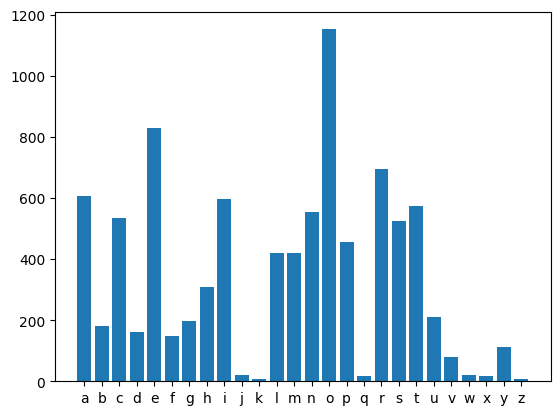

Length: 15, Position: 6


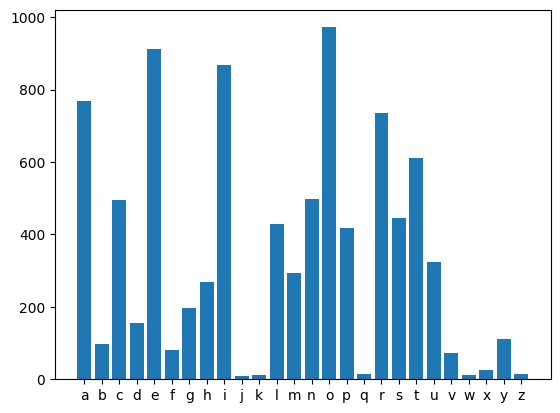

Length: 15, Position: 7


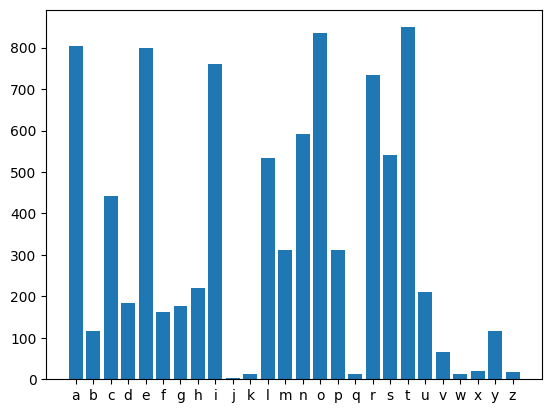

Length: 15, Position: 8


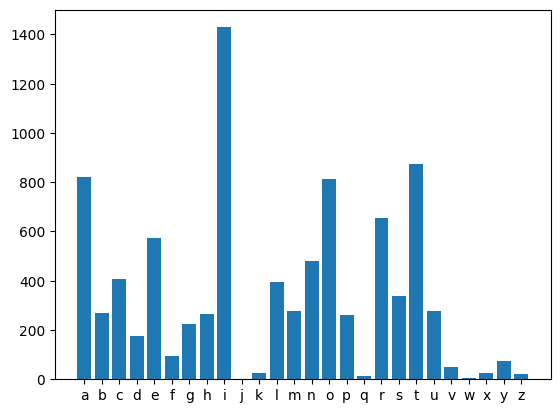

Length: 15, Position: 9


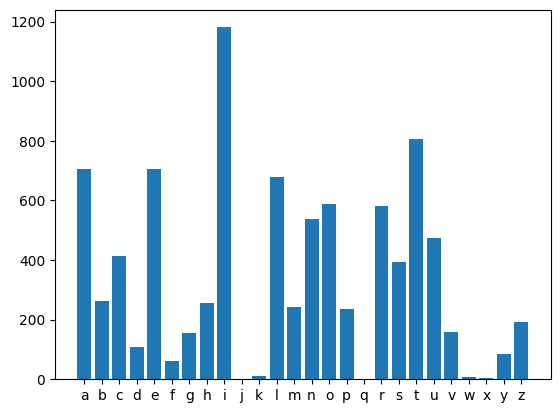

Length: 15, Position: 10


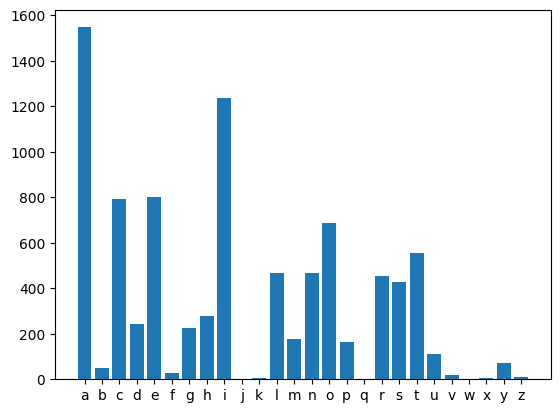

Length: 15, Position: 11


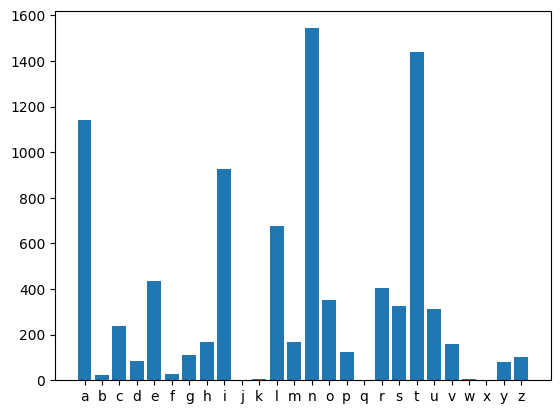

Length: 15, Position: 12


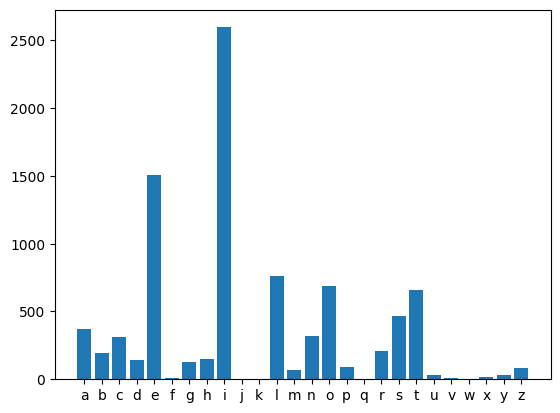

Length: 15, Position: 13


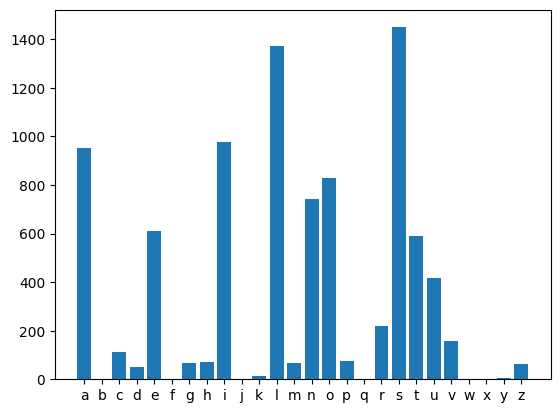

Length: 15, Position: 14


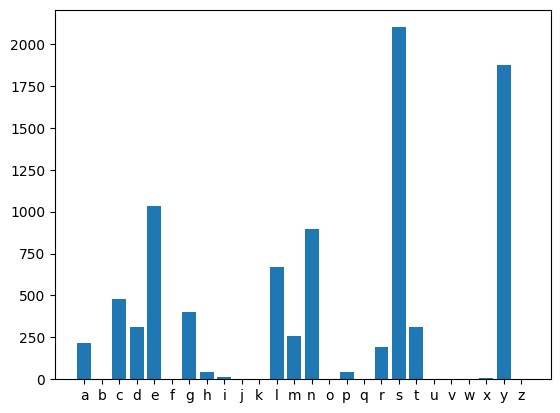

Length: 16, Position: 0


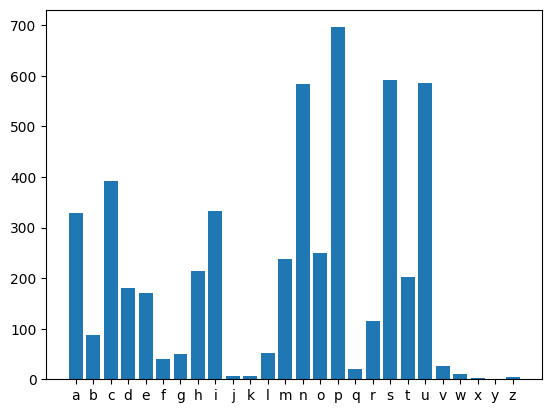

Length: 16, Position: 1


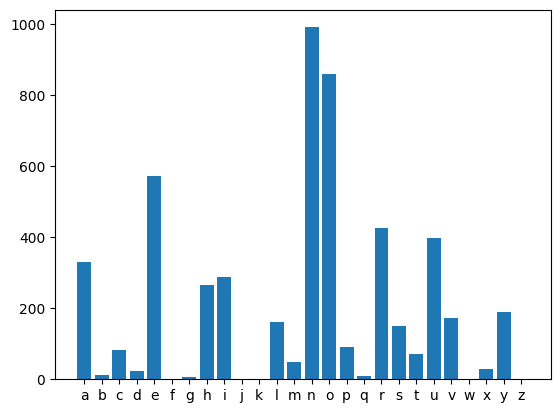

Length: 16, Position: 2


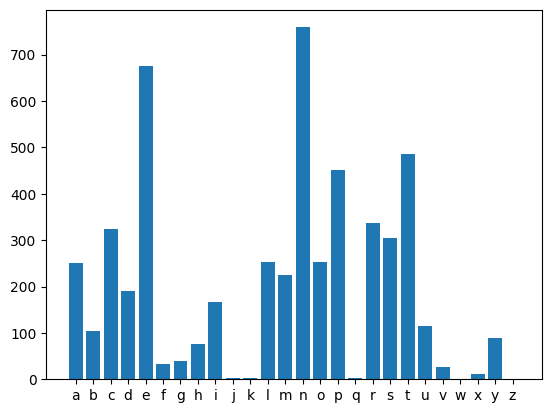

Length: 16, Position: 3


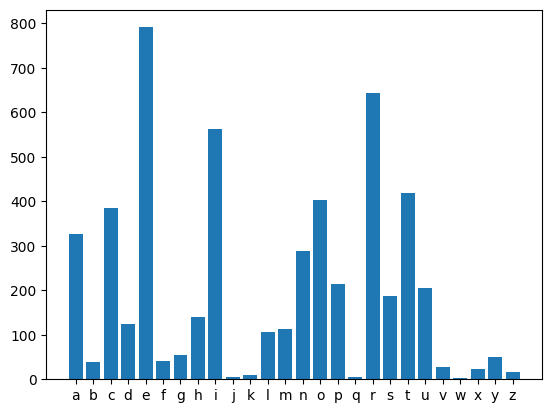

Length: 16, Position: 4


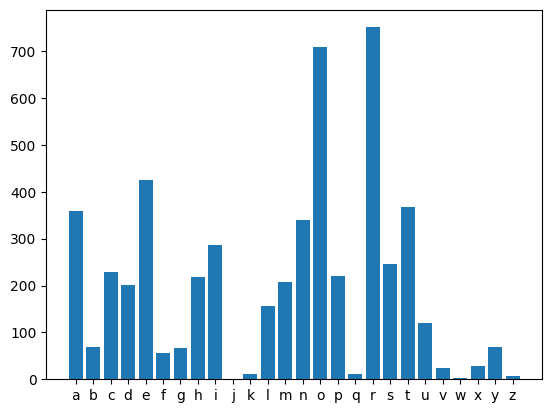

Length: 16, Position: 5


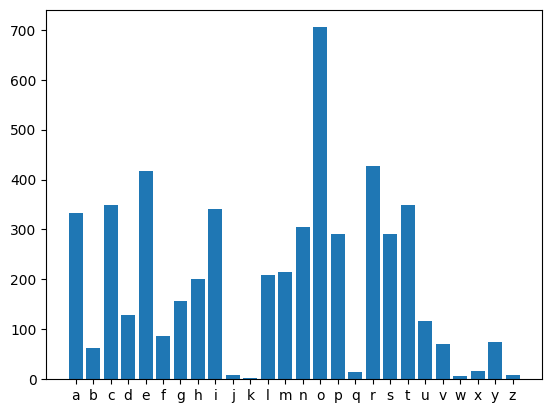

Length: 16, Position: 6


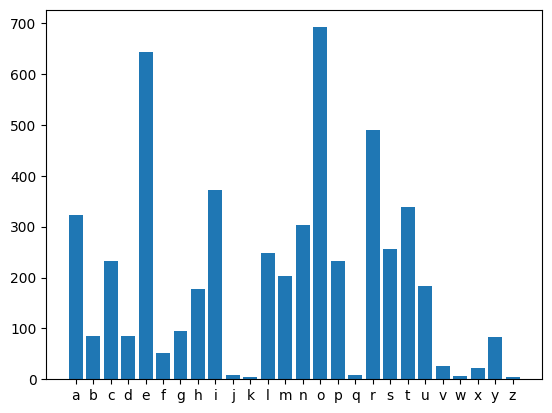

Length: 16, Position: 7


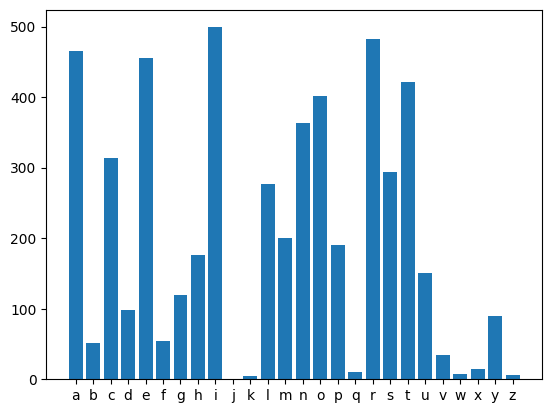

Length: 16, Position: 8


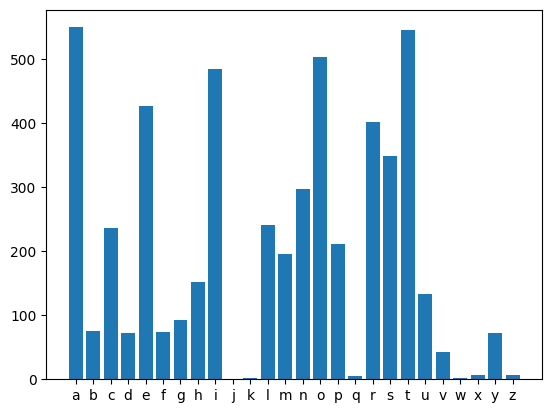

Length: 16, Position: 9


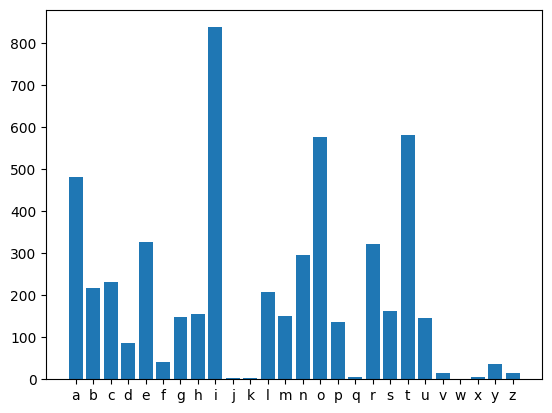

Length: 16, Position: 10


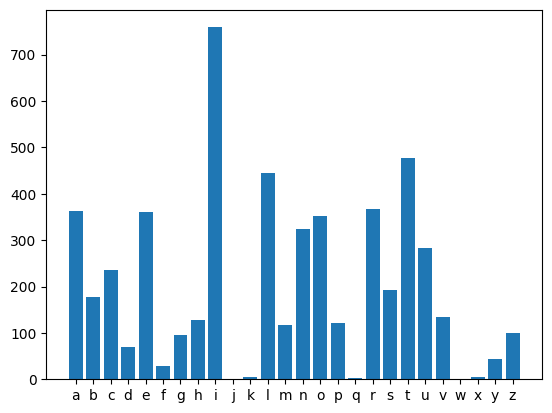

Length: 16, Position: 11


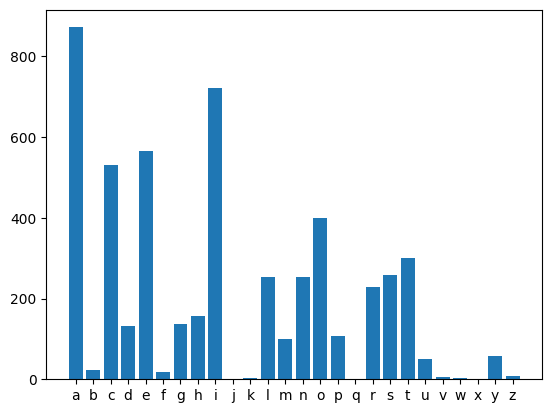

Length: 16, Position: 12


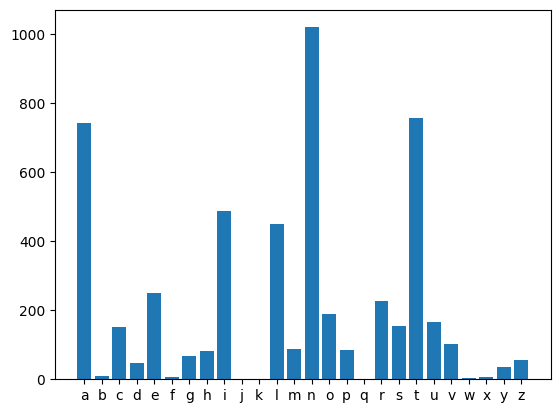

Length: 16, Position: 13


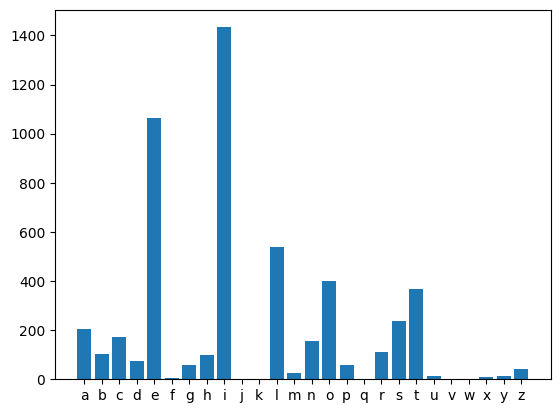

Length: 16, Position: 14


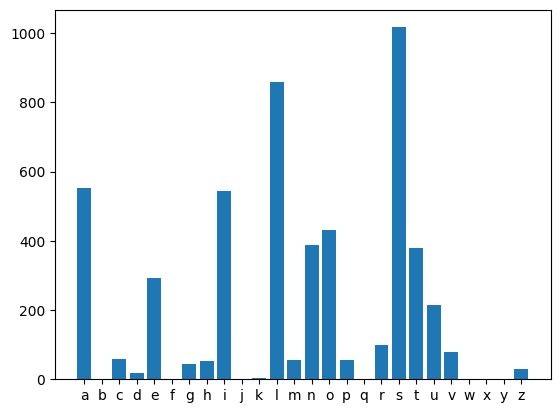

Length: 16, Position: 15


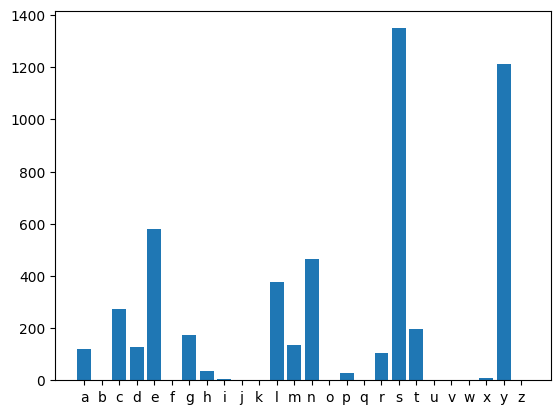

Length: 17, Position: 0


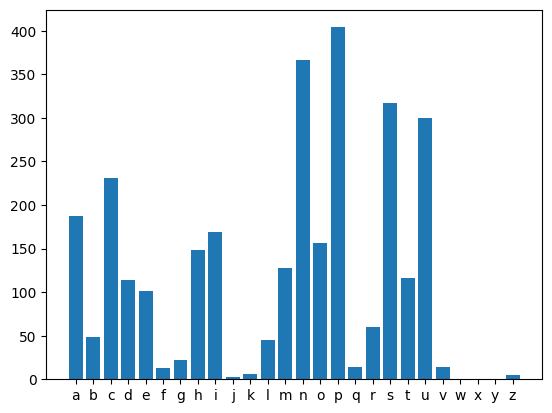

Length: 17, Position: 1


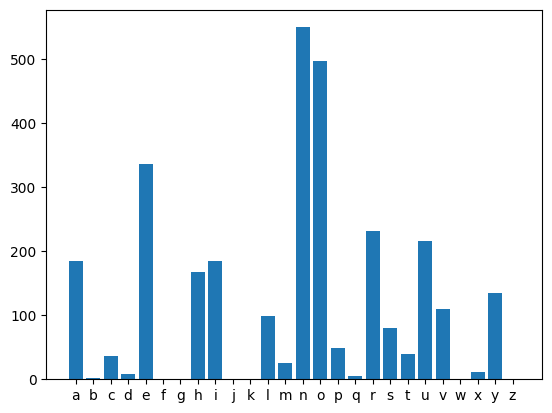

Length: 17, Position: 2


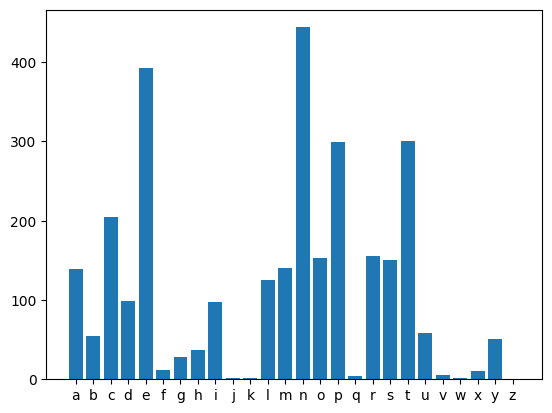

Length: 17, Position: 3


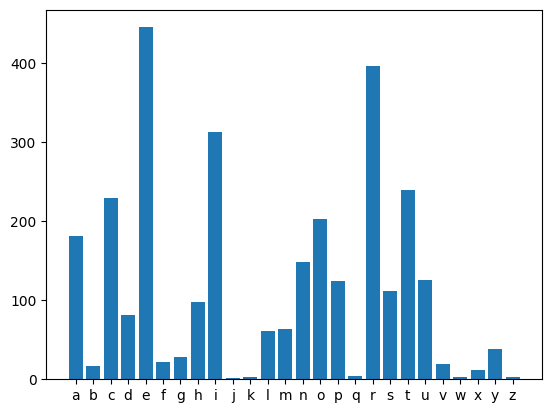

Length: 17, Position: 4


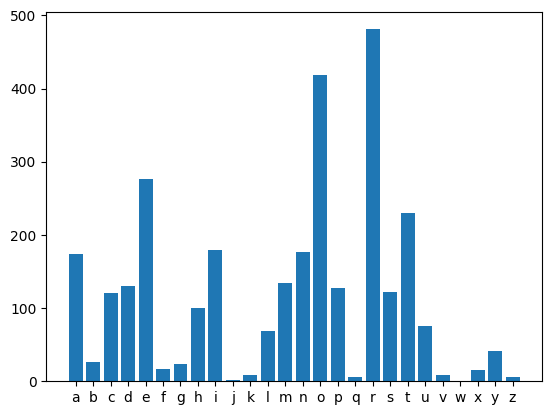

Length: 17, Position: 5


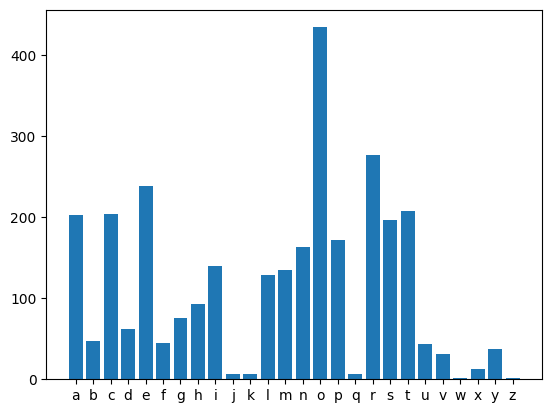

Length: 17, Position: 6


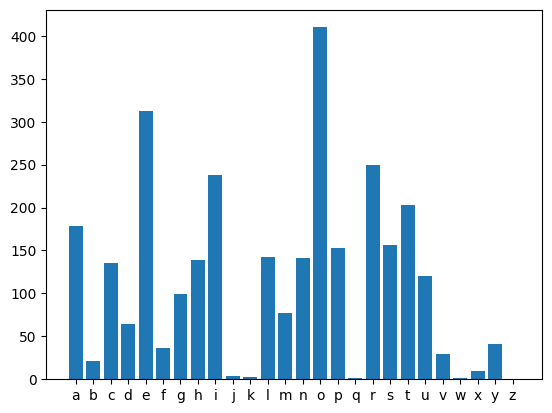

Length: 17, Position: 7


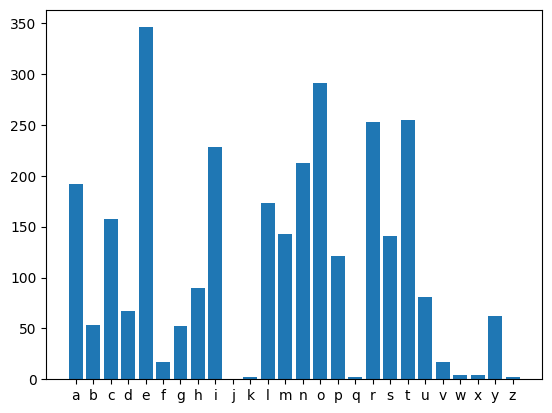

Length: 17, Position: 8


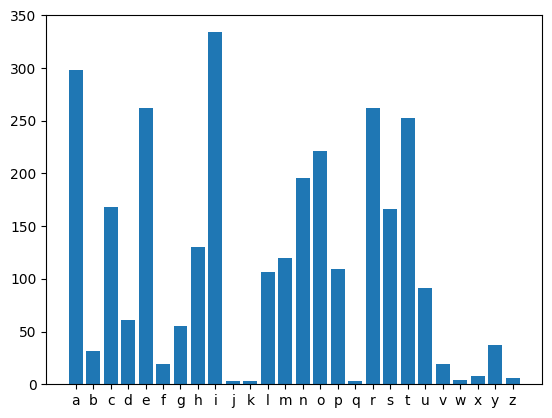

Length: 17, Position: 9


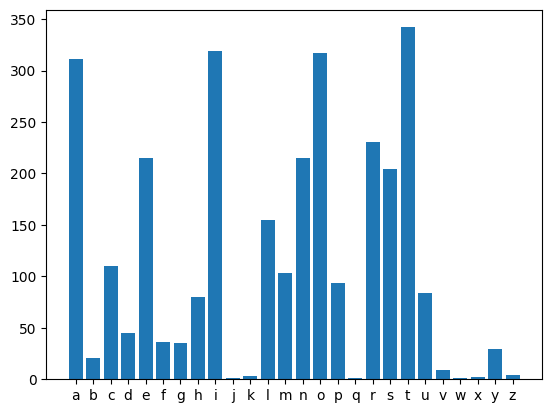

Length: 17, Position: 10


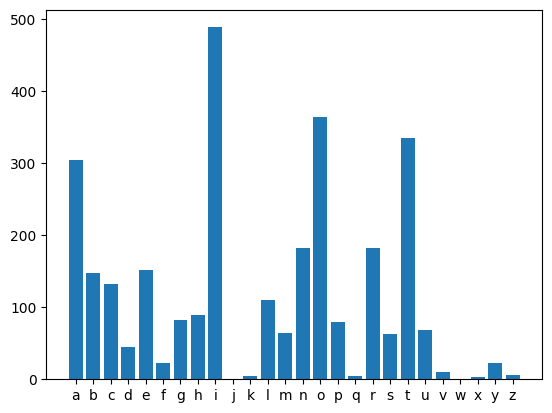

Length: 17, Position: 11


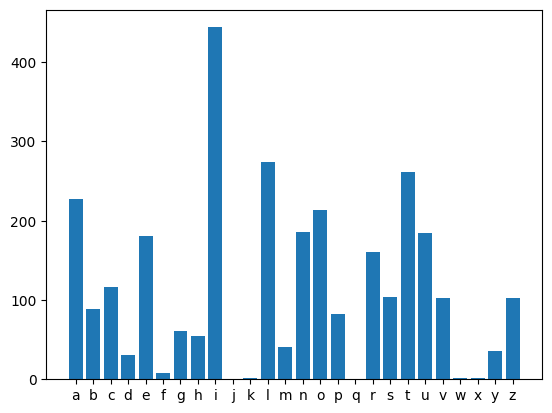

Length: 17, Position: 12


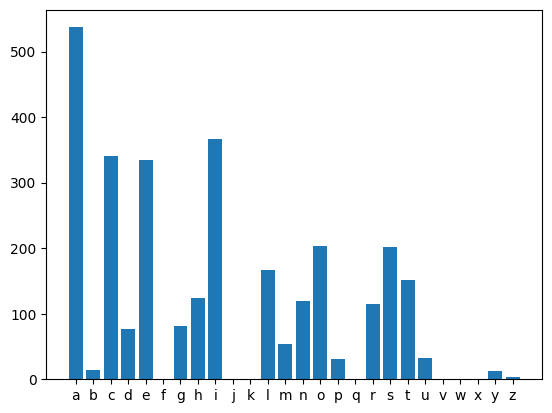

Length: 17, Position: 13


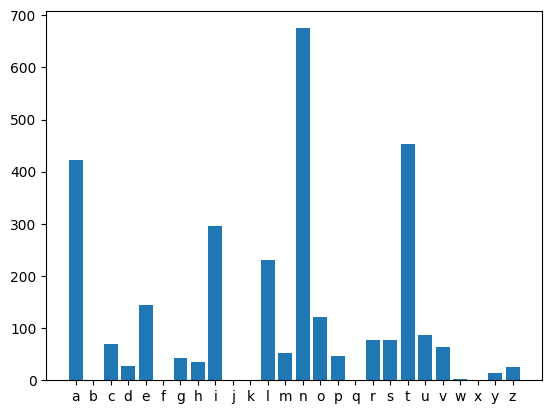

Length: 17, Position: 14


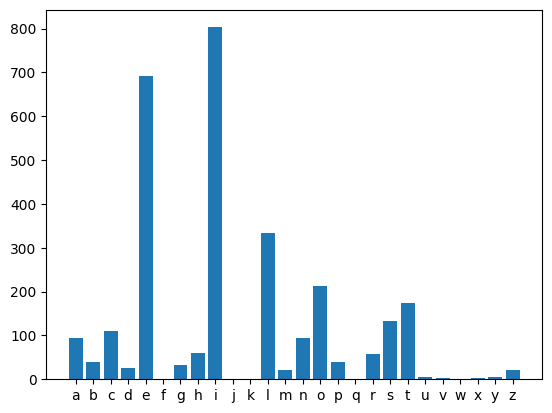

Length: 17, Position: 15


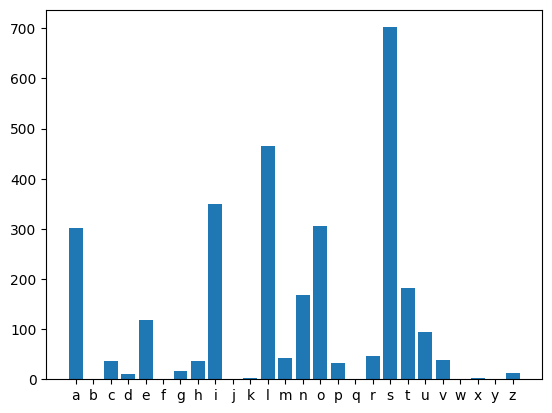

Length: 17, Position: 16


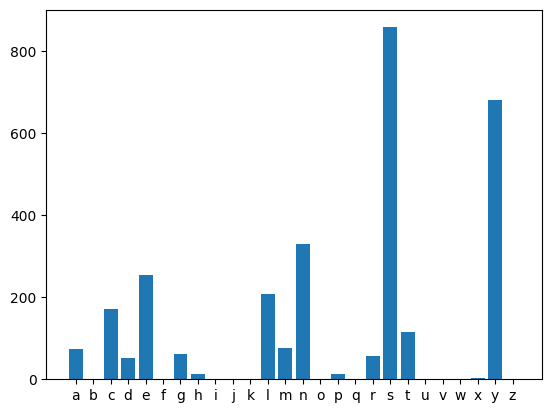

Length: 18, Position: 0


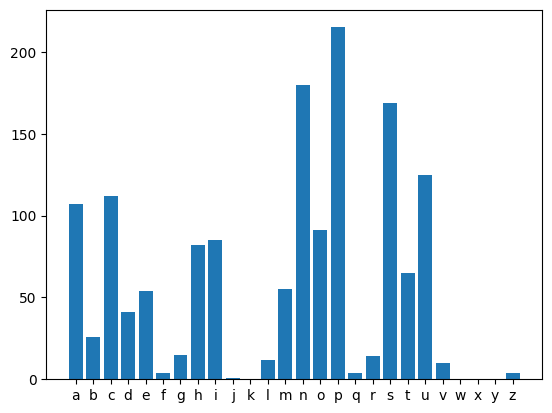

Length: 18, Position: 1


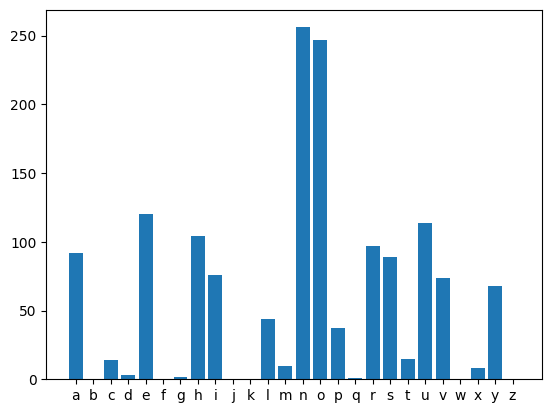

Length: 18, Position: 2


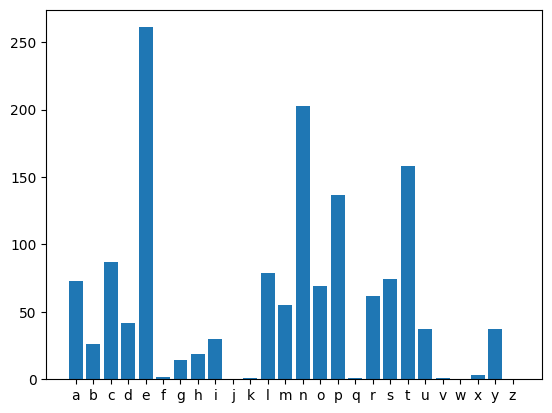

Length: 18, Position: 3


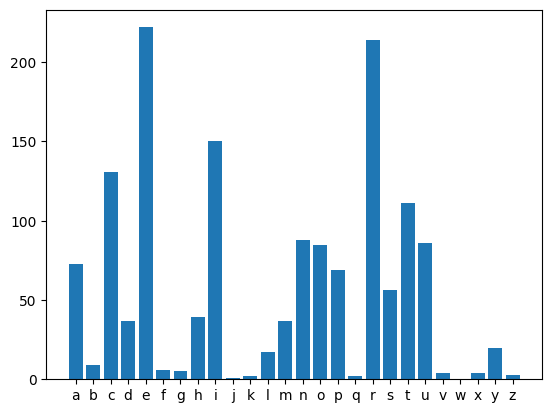

Length: 18, Position: 4


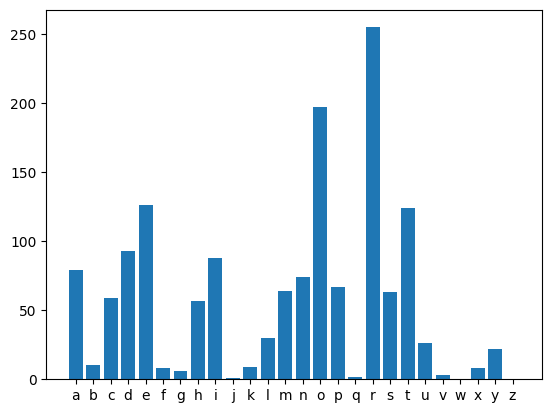

Length: 18, Position: 5


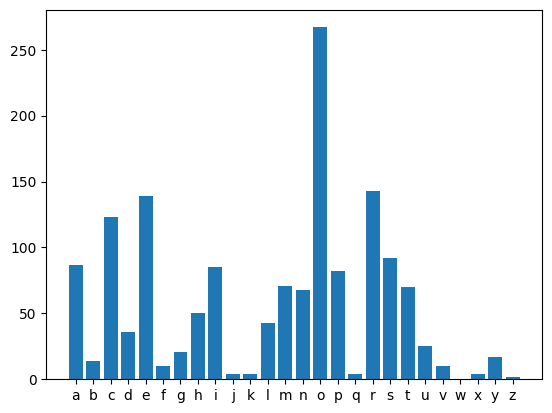

Length: 18, Position: 6


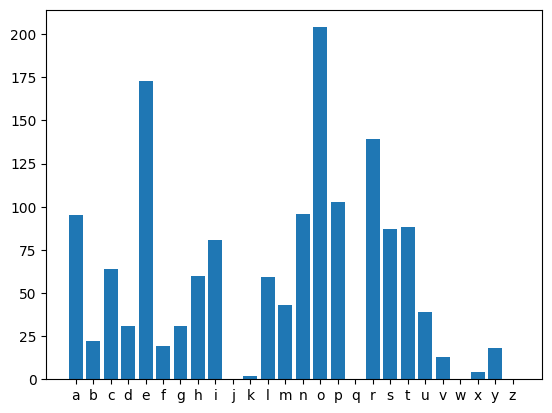

Length: 18, Position: 7


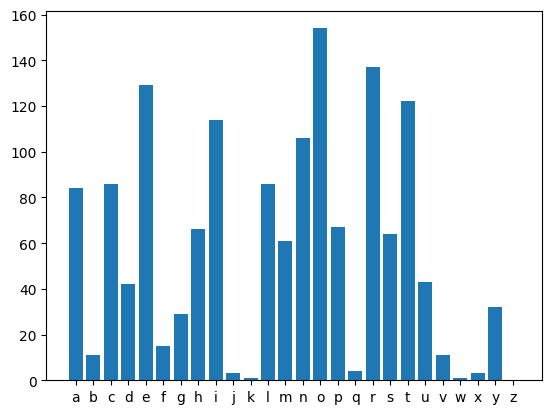

Length: 18, Position: 8


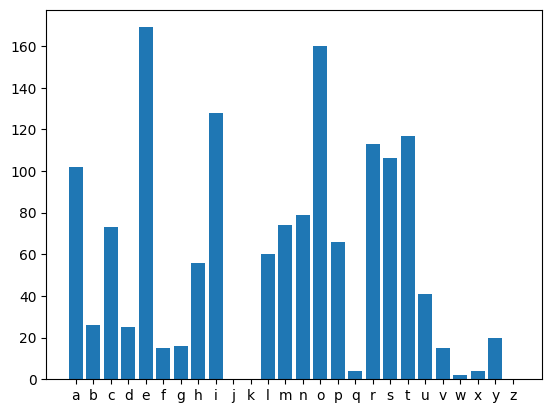

Length: 18, Position: 9


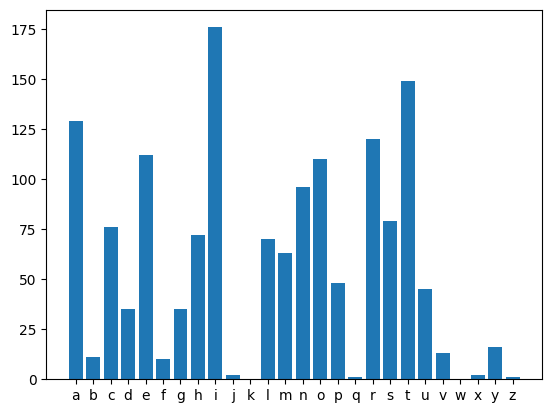

Length: 18, Position: 10


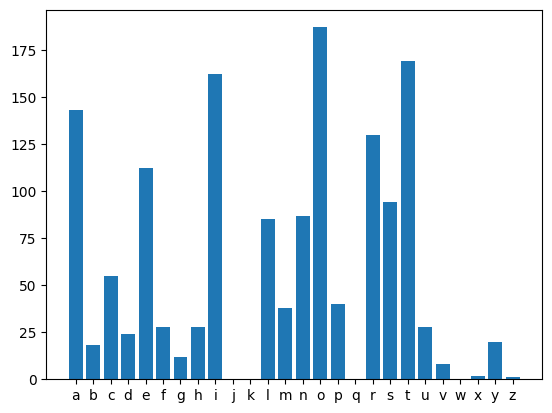

Length: 18, Position: 11


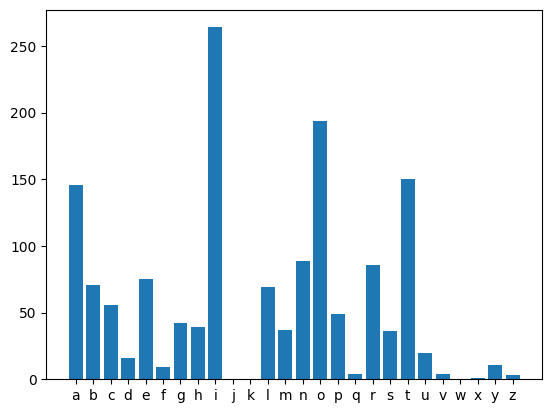

Length: 18, Position: 12


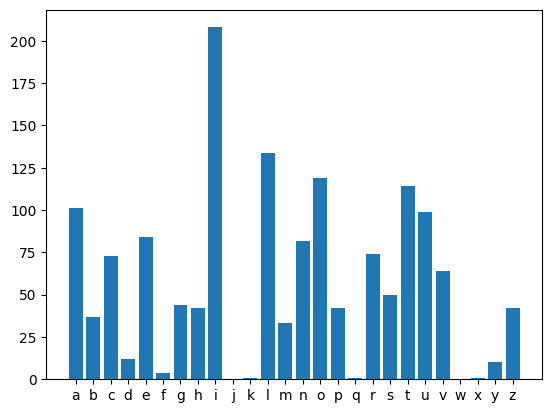

Length: 18, Position: 13


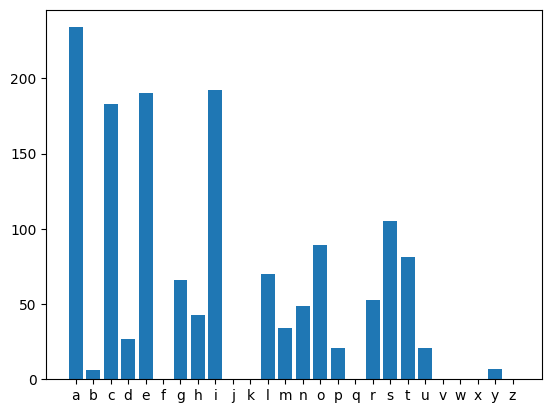

Length: 18, Position: 14


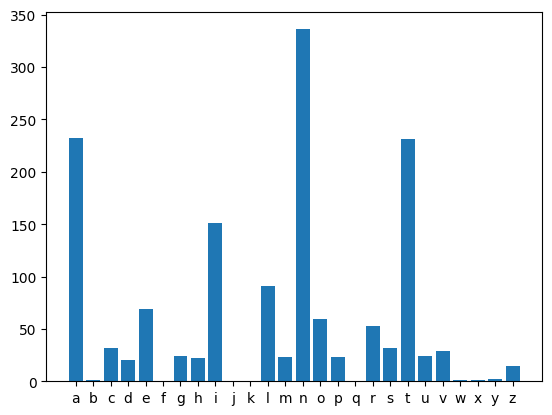

Length: 18, Position: 15


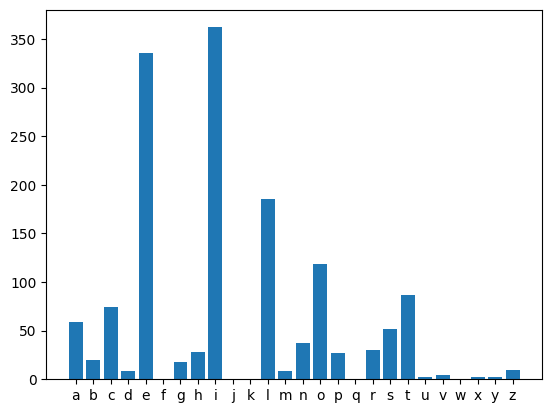

Length: 18, Position: 16


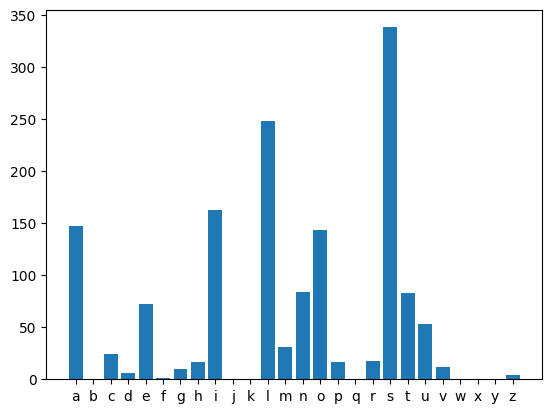

Length: 18, Position: 17


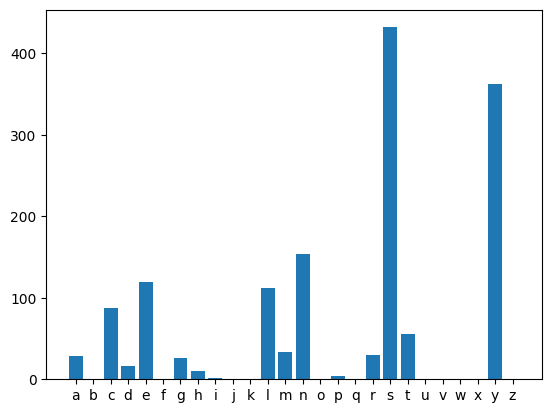

Length: 19, Position: 0


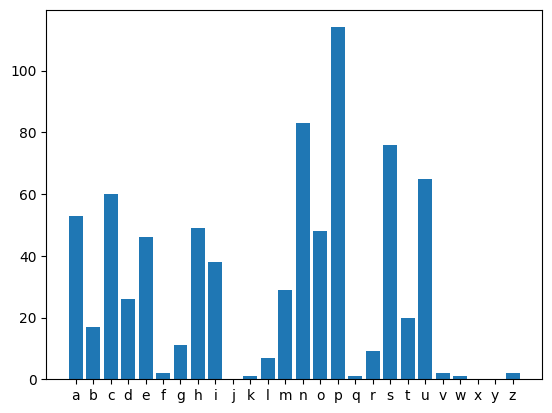

Length: 19, Position: 1


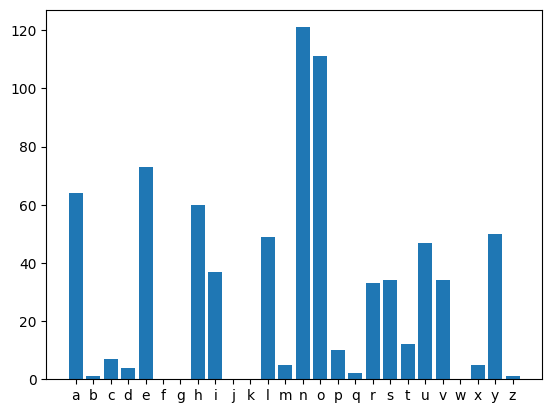

Length: 19, Position: 2


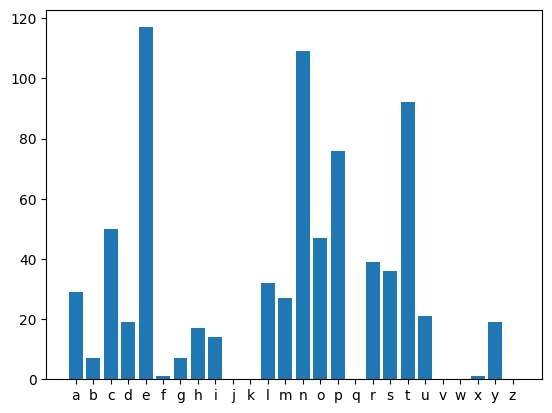

Length: 19, Position: 3


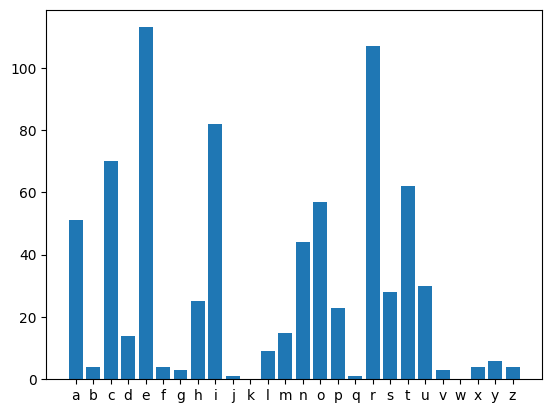

Length: 19, Position: 4


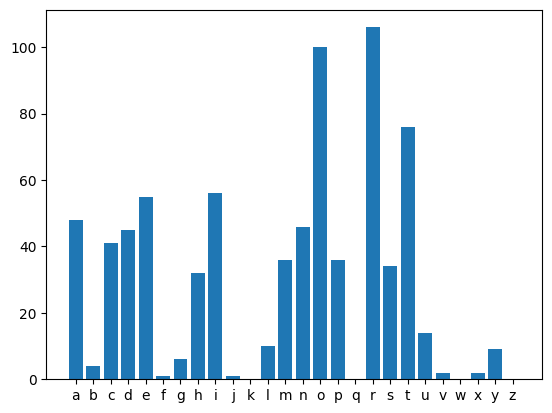

Length: 19, Position: 5


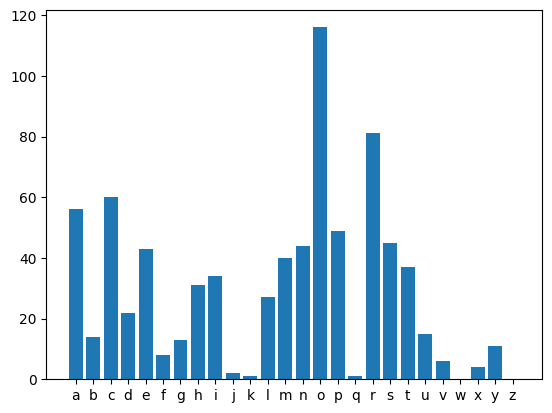

Length: 19, Position: 6


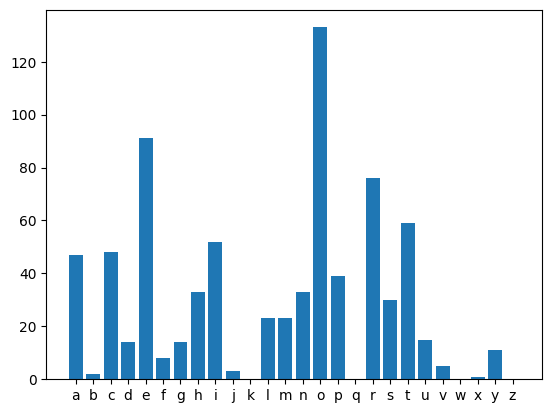

Length: 19, Position: 7


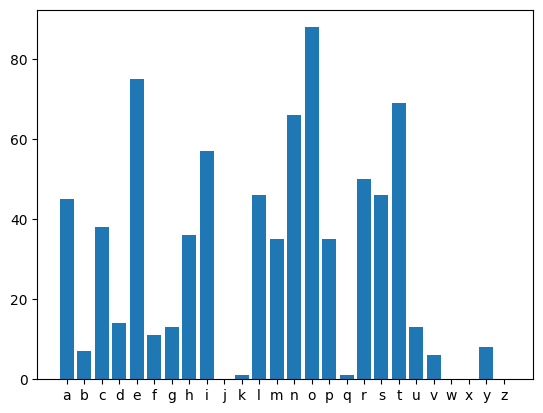

Length: 19, Position: 8


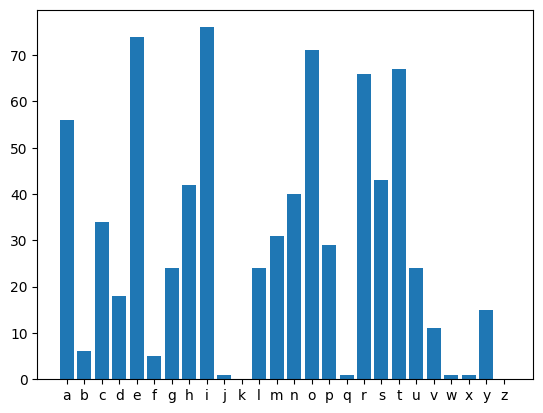

Length: 19, Position: 9


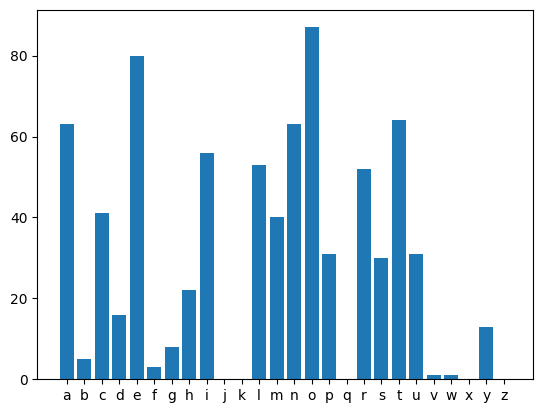

Length: 19, Position: 10


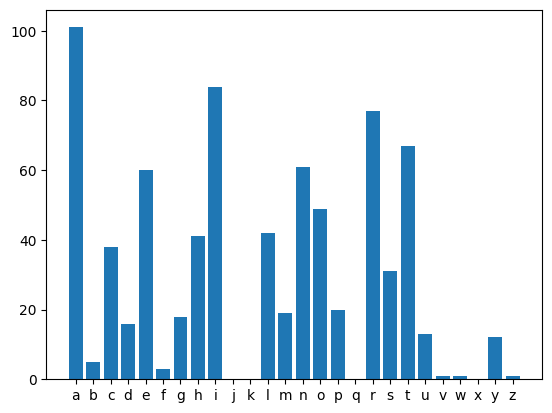

Length: 19, Position: 11


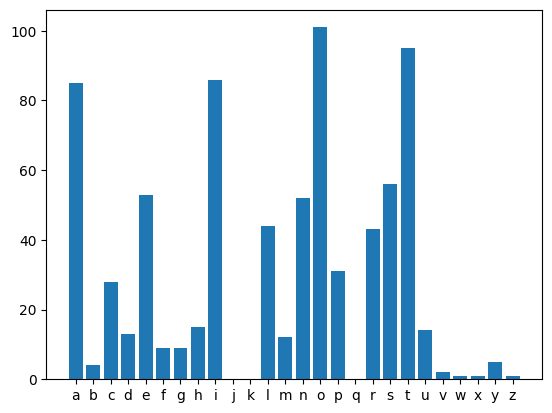

Length: 19, Position: 12


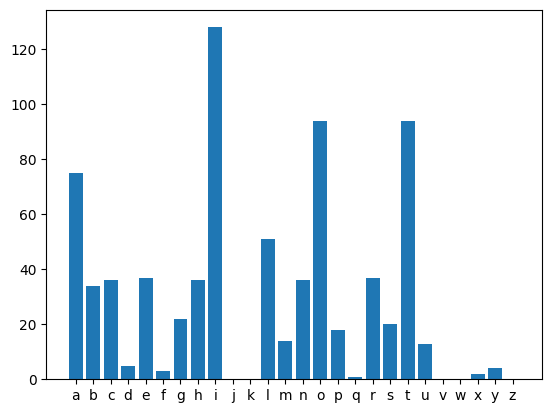

Length: 19, Position: 13


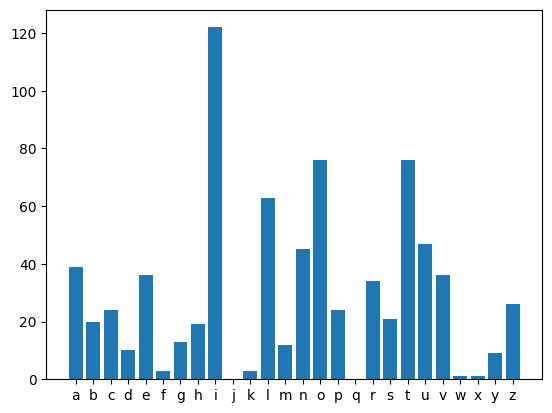

Length: 19, Position: 14


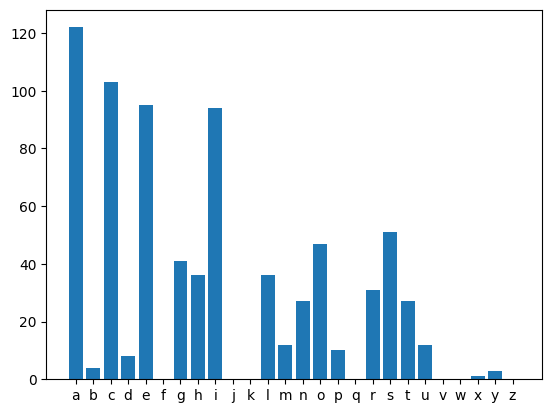

Length: 19, Position: 15


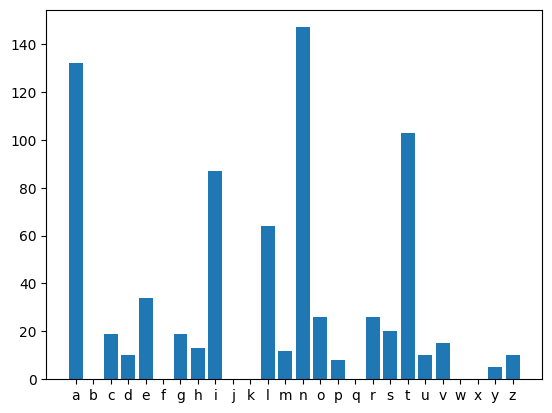

Length: 19, Position: 16


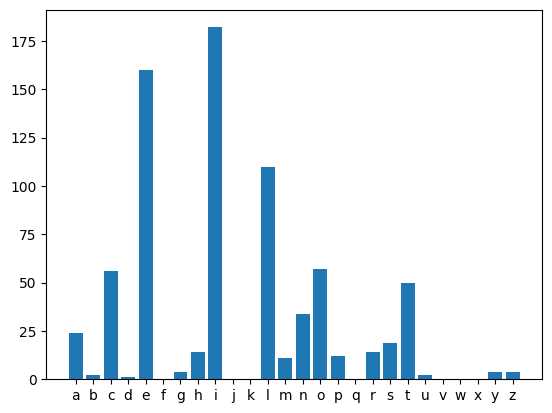

Length: 19, Position: 17


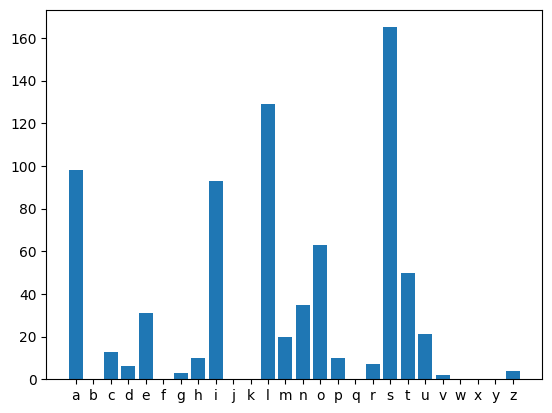

Length: 19, Position: 18


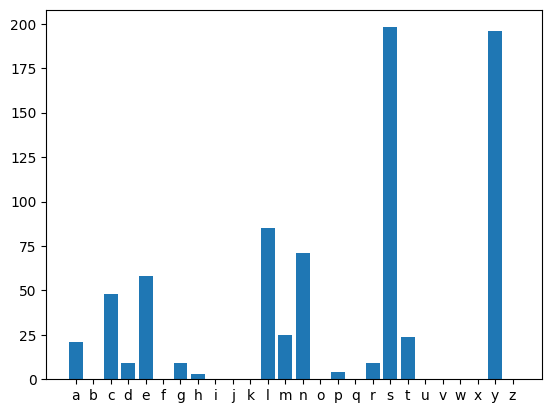

Length: 20, Position: 0


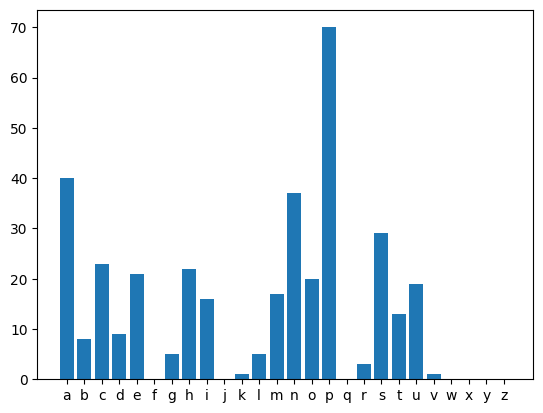

Length: 20, Position: 1


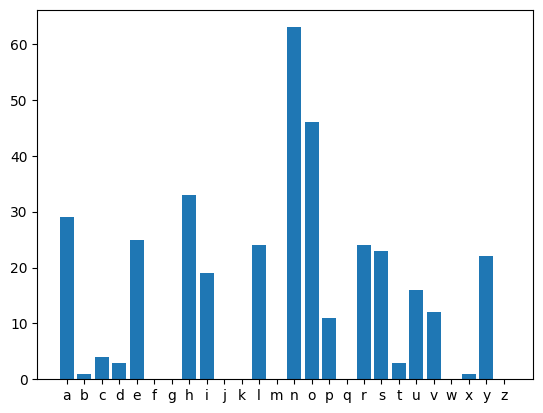

Length: 20, Position: 2


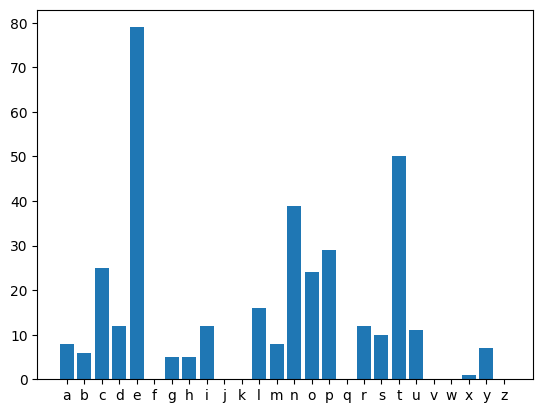

Length: 20, Position: 3


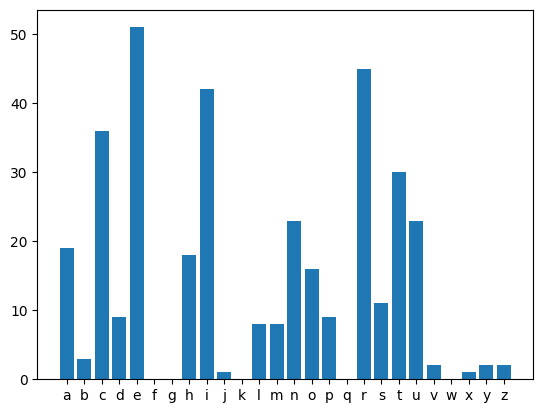

Length: 20, Position: 4


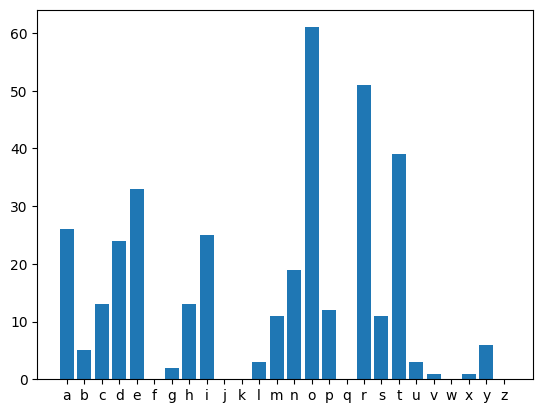

Length: 20, Position: 5


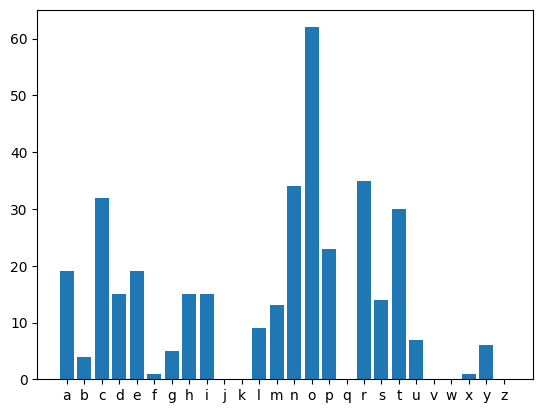

Length: 20, Position: 6


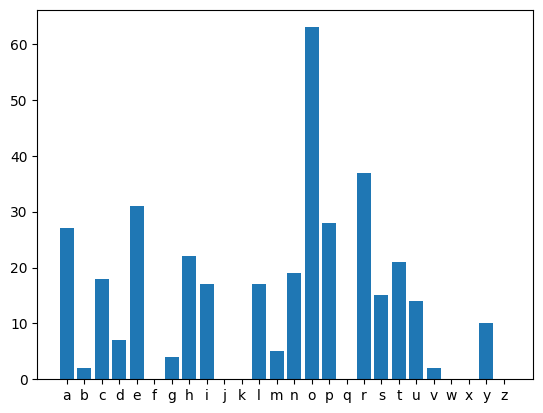

Length: 20, Position: 7


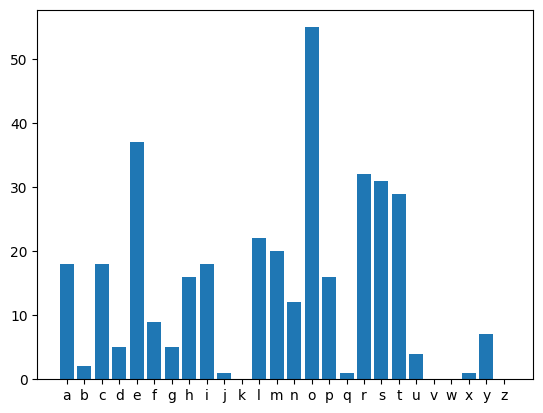

Length: 20, Position: 8


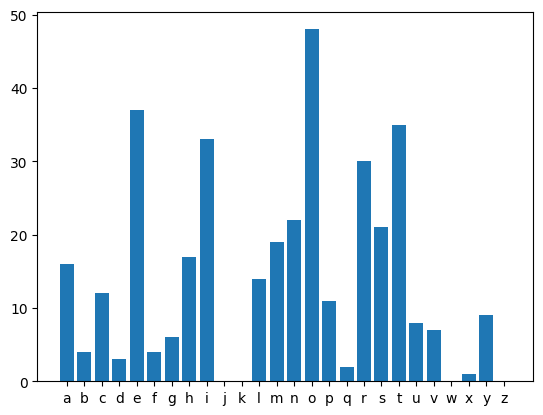

Length: 20, Position: 9


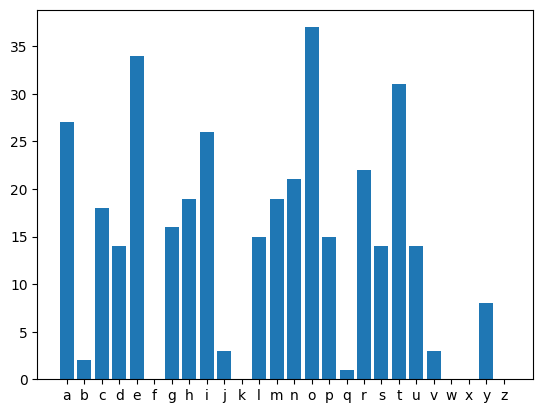

Length: 20, Position: 10


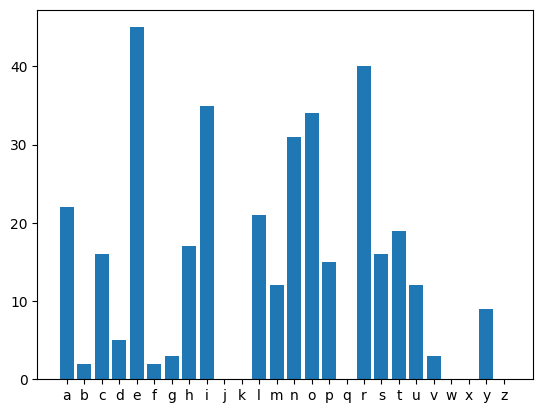

Length: 20, Position: 11


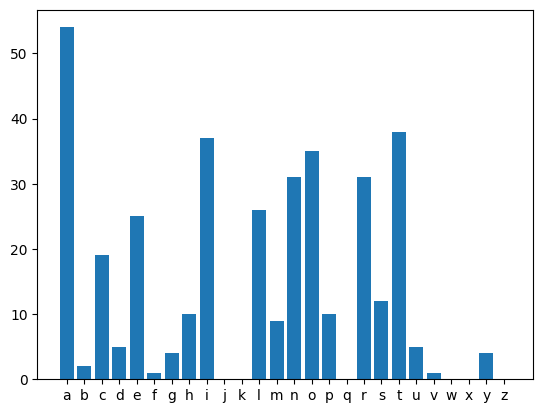

Length: 20, Position: 12


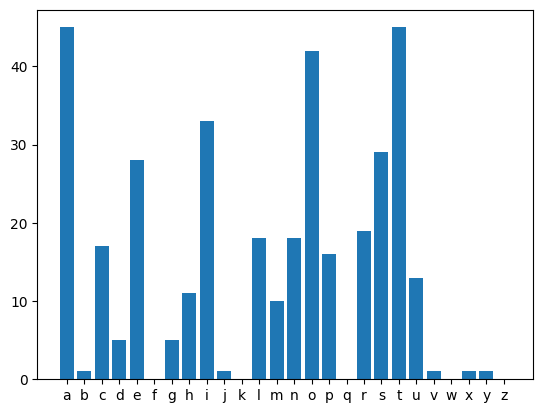

Length: 20, Position: 13


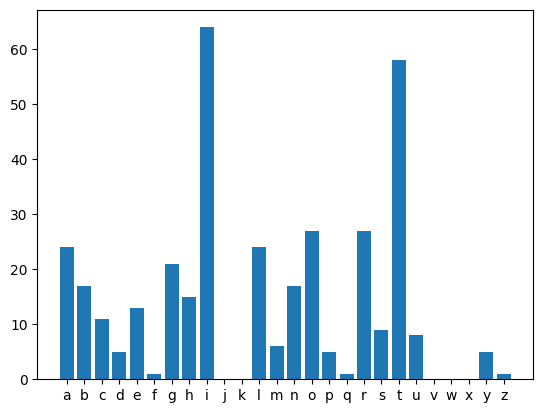

Length: 20, Position: 14


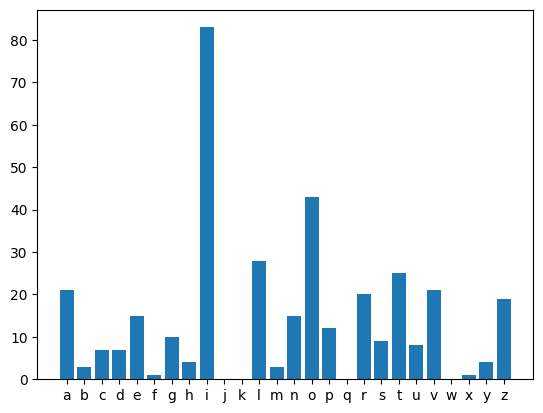

Length: 20, Position: 15


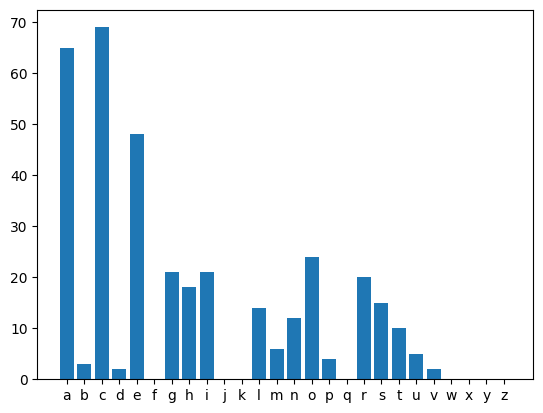

Length: 20, Position: 16


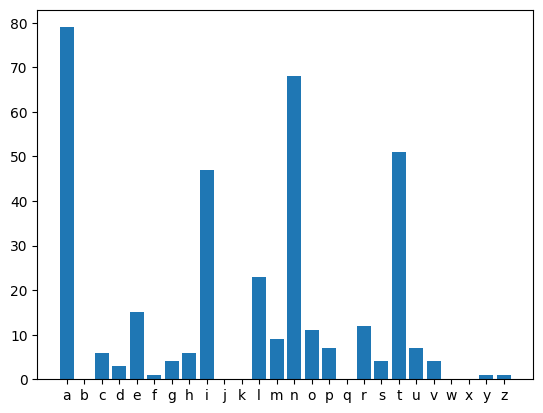

Length: 20, Position: 17


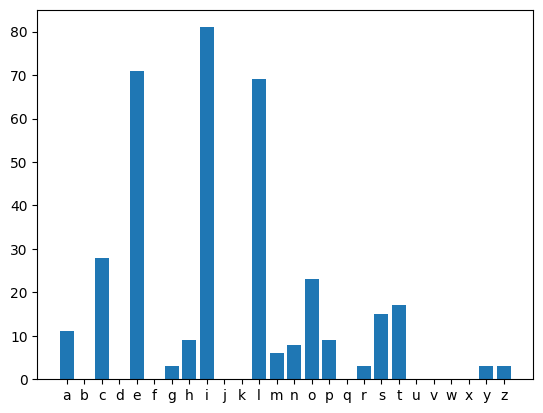

Length: 20, Position: 18


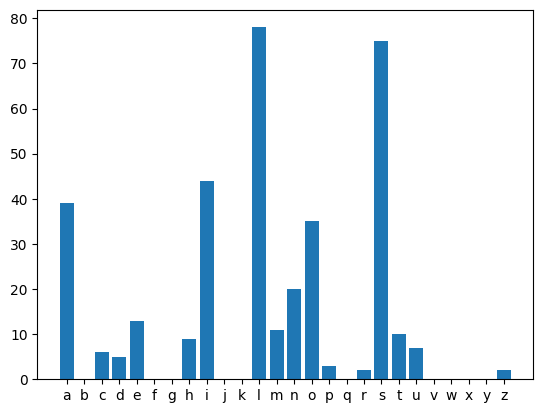

Length: 20, Position: 19


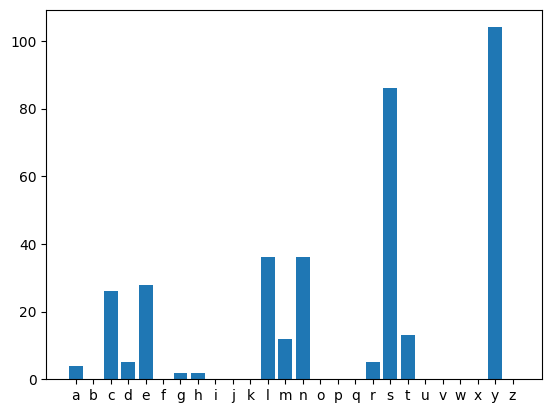

Length: 21, Position: 0


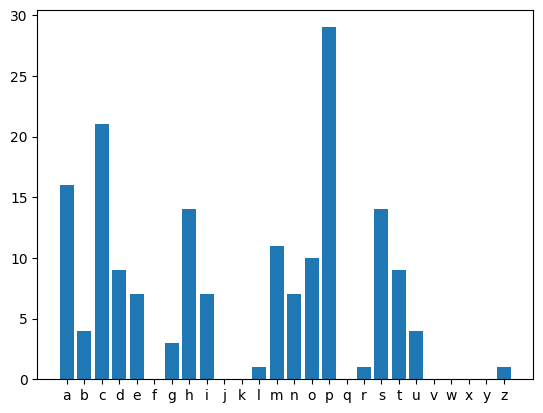

Length: 21, Position: 1


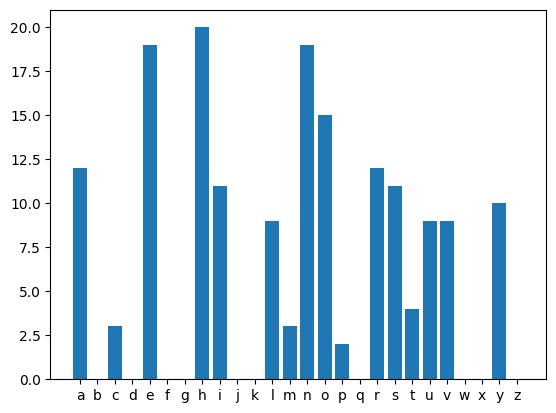

Length: 21, Position: 2


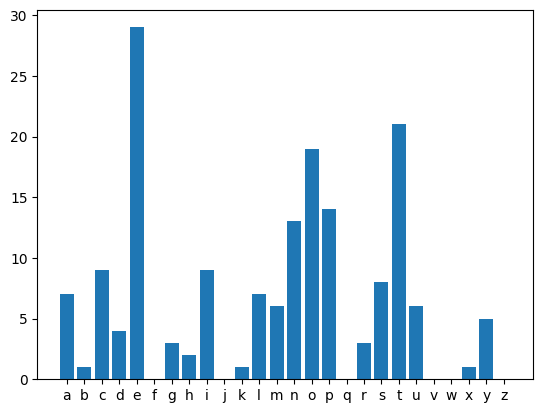

Length: 21, Position: 3


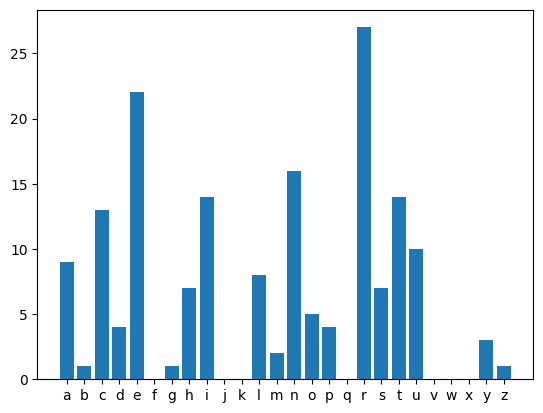

Length: 21, Position: 4


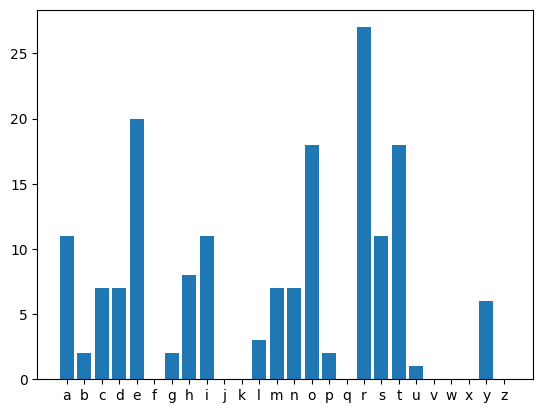

Length: 21, Position: 5


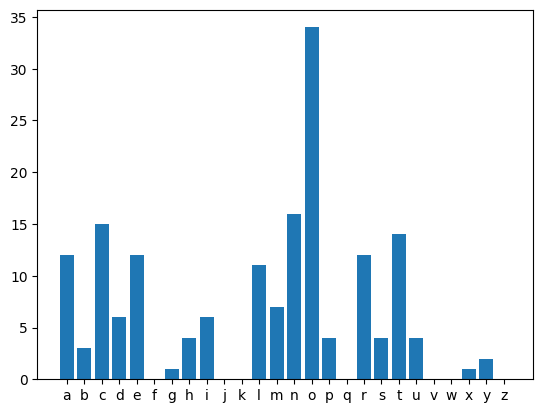

Length: 21, Position: 6


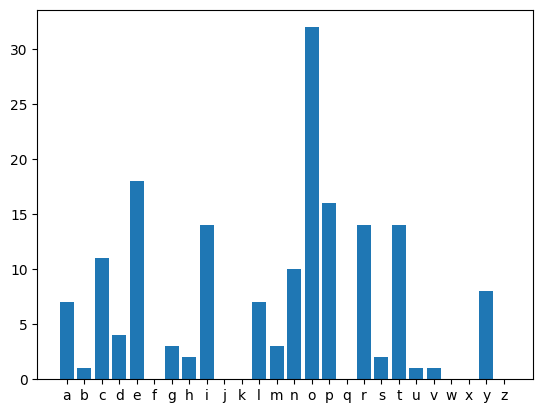

Length: 21, Position: 7


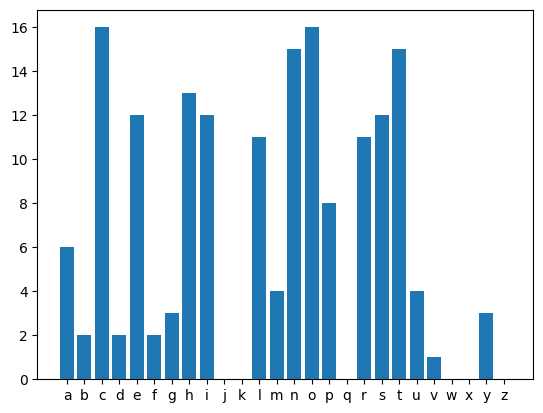

Length: 21, Position: 8


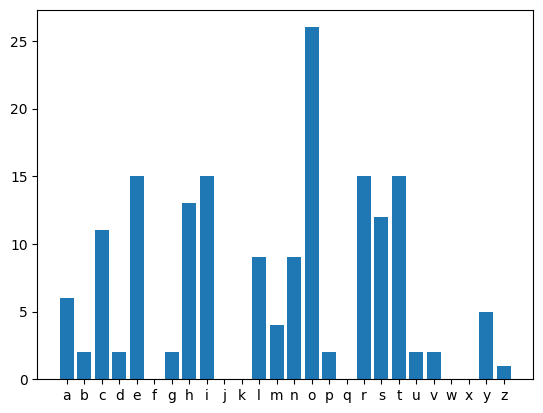

Length: 21, Position: 9


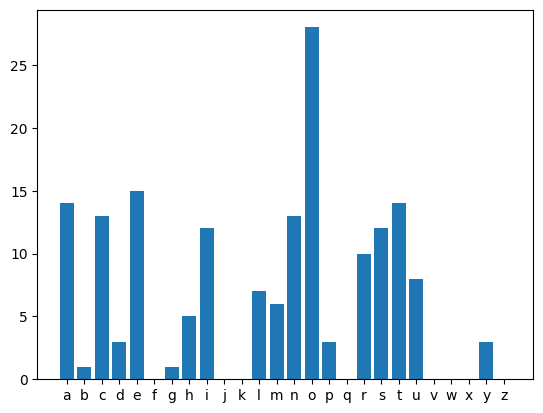

Length: 21, Position: 10


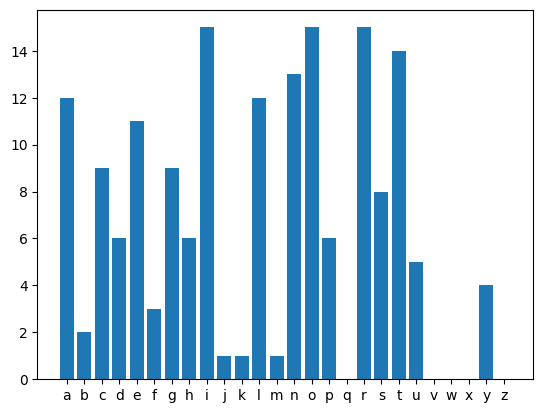

Length: 21, Position: 11


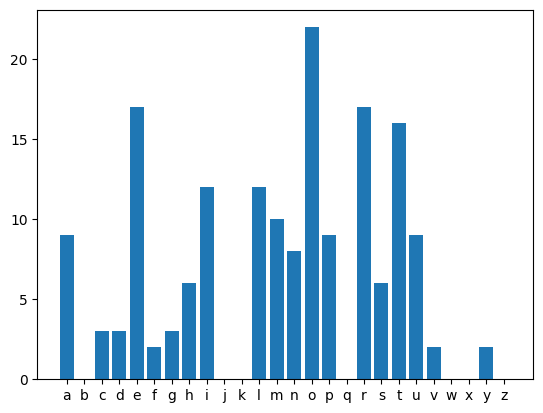

Length: 21, Position: 12


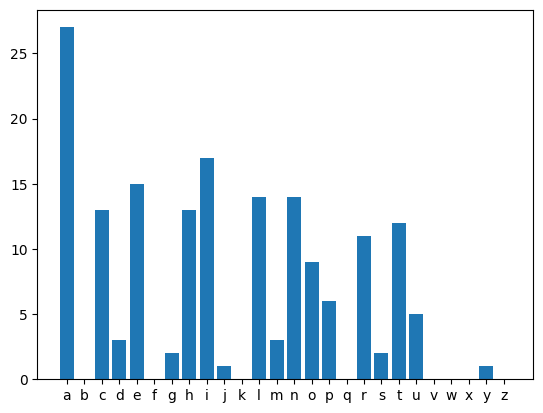

Length: 21, Position: 13


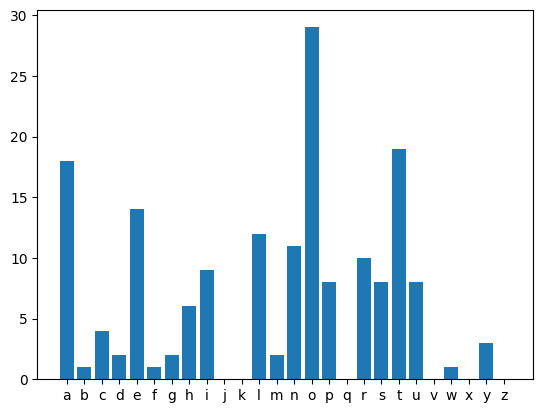

Length: 21, Position: 14


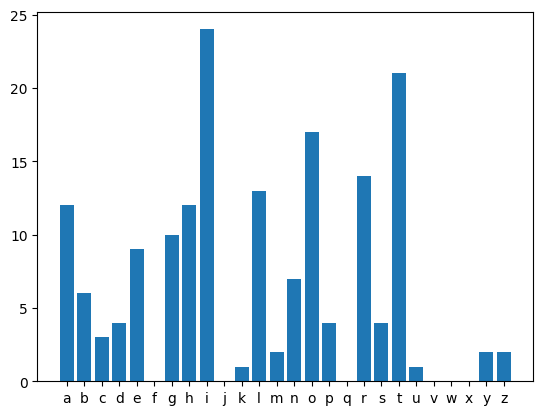

Length: 21, Position: 15


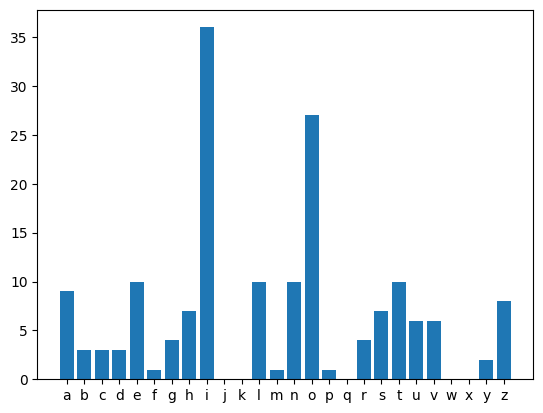

Length: 21, Position: 16


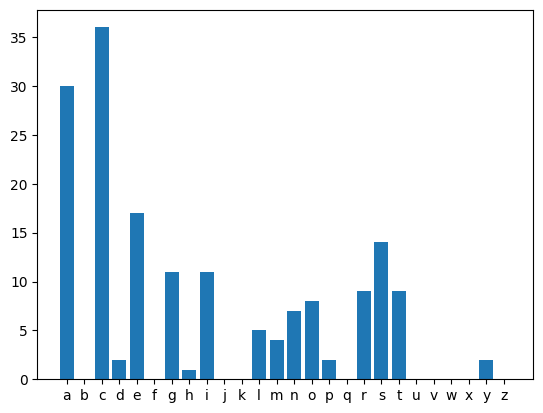

Length: 21, Position: 17


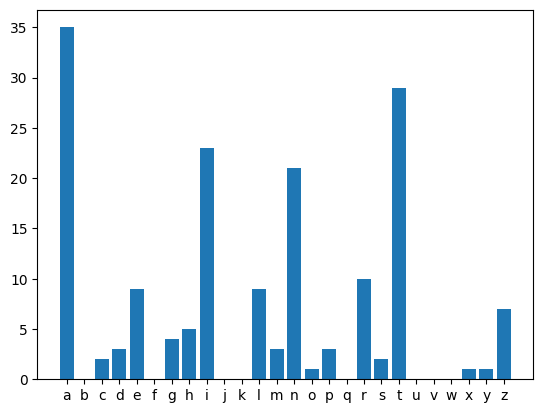

Length: 21, Position: 18


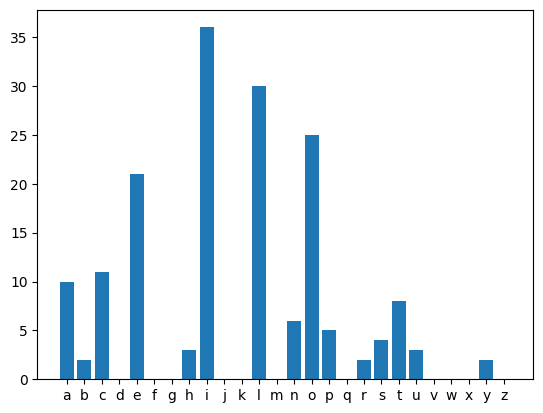

Length: 21, Position: 19


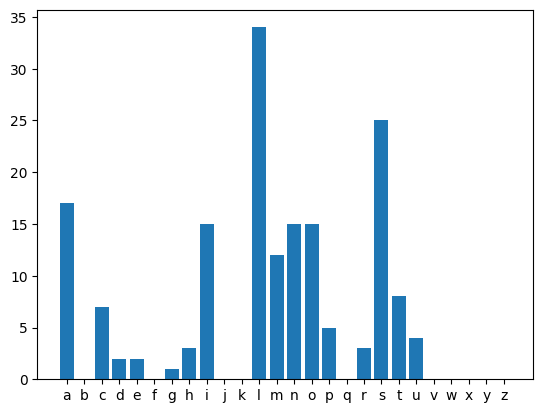

Length: 21, Position: 20


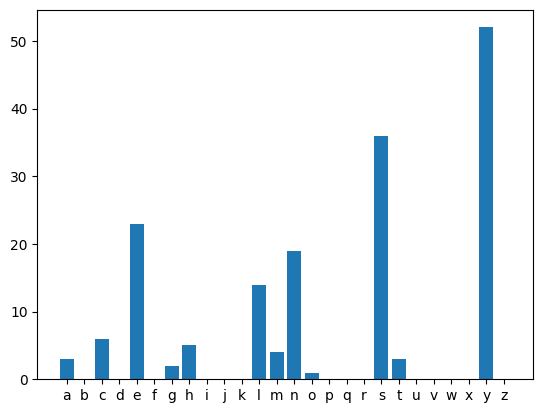

Length: 22, Position: 0


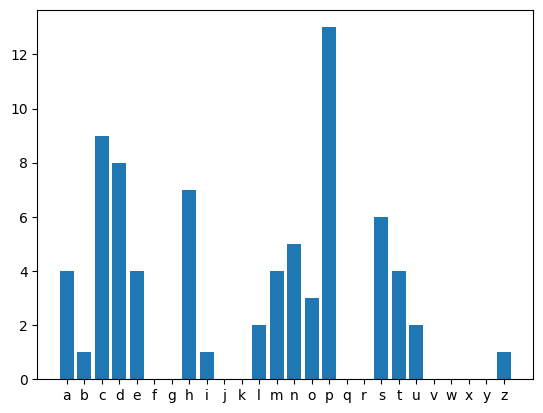

Length: 22, Position: 1


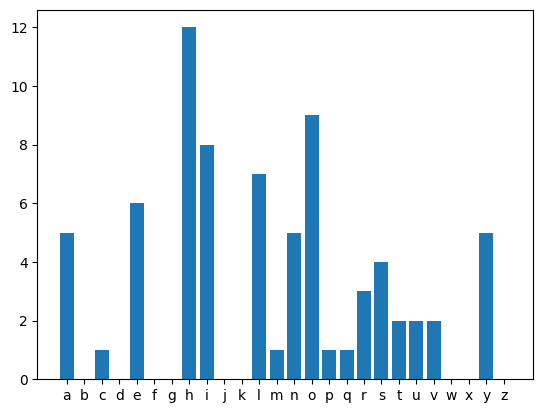

Length: 22, Position: 2


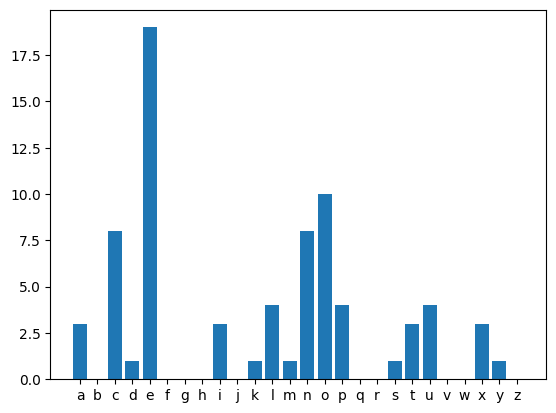

Length: 22, Position: 3


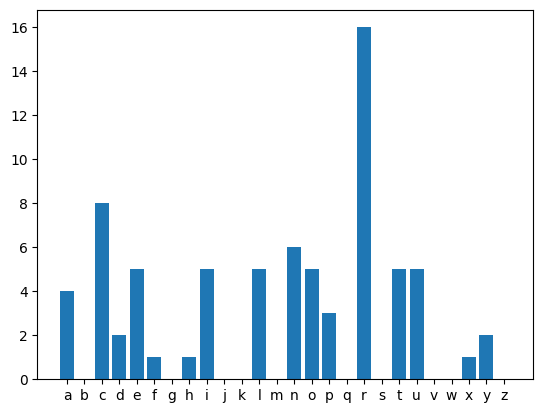

Length: 22, Position: 4


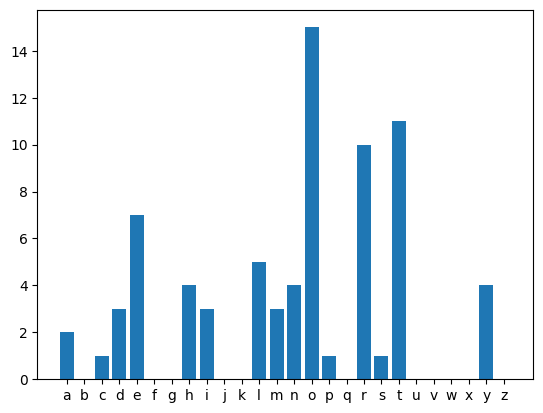

Length: 22, Position: 5


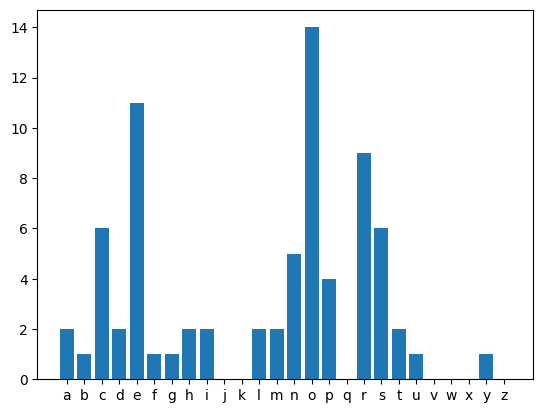

Length: 22, Position: 6


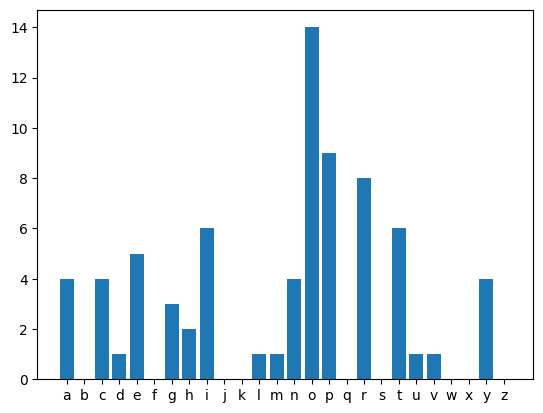

Length: 22, Position: 7


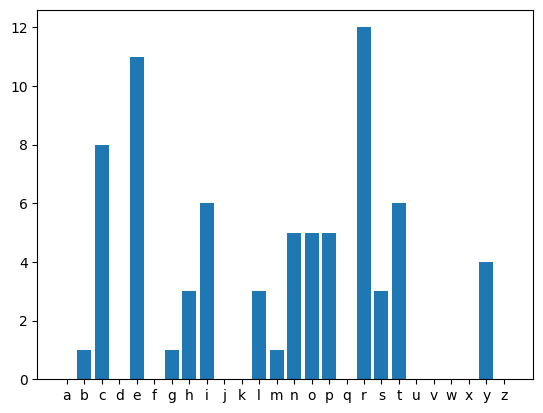

Length: 22, Position: 8


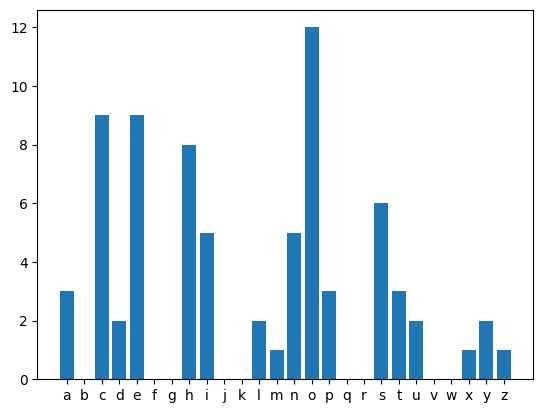

Length: 22, Position: 9


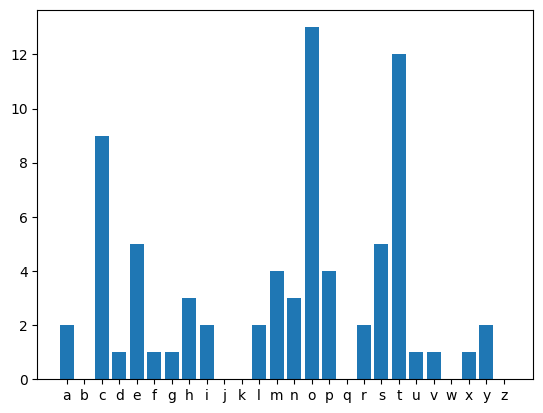

Length: 22, Position: 10


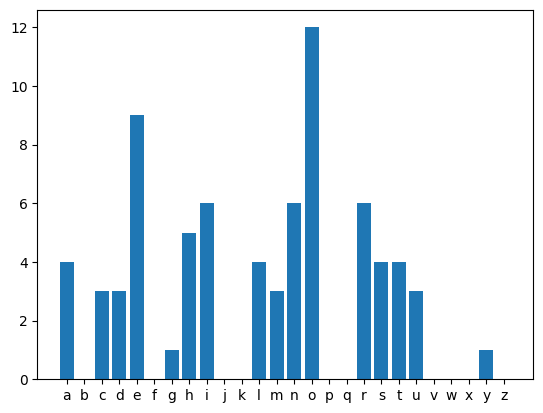

Length: 22, Position: 11


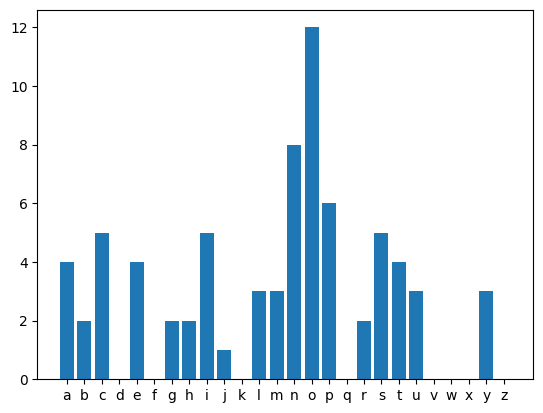

Length: 22, Position: 12


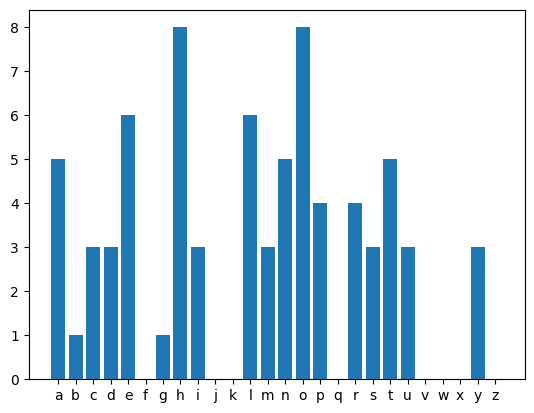

Length: 22, Position: 13


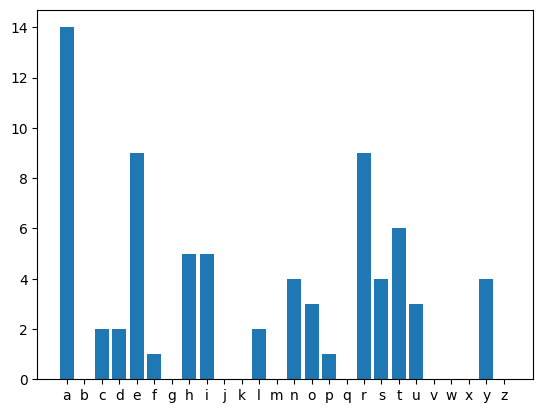

Length: 22, Position: 14


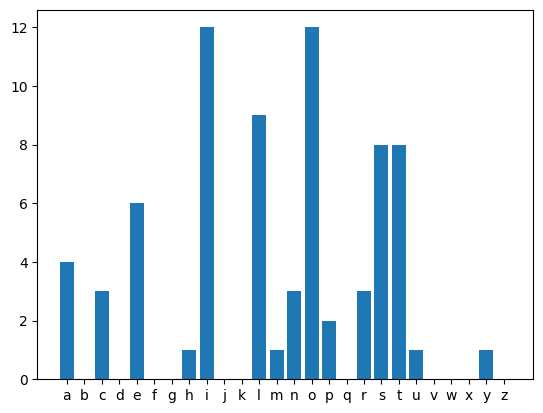

Length: 22, Position: 15


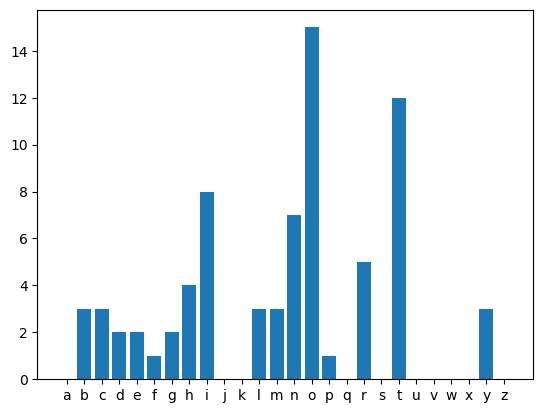

Length: 22, Position: 16


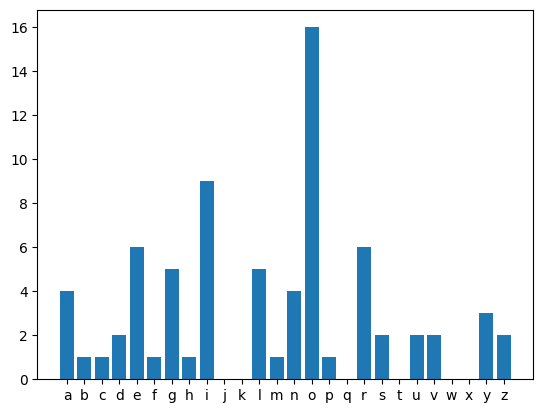

Length: 22, Position: 17


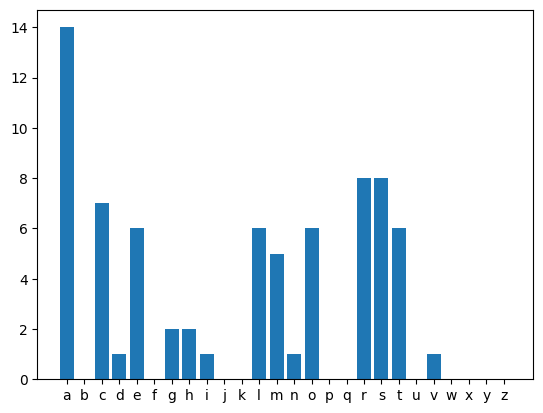

Length: 22, Position: 18


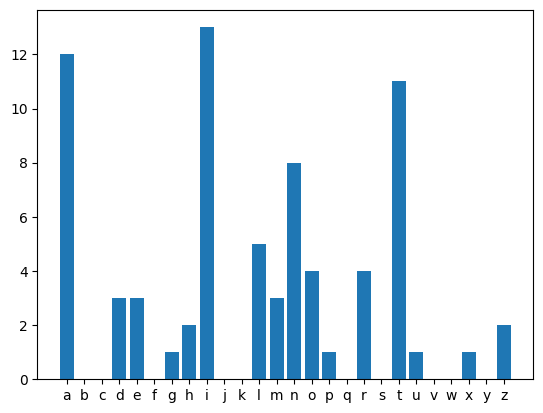

Length: 22, Position: 19


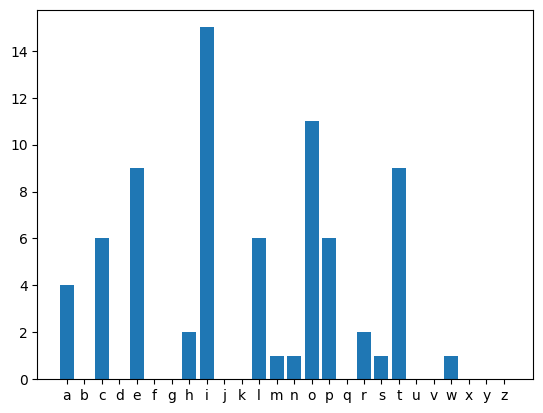

Length: 22, Position: 20


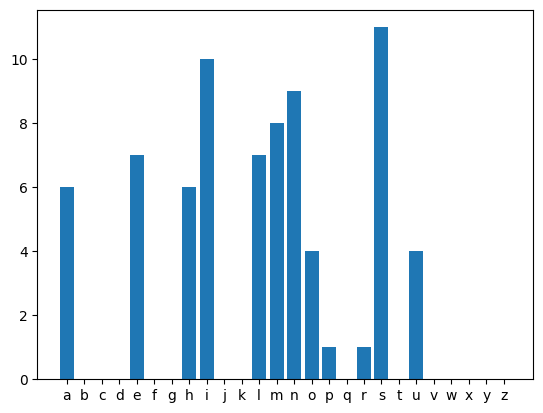

Length: 22, Position: 21


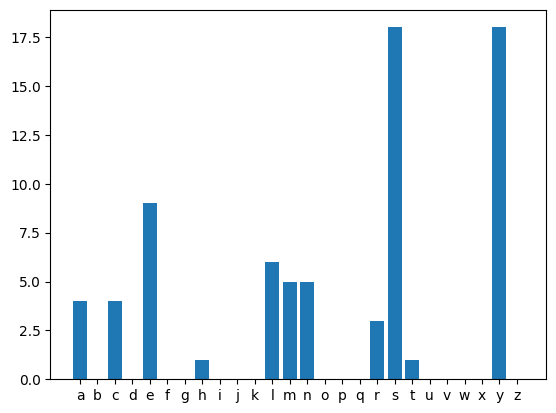

Length: 23, Position: 0


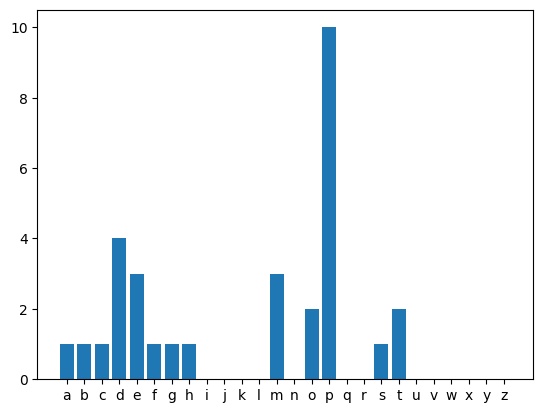

Length: 23, Position: 1


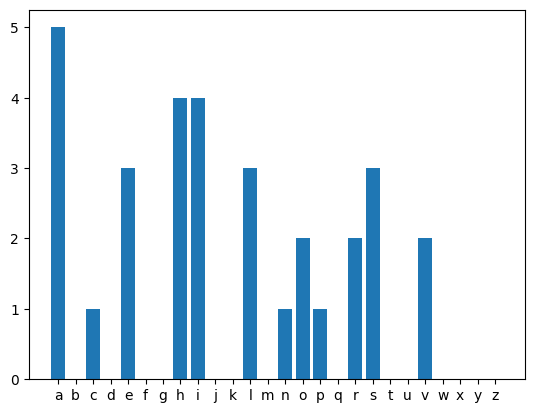

Length: 23, Position: 2


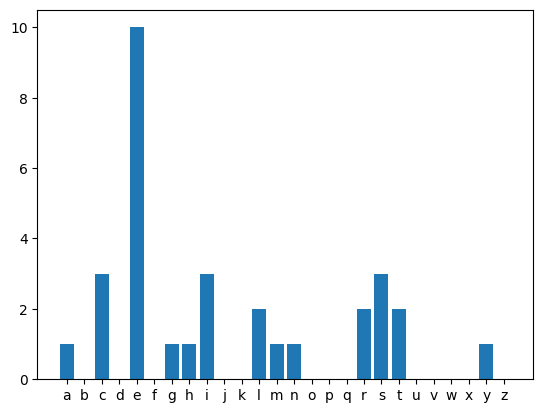

Length: 23, Position: 3


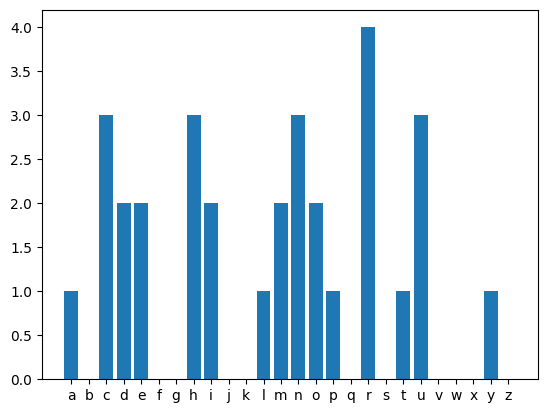

Length: 23, Position: 4


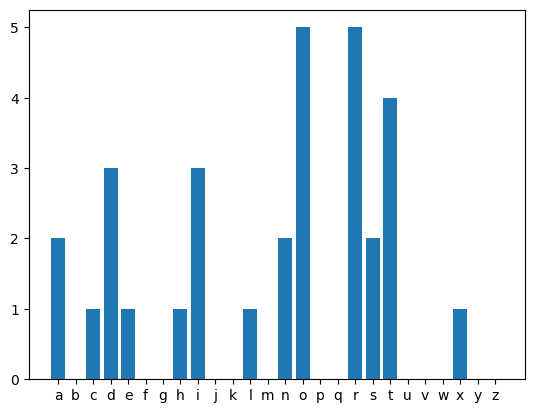

Length: 23, Position: 5


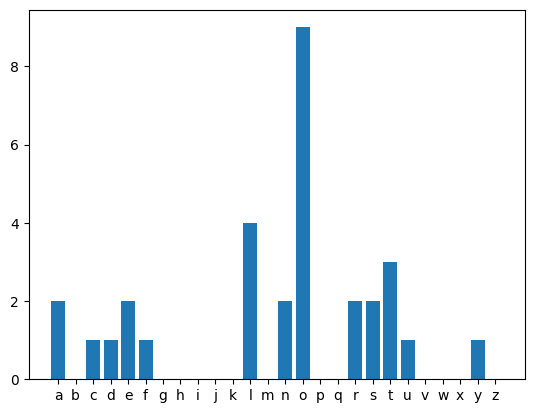

Length: 23, Position: 6


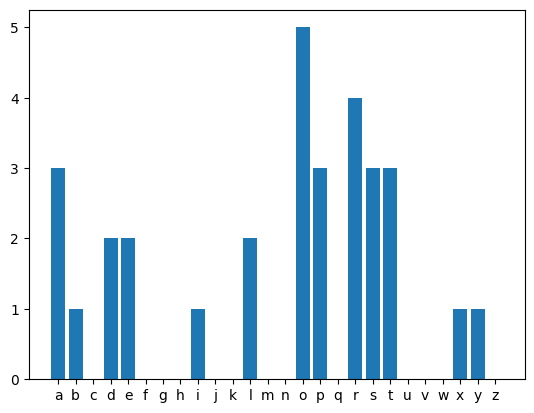

Length: 23, Position: 7


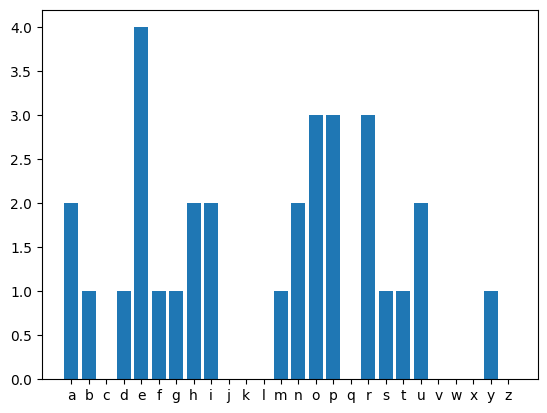

Length: 23, Position: 8


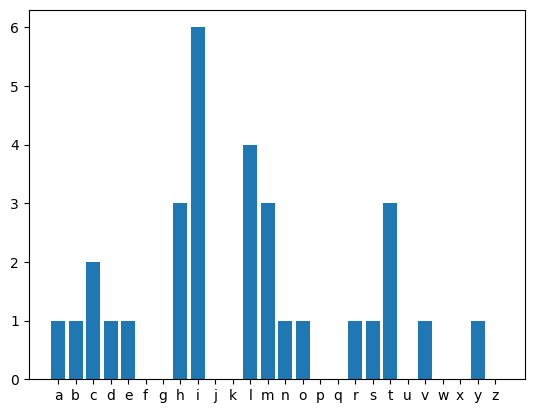

Length: 23, Position: 9


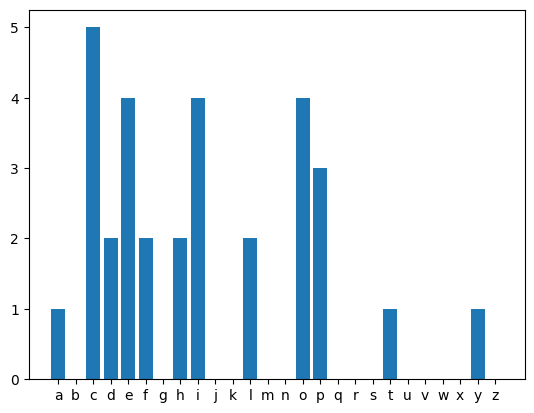

Length: 23, Position: 10


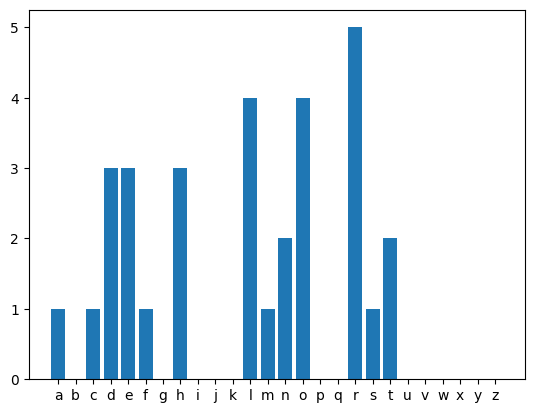

Length: 23, Position: 11


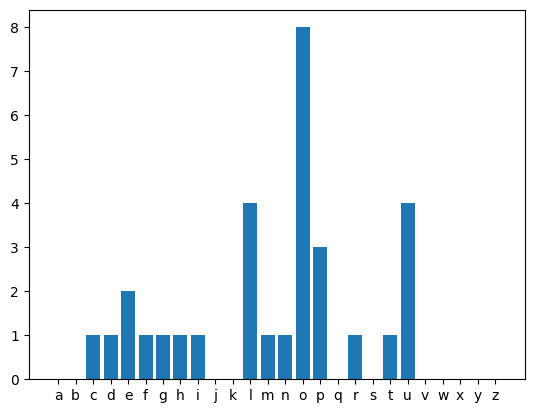

Length: 23, Position: 12


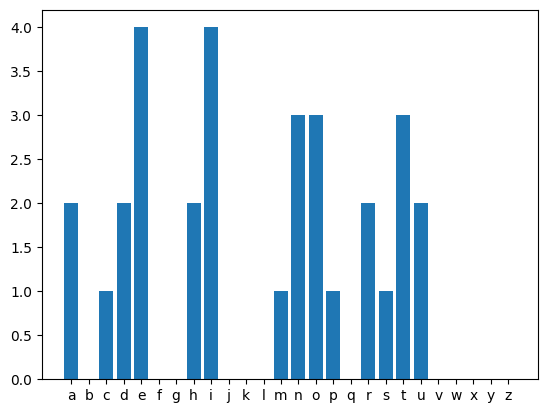

Length: 23, Position: 13


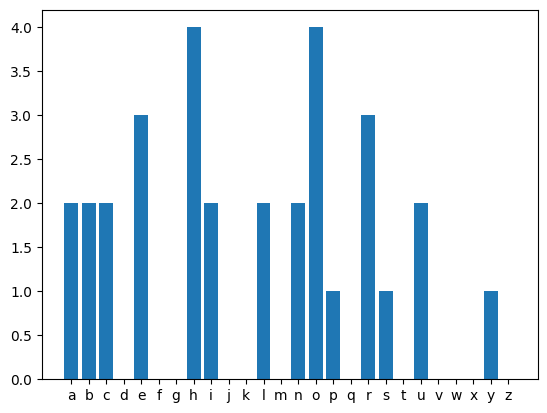

Length: 23, Position: 14


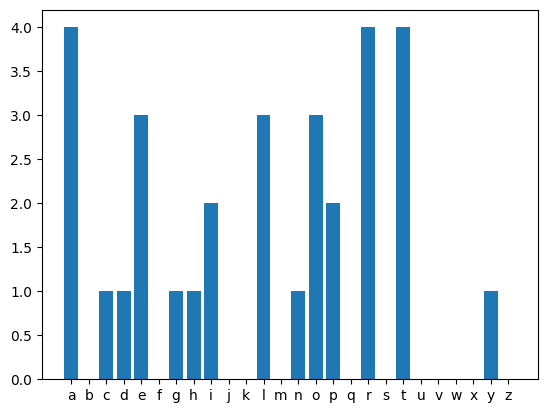

Length: 23, Position: 15


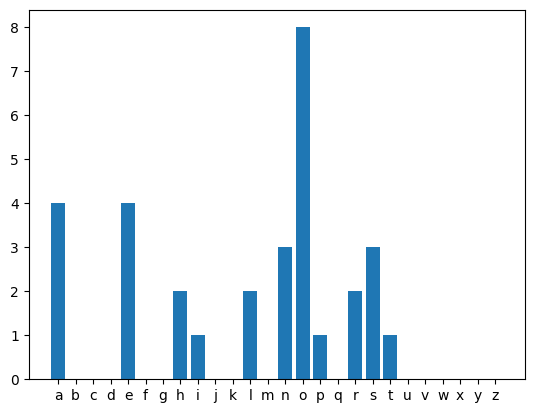

Length: 23, Position: 16


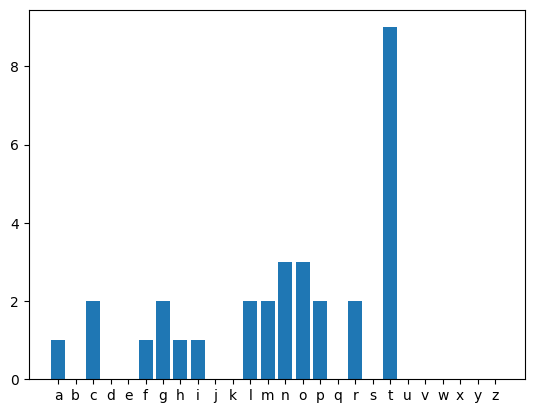

Length: 23, Position: 17


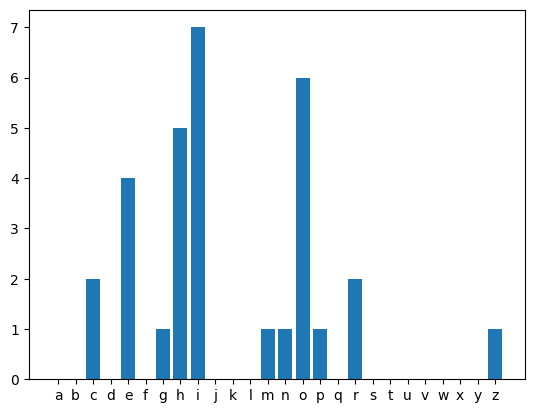

Length: 23, Position: 18


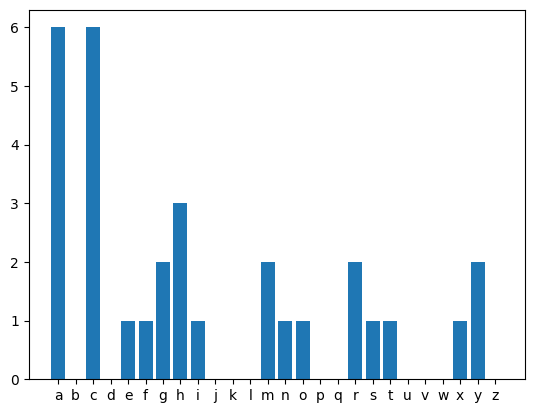

Length: 23, Position: 19


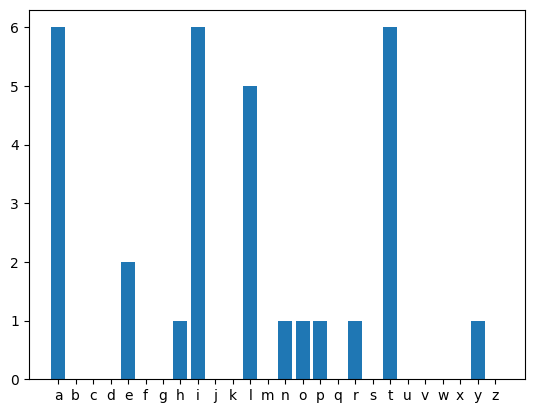

Length: 23, Position: 20


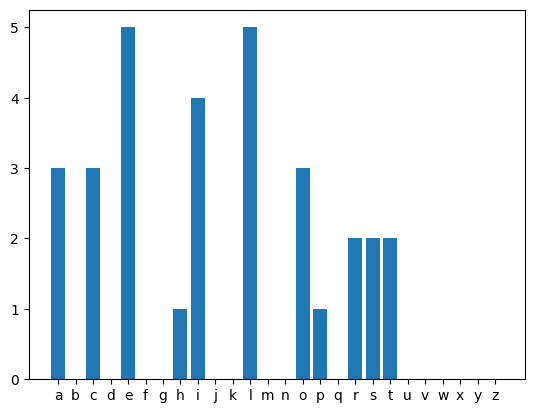

Length: 23, Position: 21


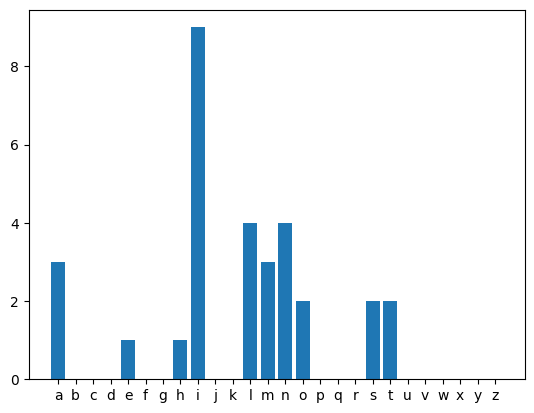

Length: 23, Position: 22


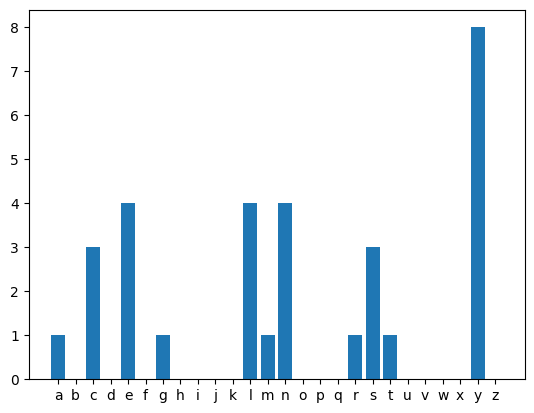

Length: 24, Position: 0


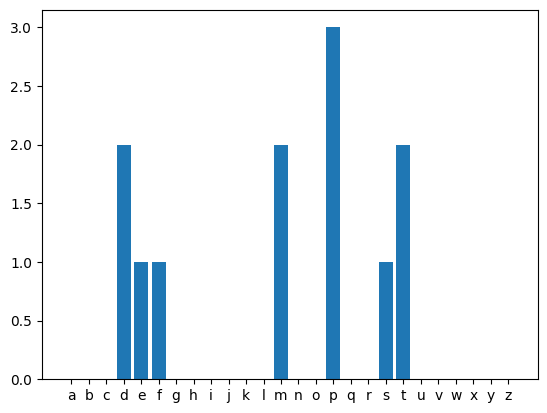

Length: 24, Position: 1


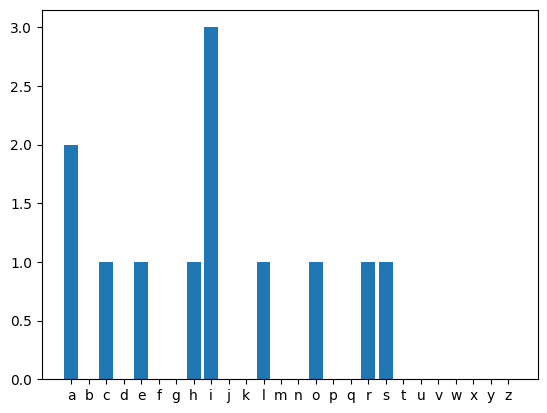

Length: 24, Position: 2


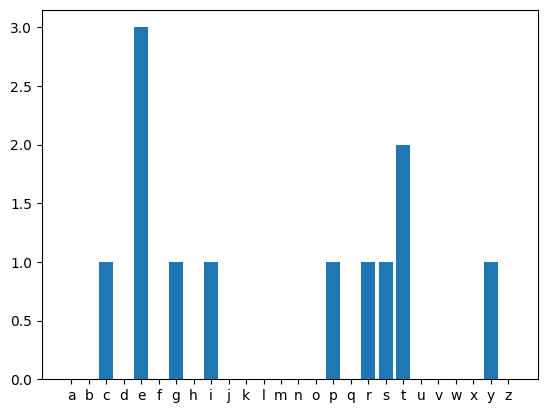

Length: 24, Position: 3


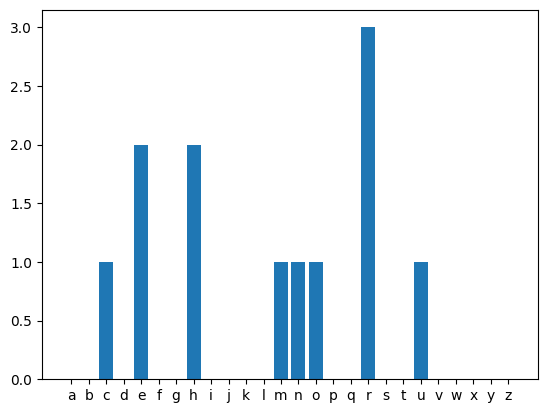

Length: 24, Position: 4


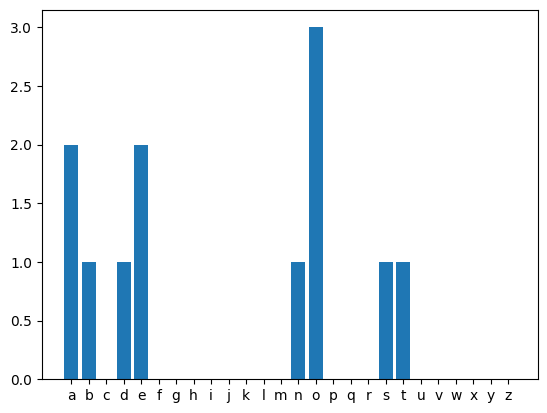

Length: 24, Position: 5


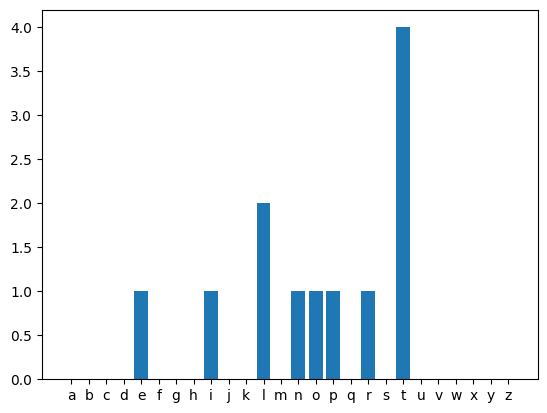

Length: 24, Position: 6


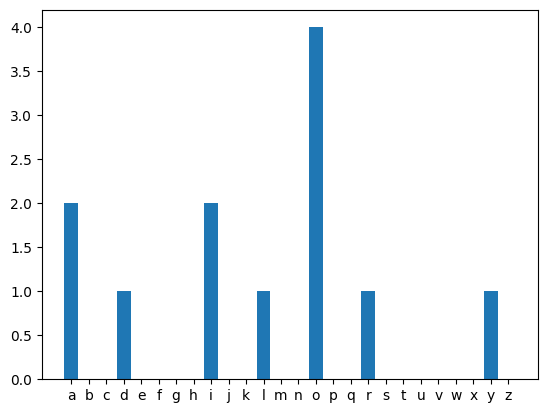

Length: 24, Position: 7


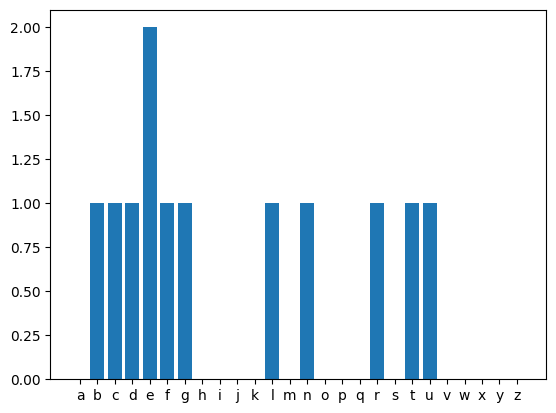

Length: 24, Position: 8


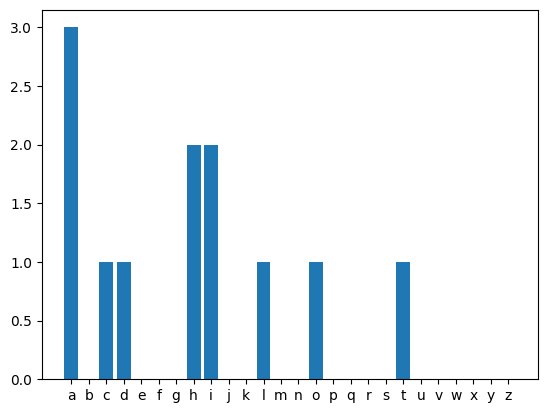

Length: 24, Position: 9


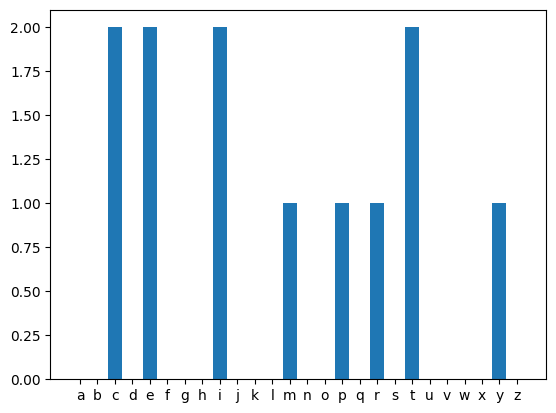

Length: 24, Position: 10


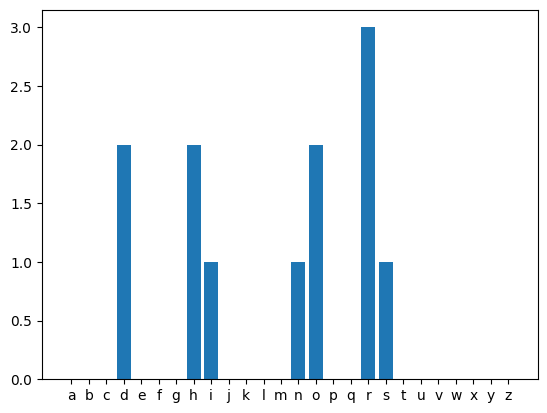

Length: 24, Position: 11


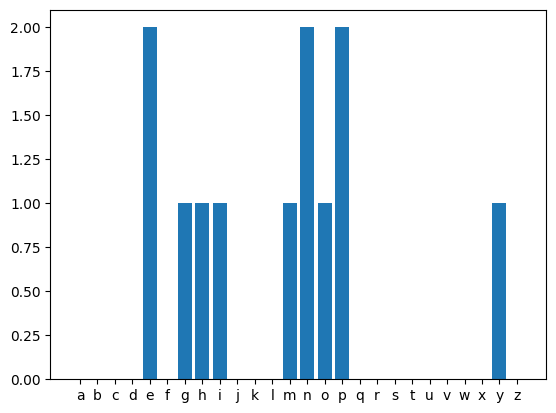

Length: 24, Position: 12


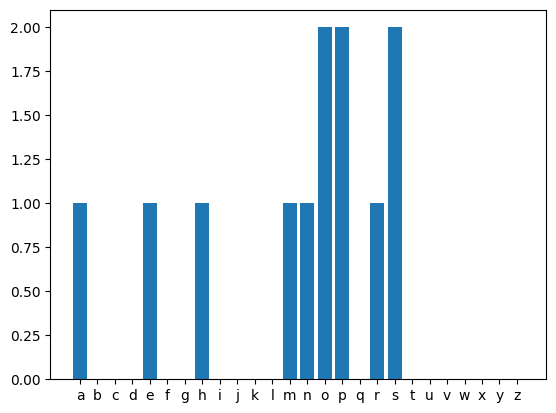

Length: 24, Position: 13


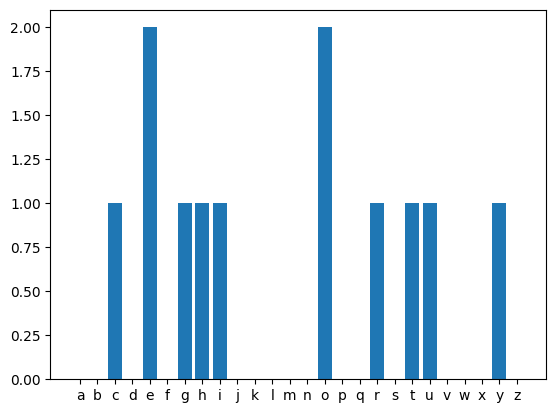

Length: 24, Position: 14


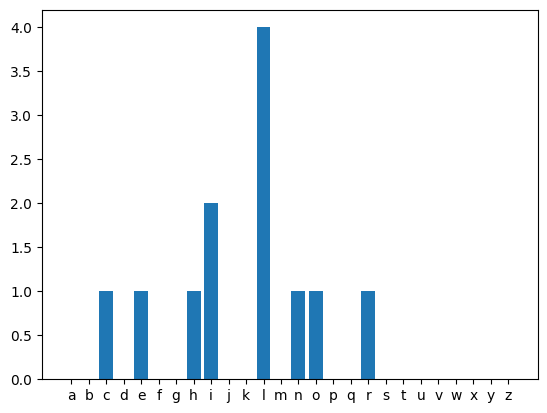

Length: 24, Position: 15


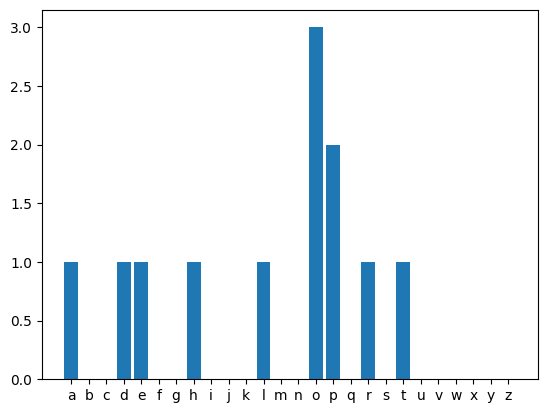

Length: 24, Position: 16


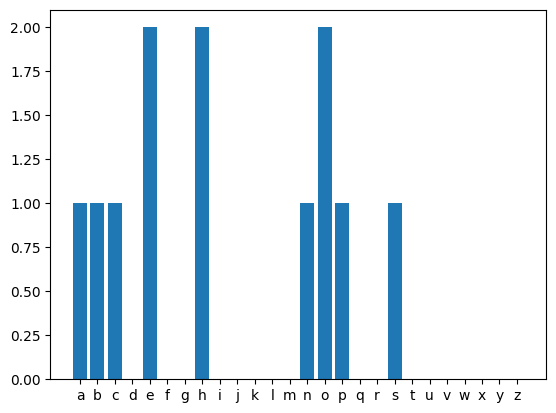

Length: 24, Position: 17


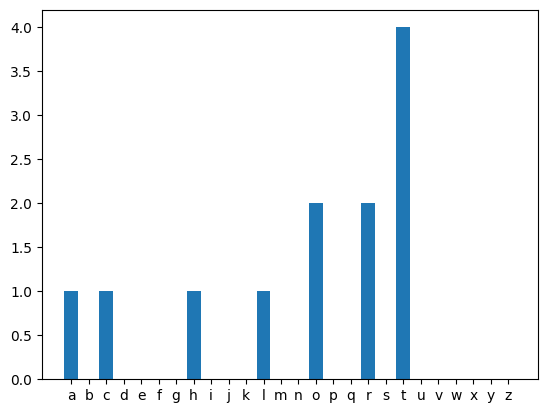

Length: 24, Position: 18


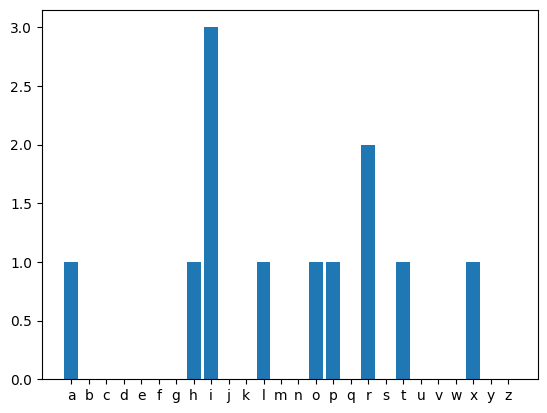

Length: 24, Position: 19


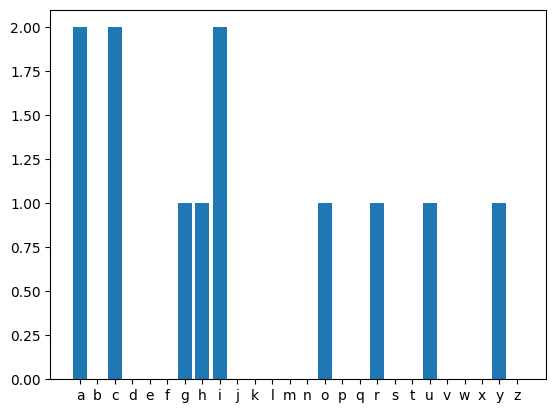

Length: 24, Position: 20


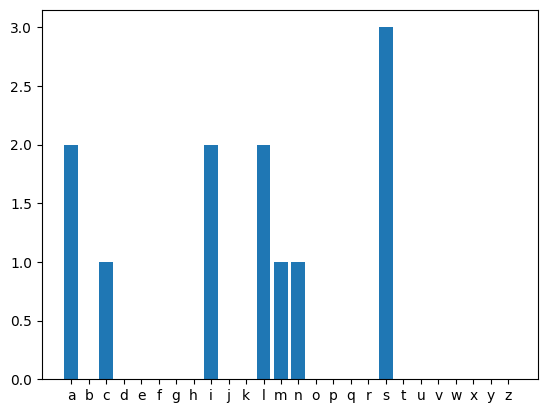

Length: 24, Position: 21


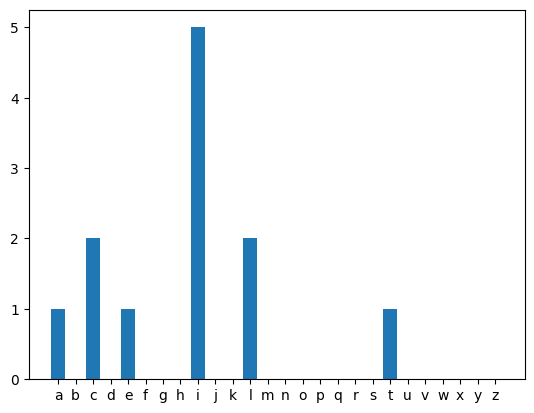

Length: 24, Position: 22


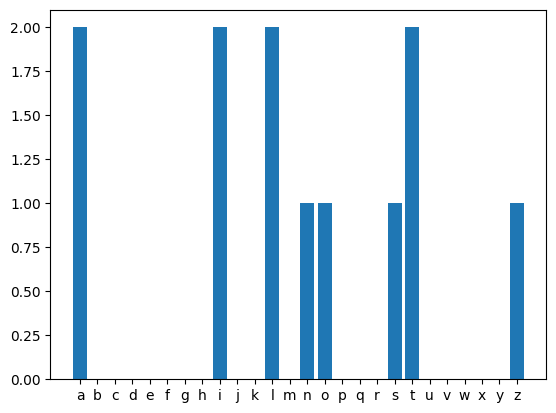

Length: 24, Position: 23


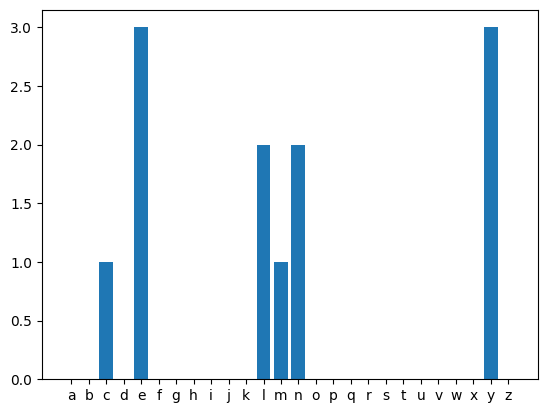

Length: 25, Position: 0


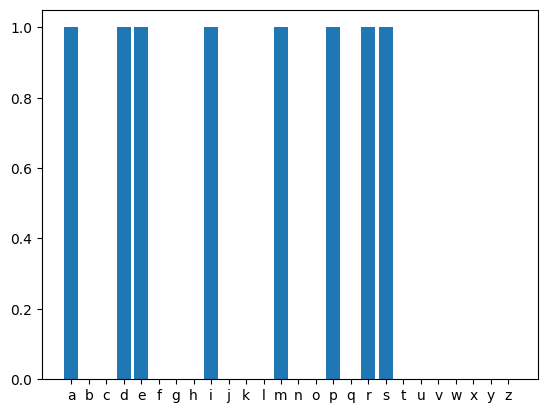

Length: 25, Position: 1


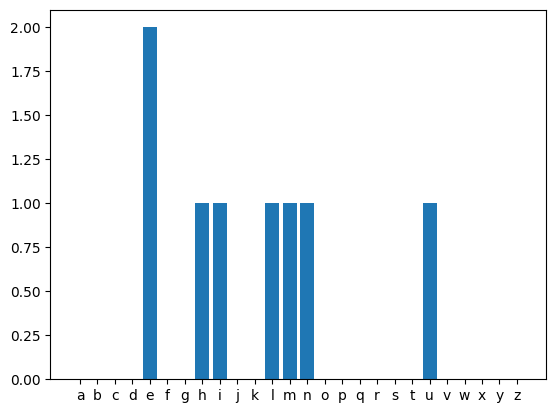

Length: 25, Position: 2


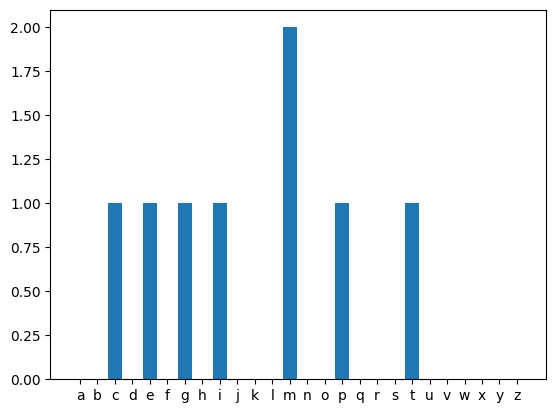

Length: 25, Position: 3


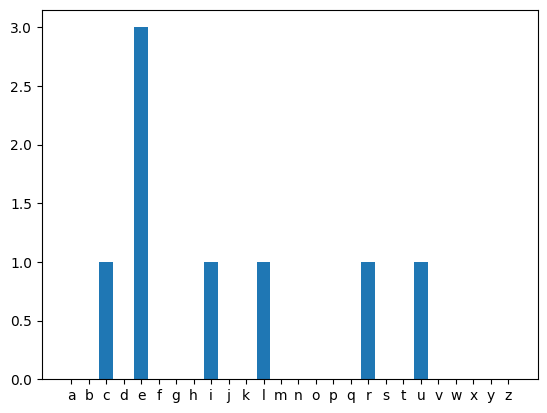

Length: 25, Position: 4


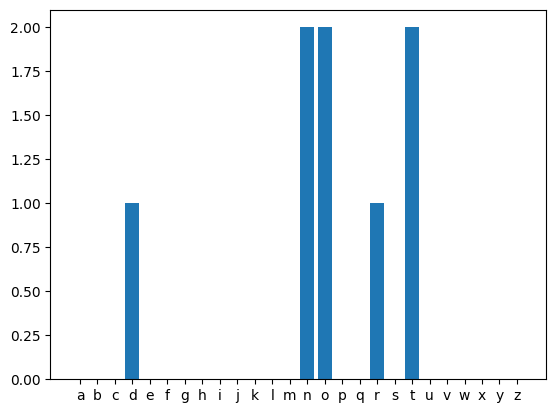

Length: 25, Position: 5


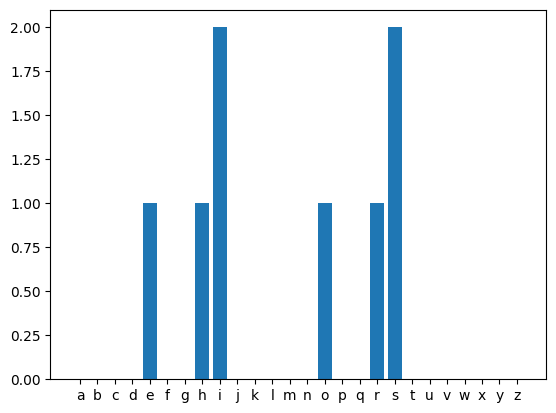

Length: 25, Position: 6


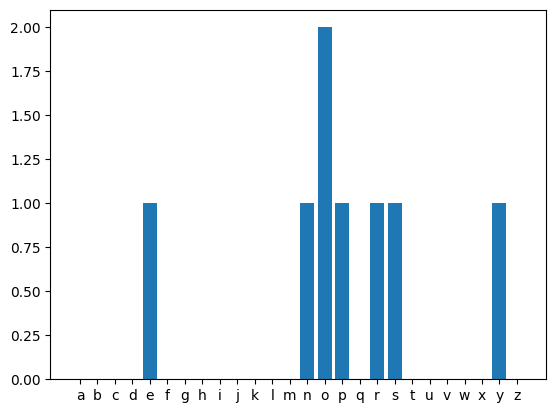

Length: 25, Position: 7


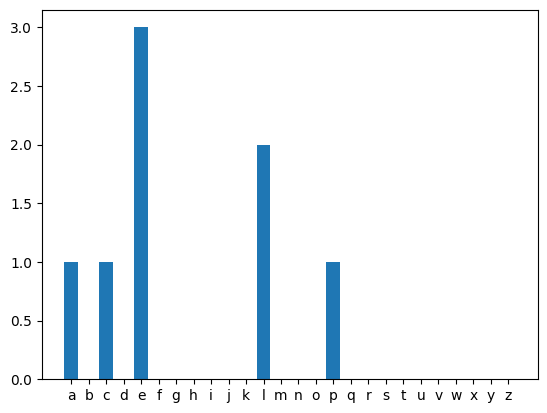

Length: 25, Position: 8


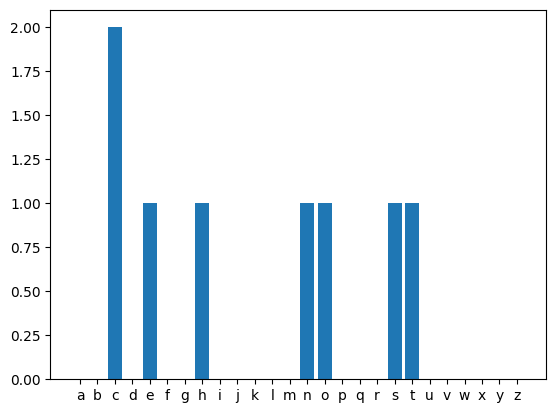

Length: 25, Position: 9


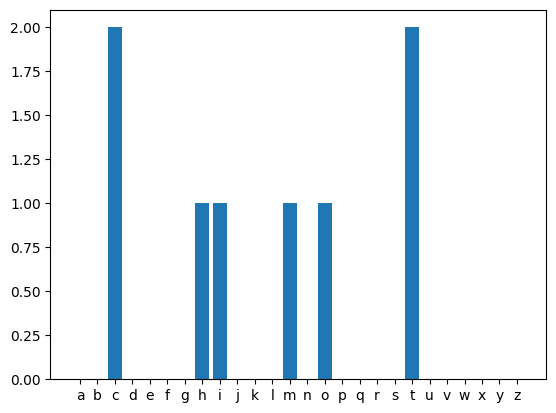

Length: 25, Position: 10


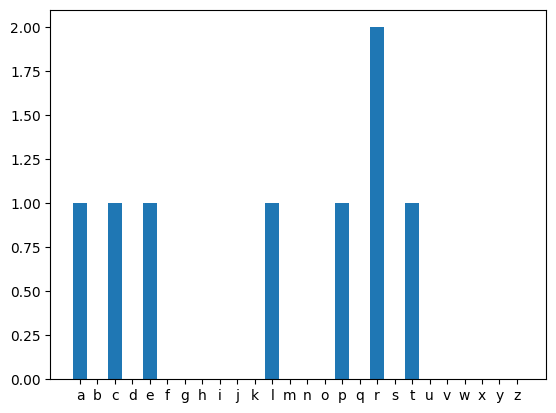

Length: 25, Position: 11


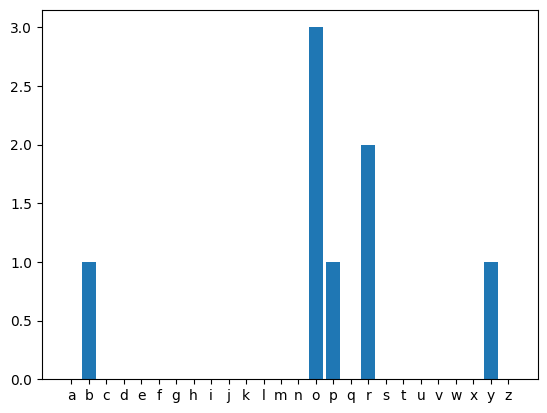

Length: 25, Position: 12


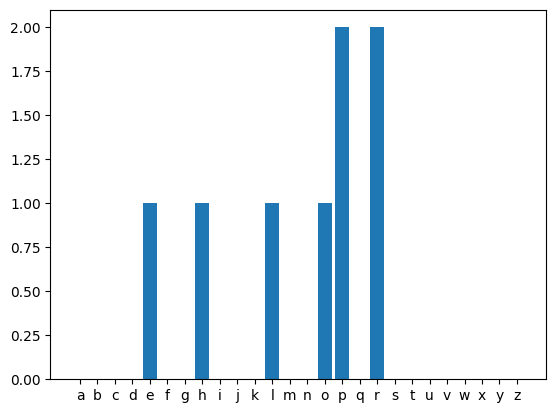

Length: 25, Position: 13


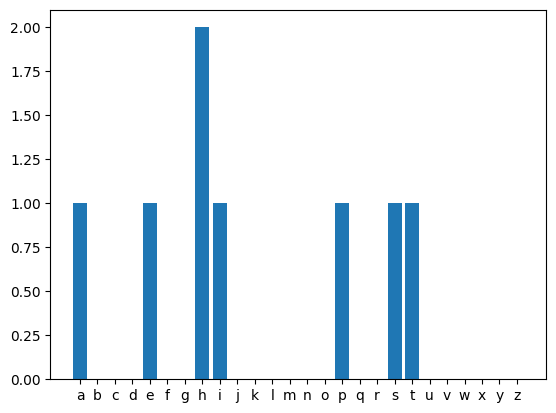

Length: 25, Position: 14


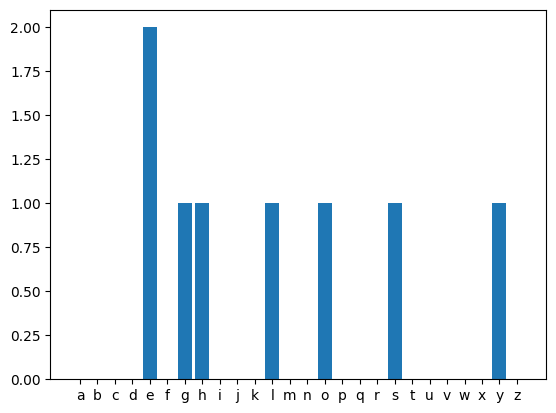

Length: 25, Position: 15


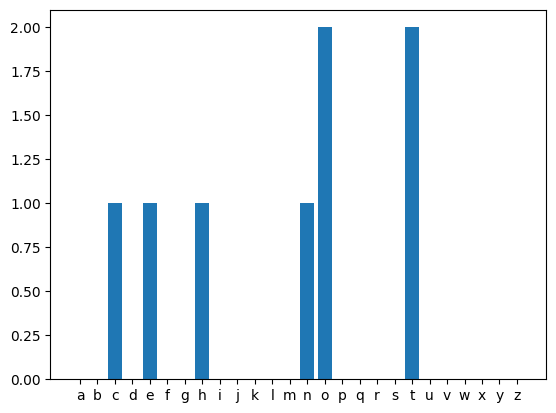

Length: 25, Position: 16


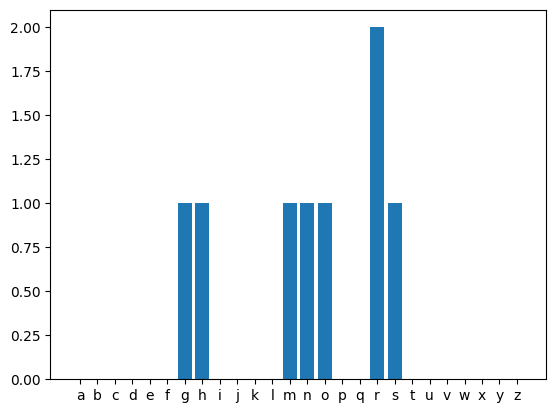

Length: 25, Position: 17


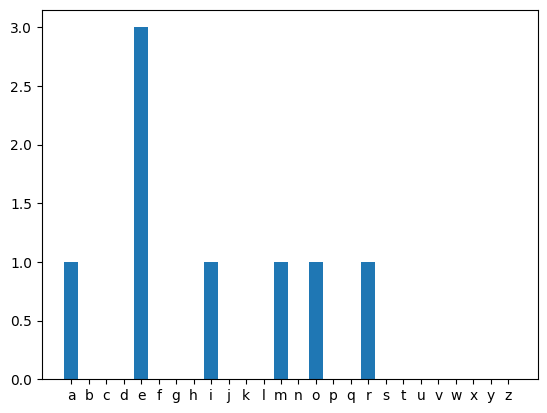

Length: 25, Position: 18


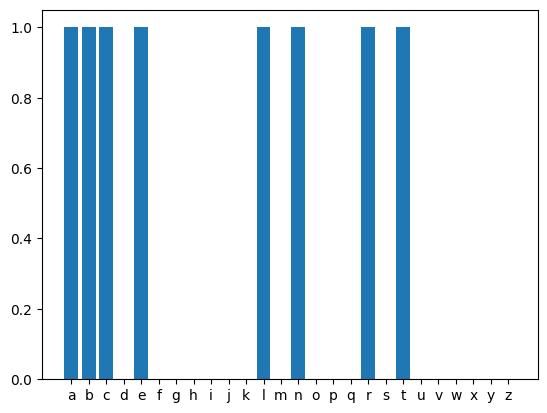

Length: 25, Position: 19


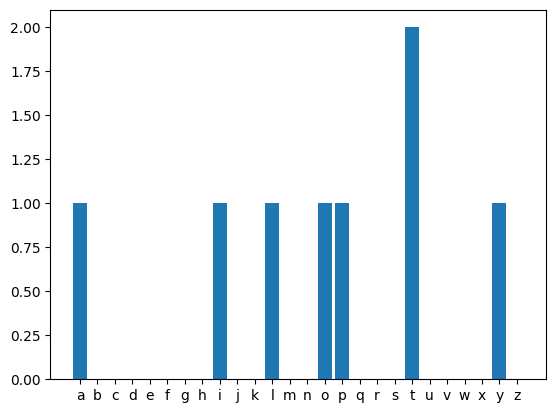

Length: 25, Position: 20


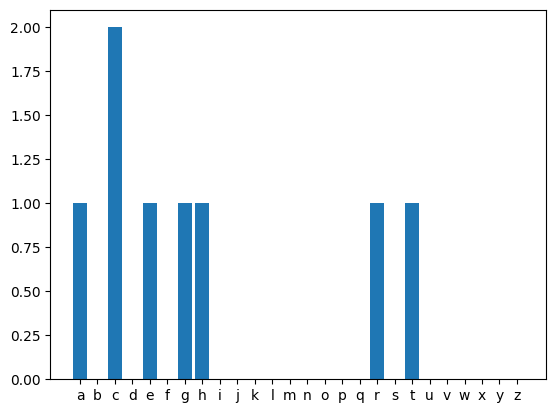

Length: 25, Position: 21


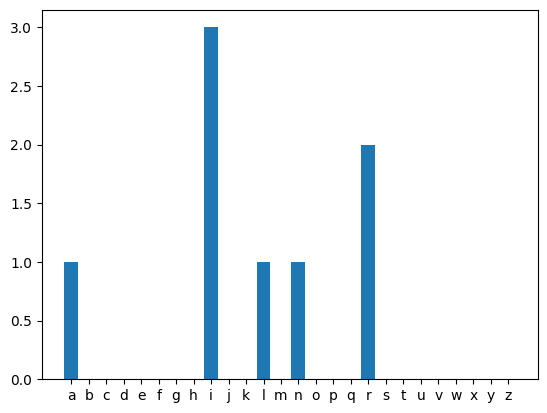

Length: 25, Position: 22


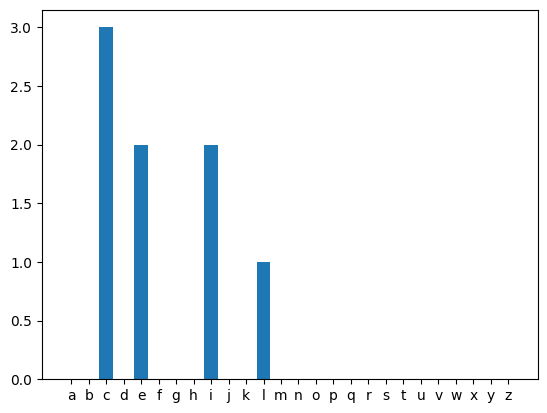

Length: 25, Position: 23


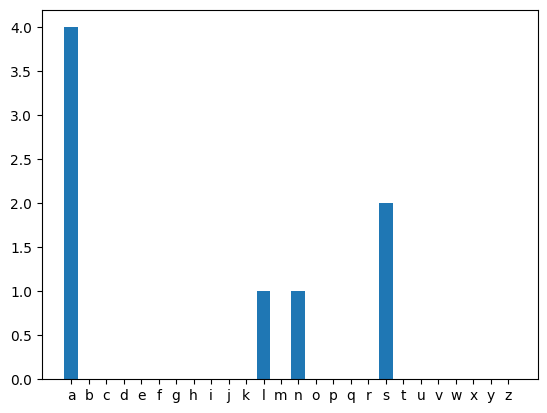

Length: 25, Position: 24


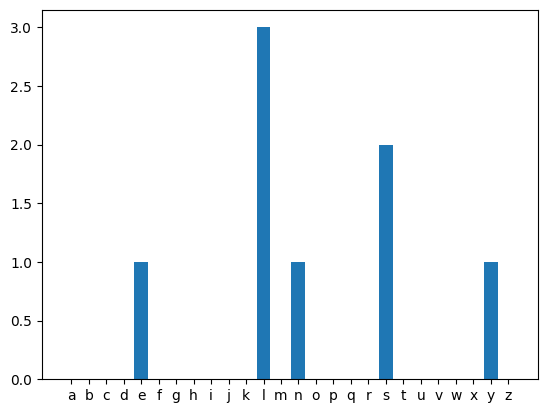

Length: 26, Position: 0


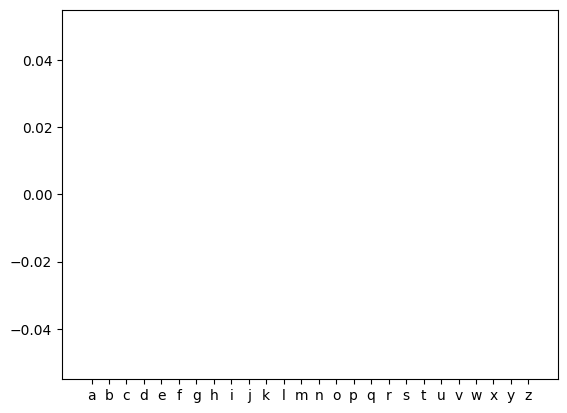

Length: 26, Position: 1


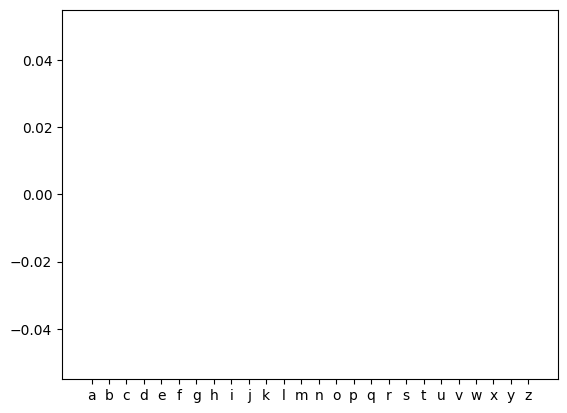

Length: 26, Position: 2


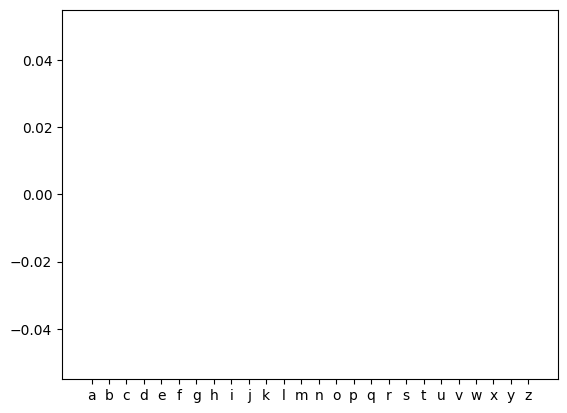

Length: 26, Position: 3


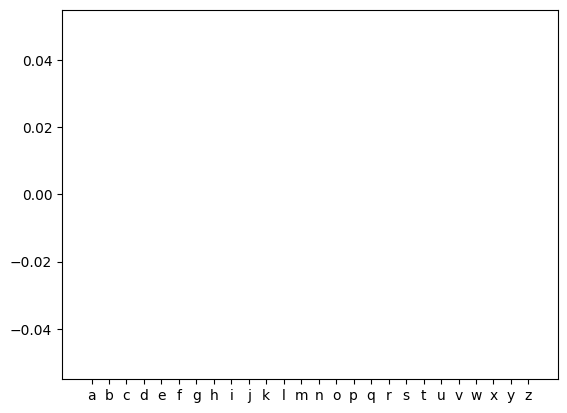

Length: 26, Position: 4


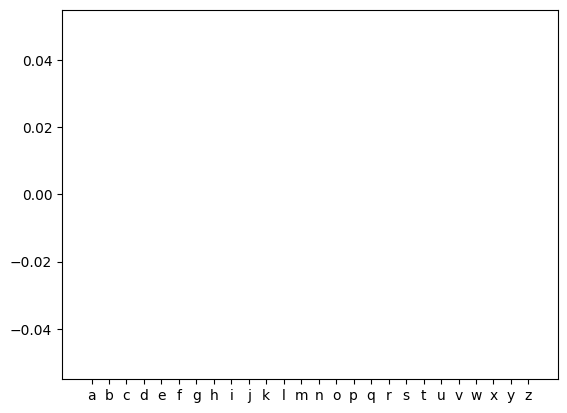

Length: 26, Position: 5


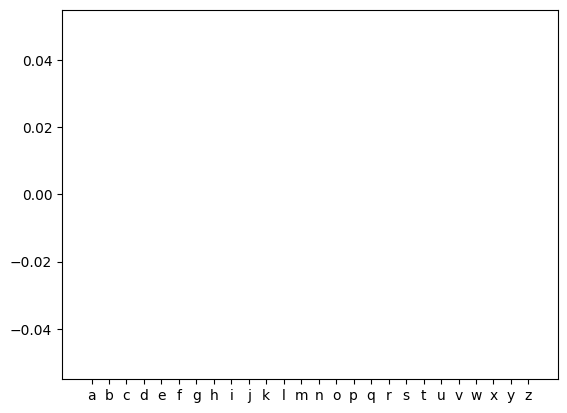

Length: 26, Position: 6


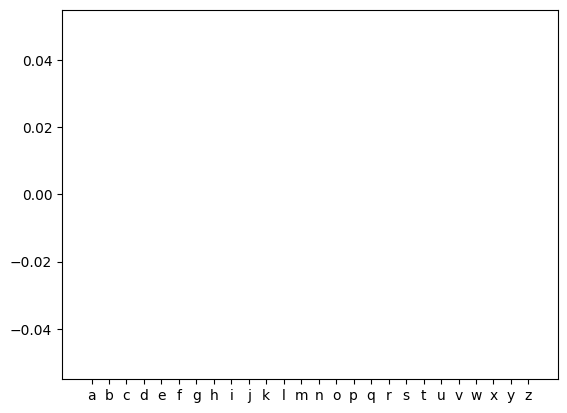

Length: 26, Position: 7


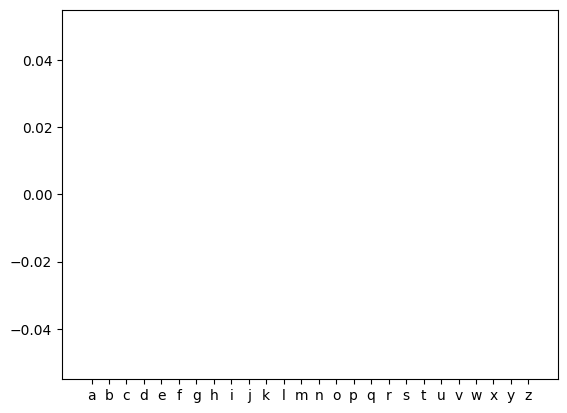

Length: 26, Position: 8


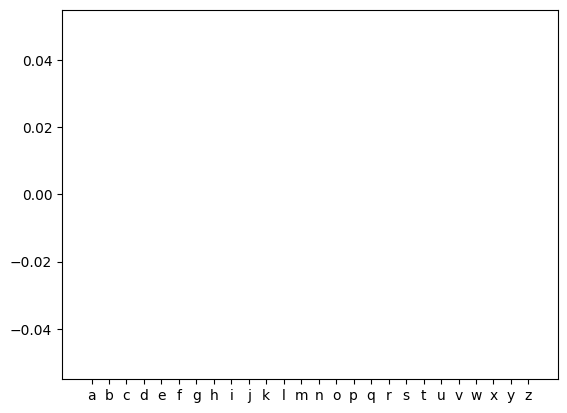

Length: 26, Position: 9


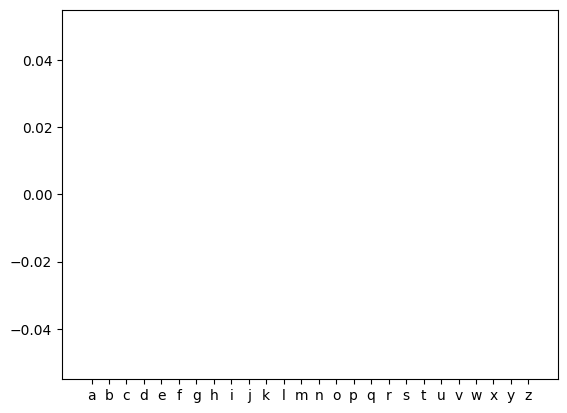

Length: 26, Position: 10


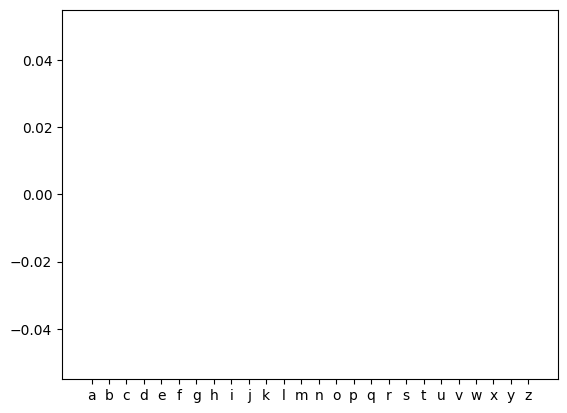

Length: 26, Position: 11


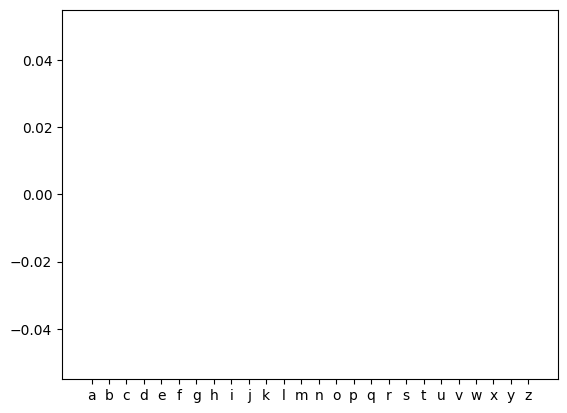

Length: 26, Position: 12


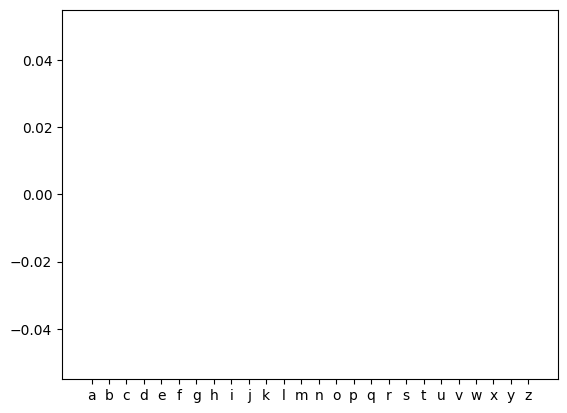

Length: 26, Position: 13


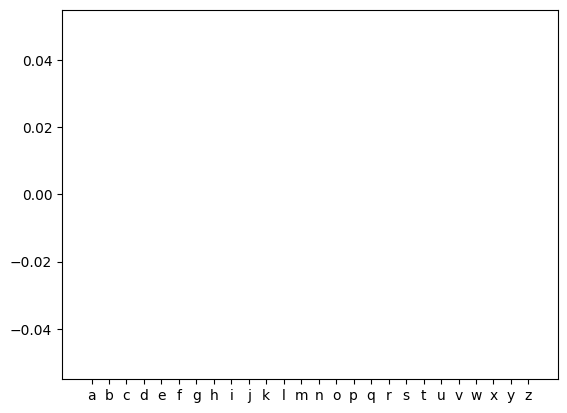

Length: 26, Position: 14


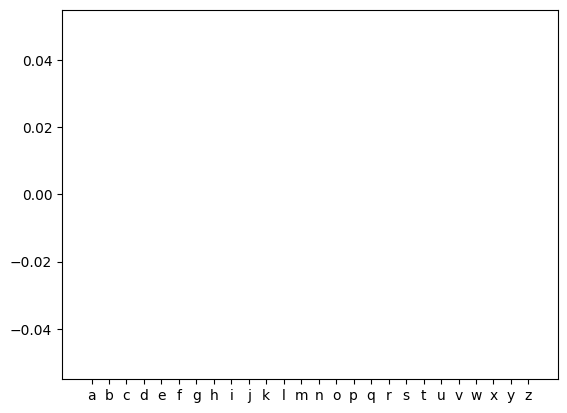

Length: 26, Position: 15


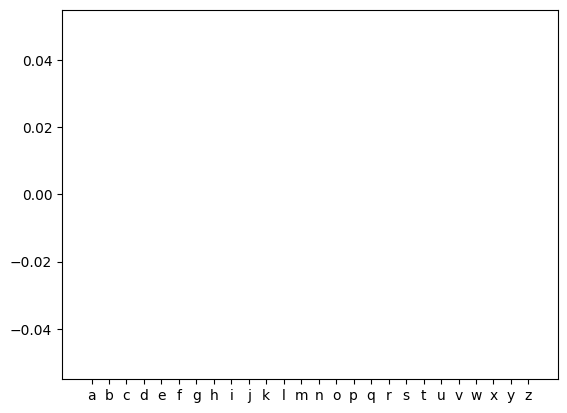

Length: 26, Position: 16


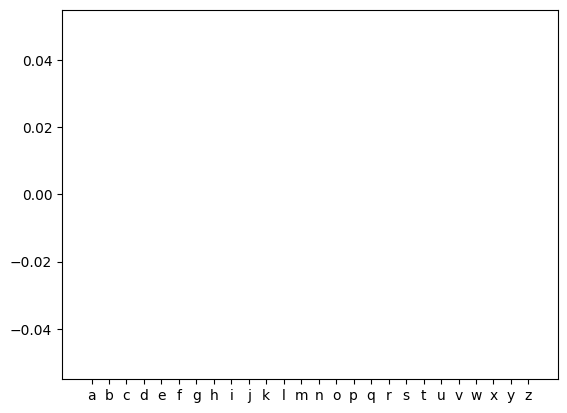

Length: 26, Position: 17


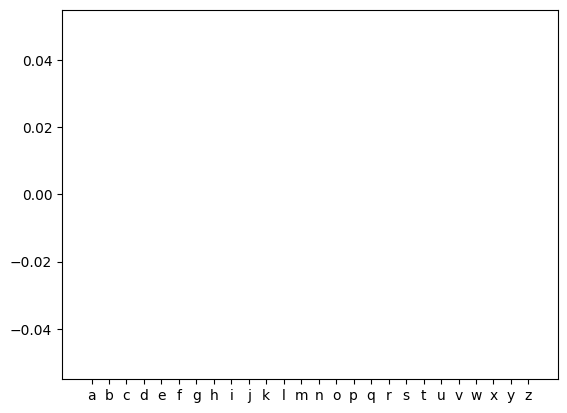

Length: 26, Position: 18


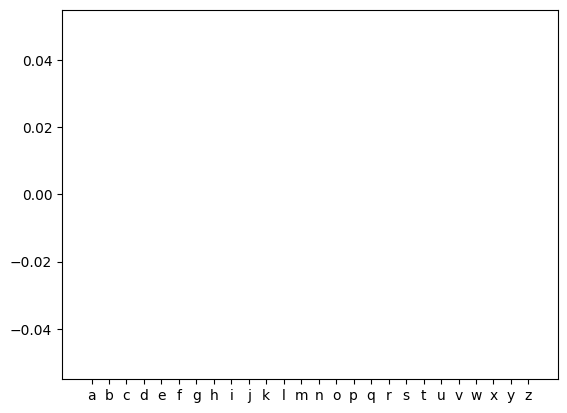

Length: 26, Position: 19


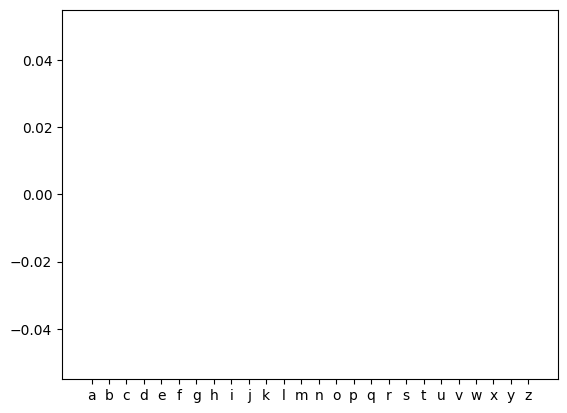

Length: 26, Position: 20


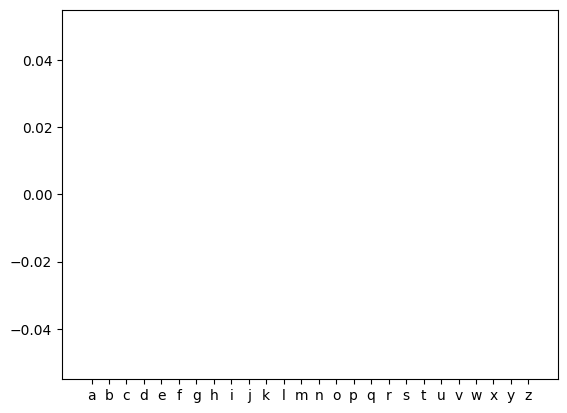

Length: 26, Position: 21


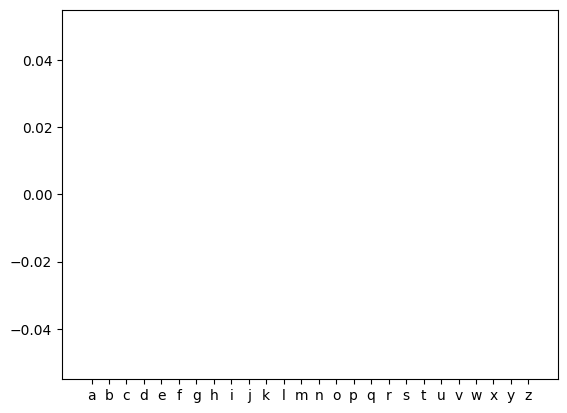

Length: 26, Position: 22


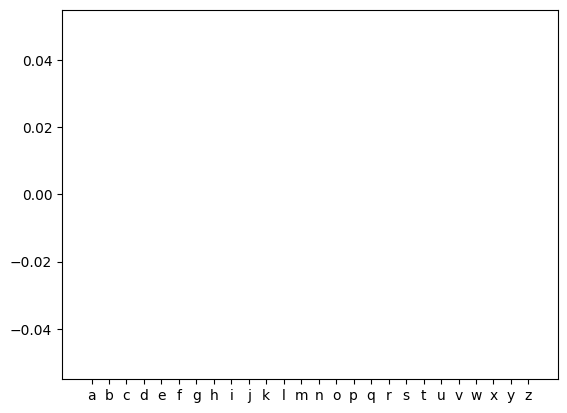

Length: 26, Position: 23


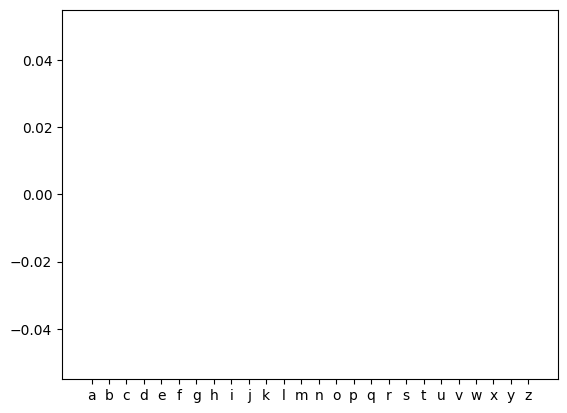

Length: 26, Position: 24


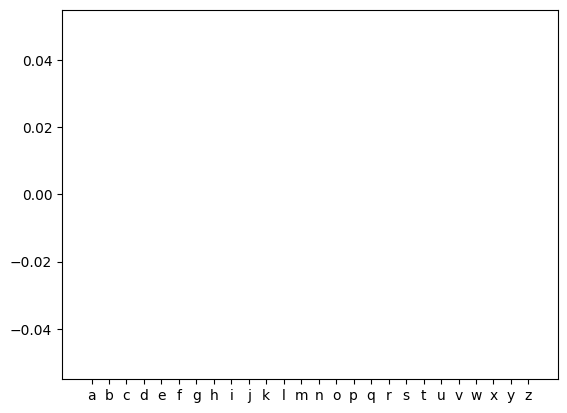

Length: 26, Position: 25


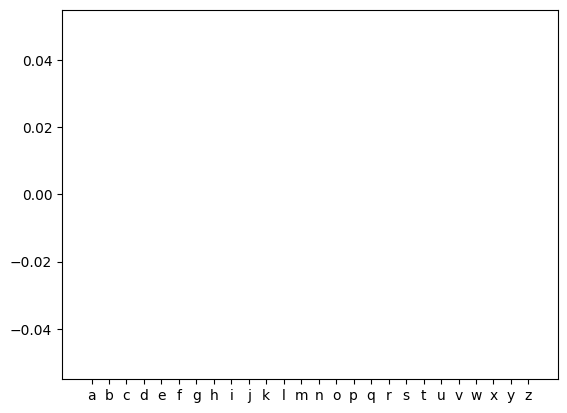

Length: 27, Position: 0


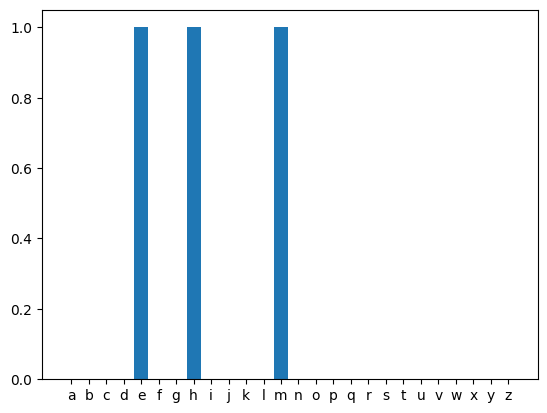

Length: 27, Position: 1


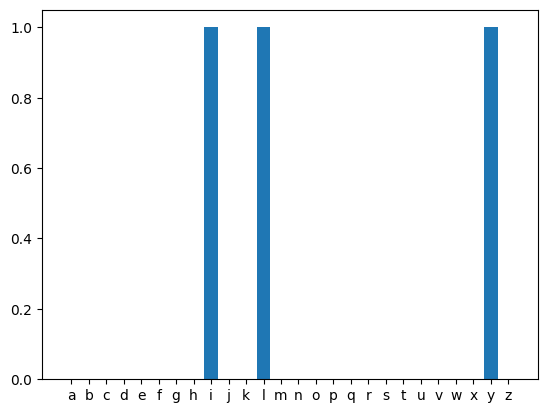

Length: 27, Position: 2


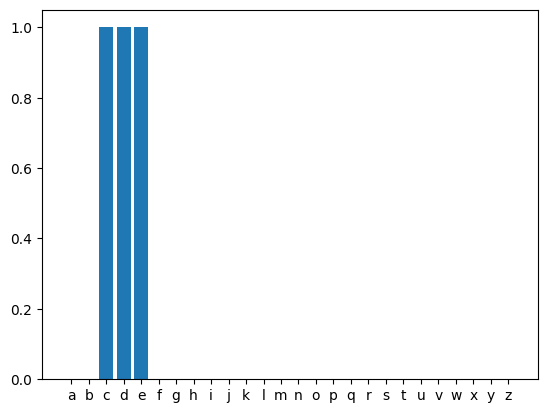

Length: 27, Position: 3


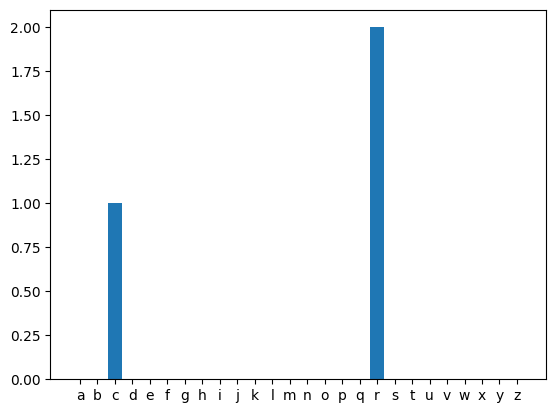

Length: 27, Position: 4


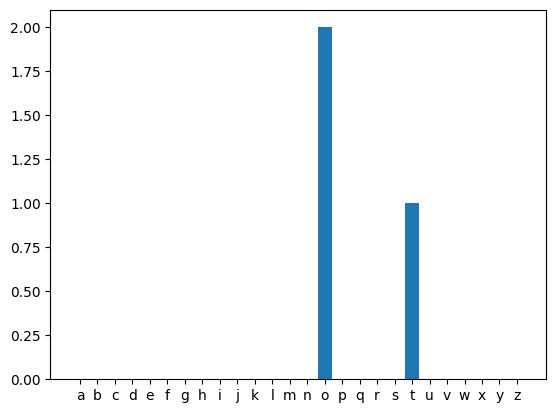

Length: 27, Position: 5


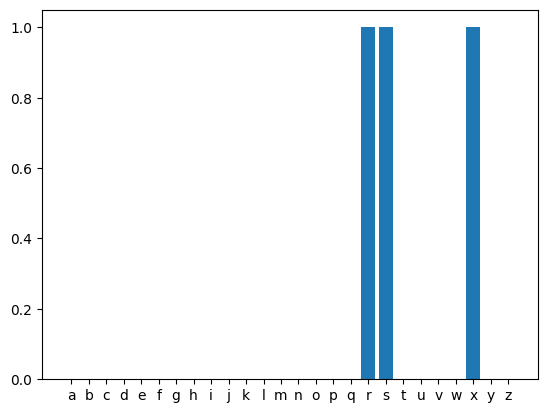

Length: 27, Position: 6


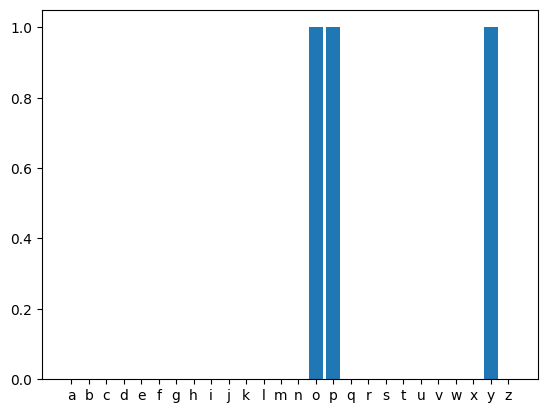

Length: 27, Position: 7


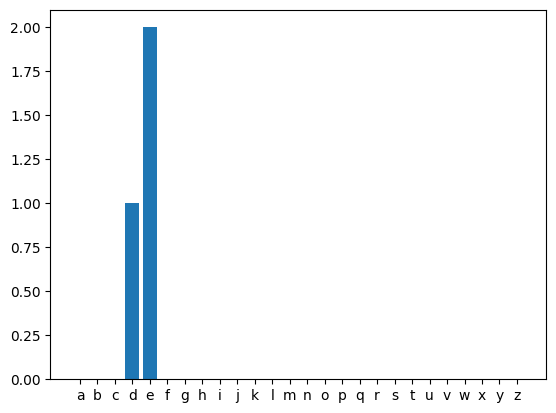

Length: 27, Position: 8


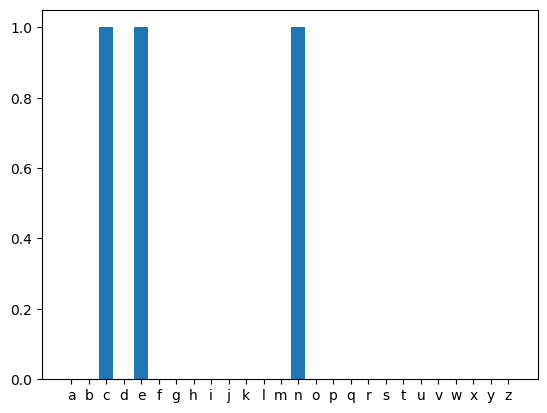

Length: 27, Position: 9


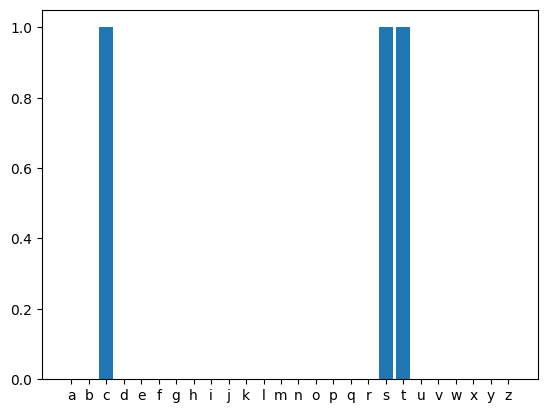

Length: 27, Position: 10


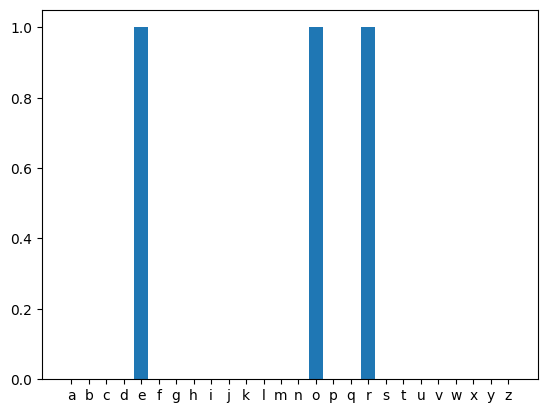

Length: 27, Position: 11


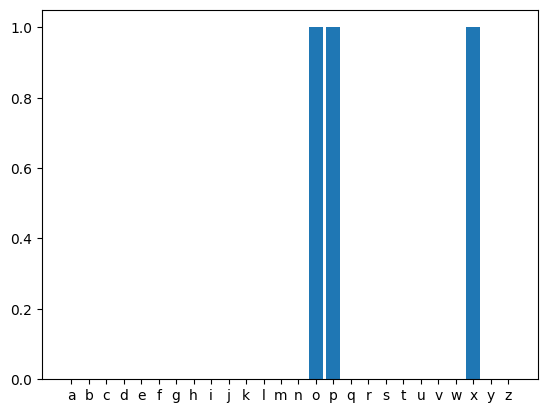

Length: 27, Position: 12


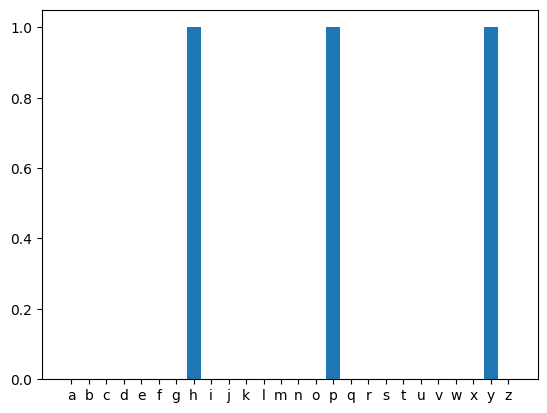

Length: 27, Position: 13


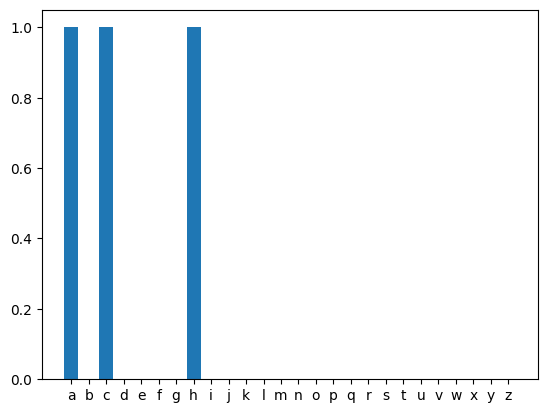

Length: 27, Position: 14


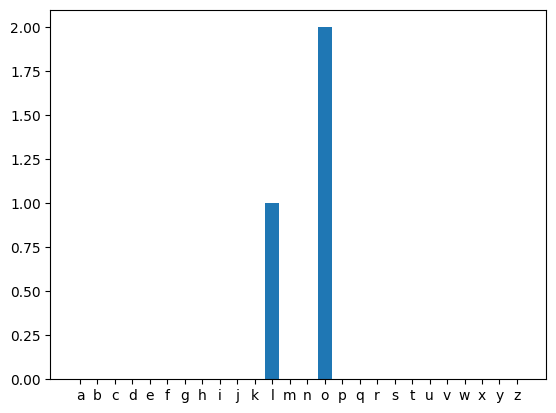

Length: 27, Position: 15


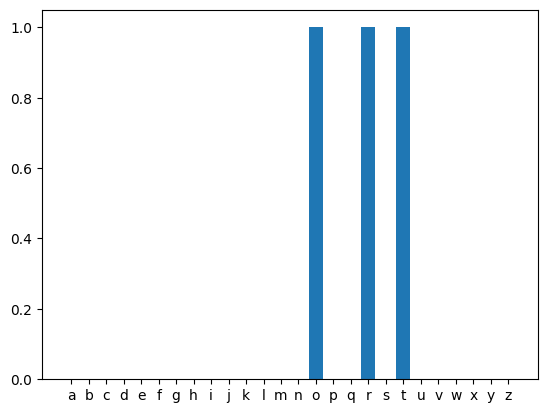

Length: 27, Position: 16


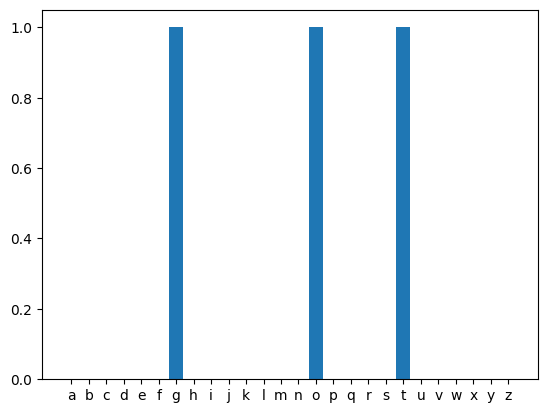

Length: 27, Position: 17


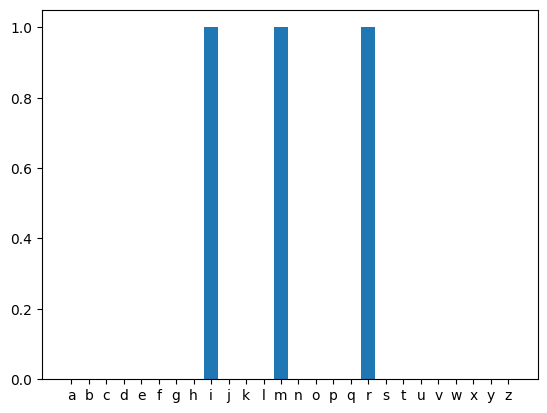

Length: 27, Position: 18


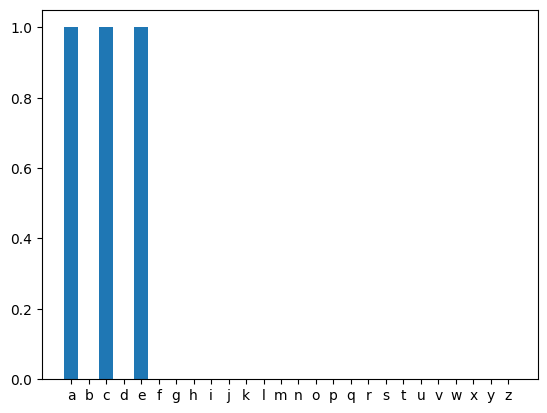

Length: 27, Position: 19


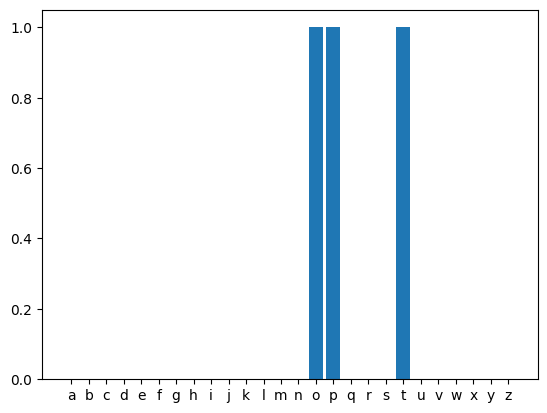

Length: 27, Position: 20


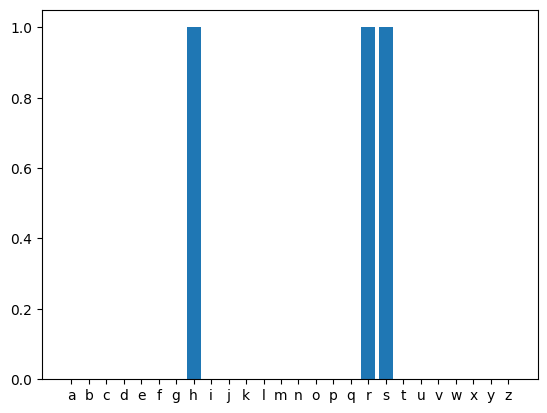

Length: 27, Position: 21


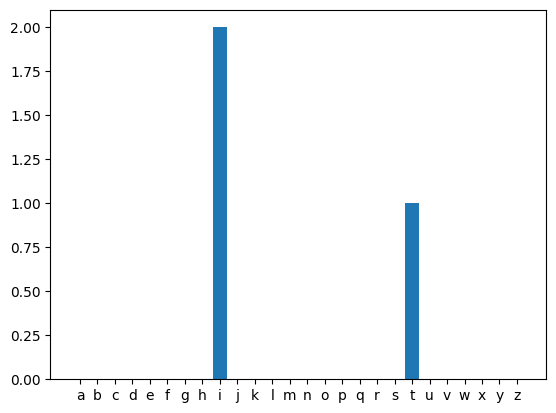

Length: 27, Position: 22


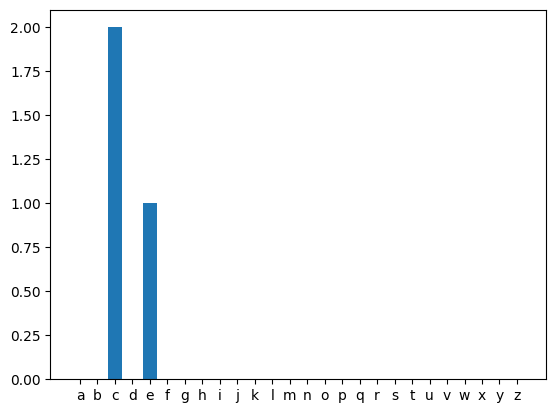

Length: 27, Position: 23


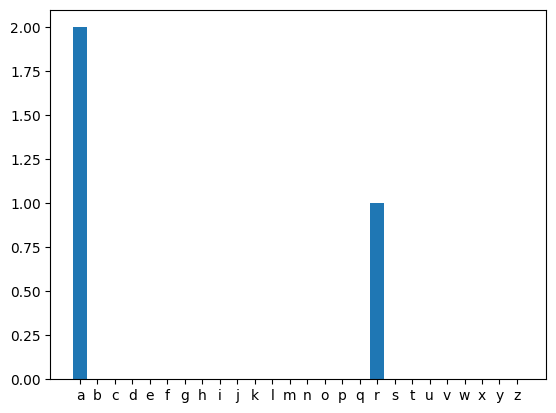

Length: 27, Position: 24


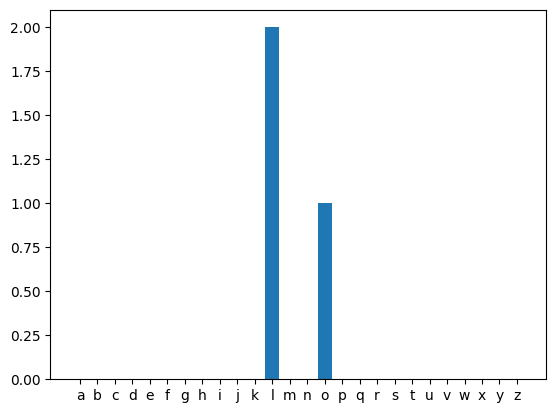

Length: 27, Position: 25


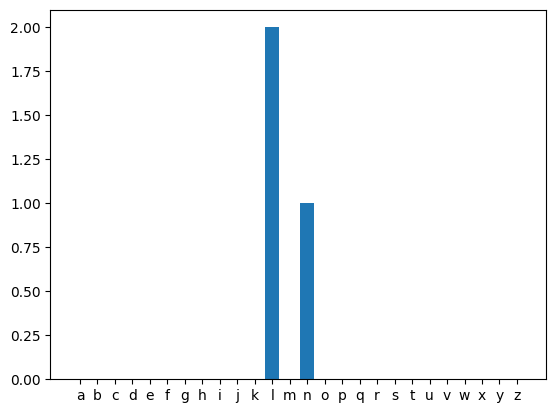

Length: 27, Position: 26


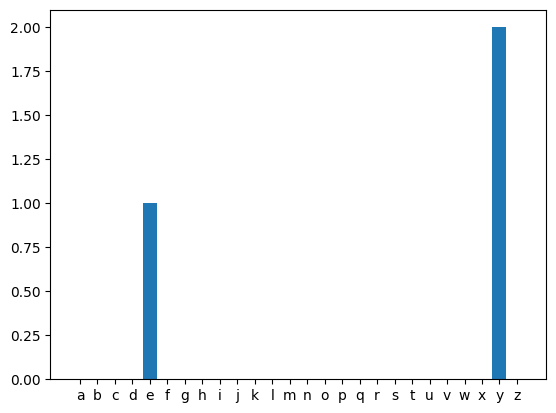

Length: 28, Position: 0


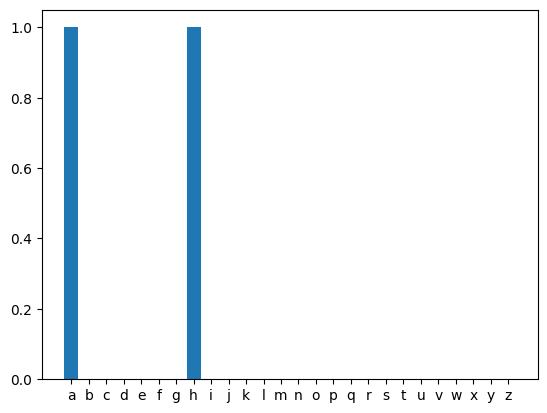

Length: 28, Position: 1


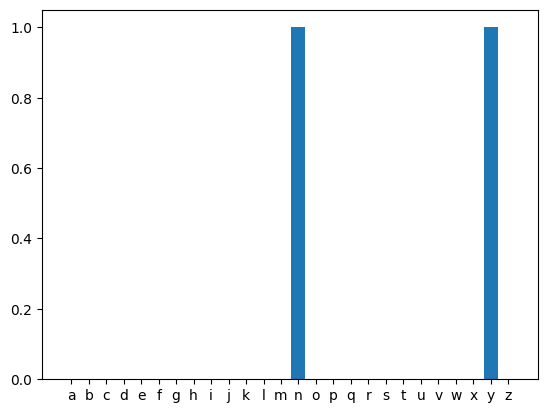

Length: 28, Position: 2


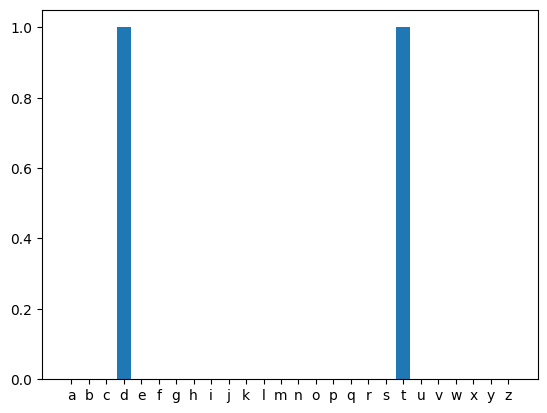

Length: 28, Position: 3


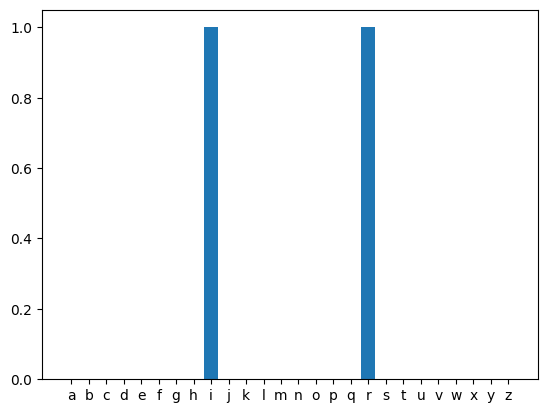

Length: 28, Position: 4


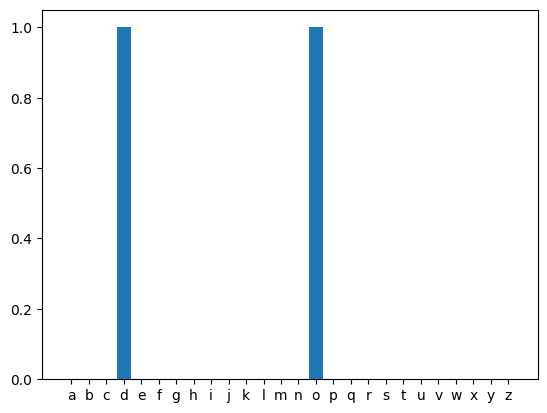

Length: 28, Position: 5


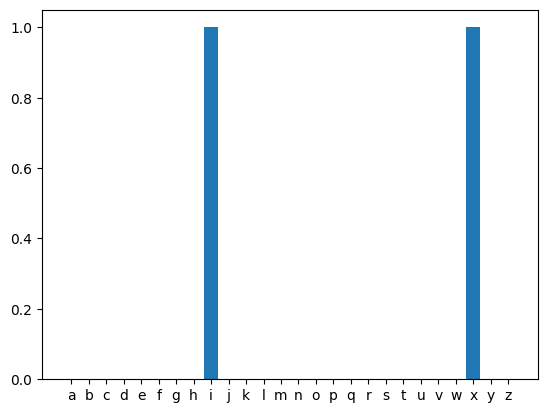

Length: 28, Position: 6


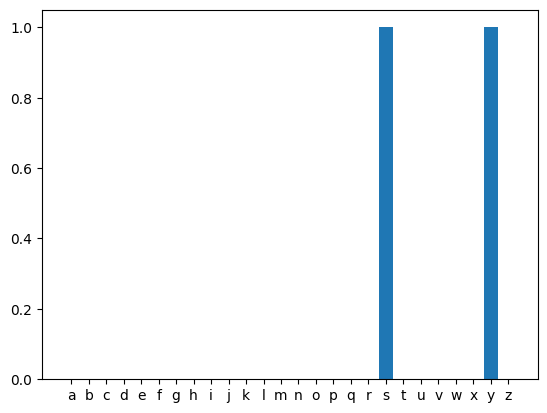

Length: 28, Position: 7


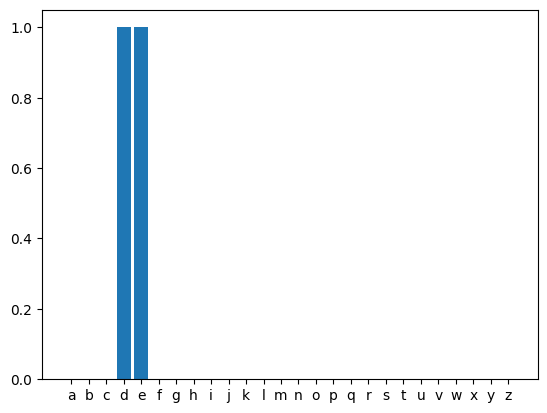

Length: 28, Position: 8


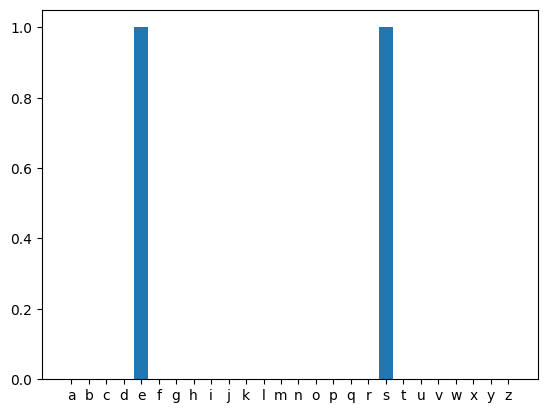

Length: 28, Position: 9


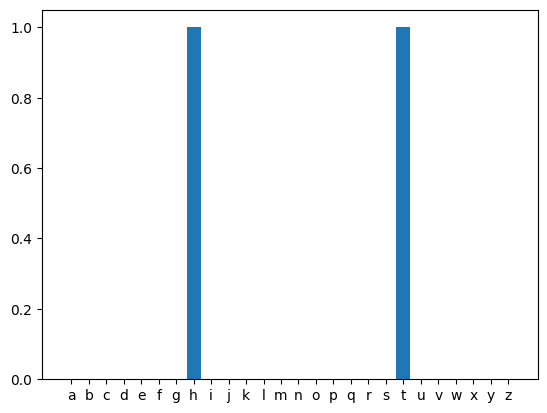

Length: 28, Position: 10


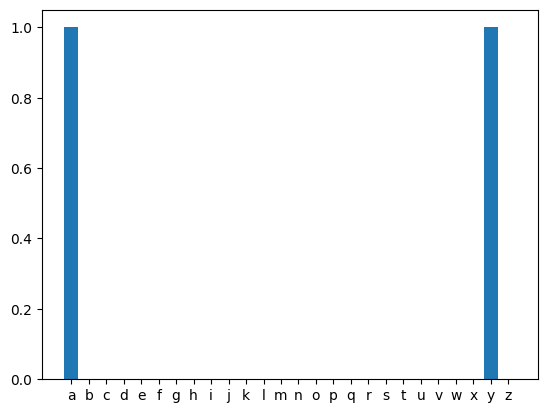

Length: 28, Position: 11


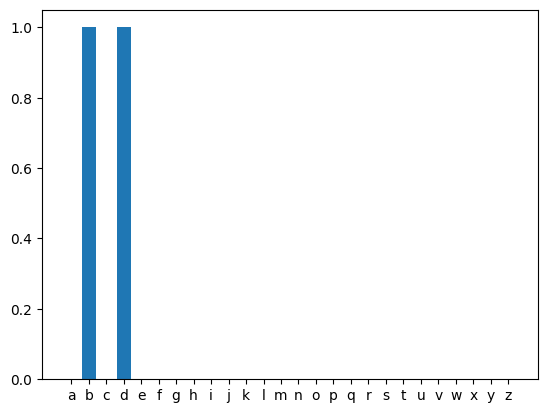

Length: 28, Position: 12


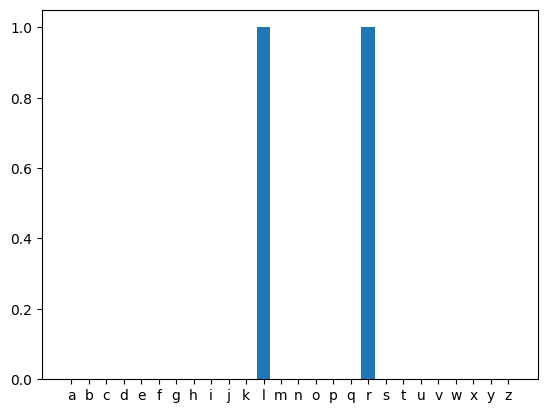

Length: 28, Position: 13


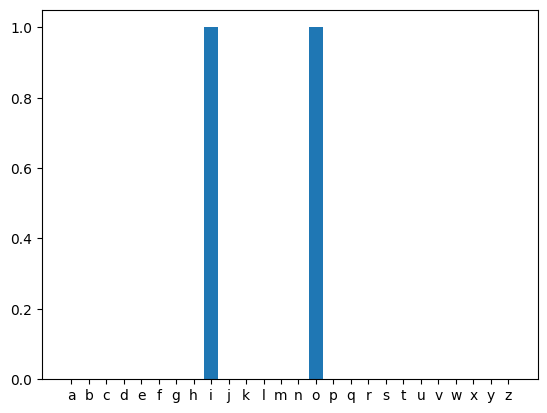

Length: 28, Position: 14


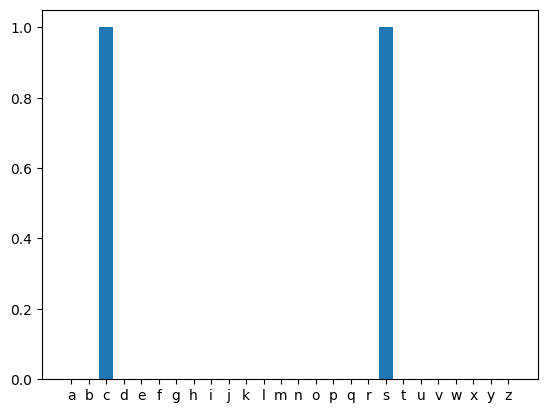

Length: 28, Position: 15


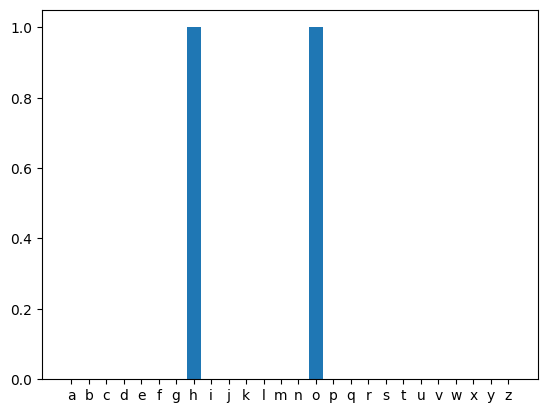

Length: 28, Position: 16


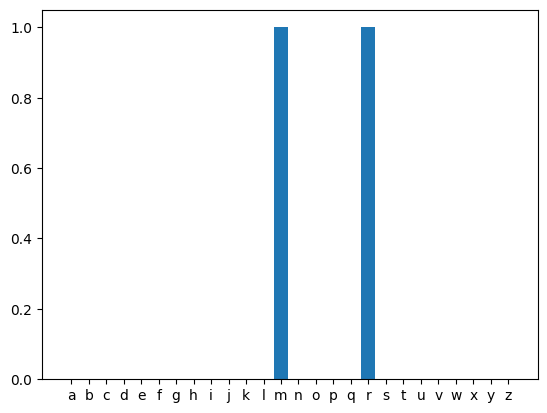

Length: 28, Position: 17


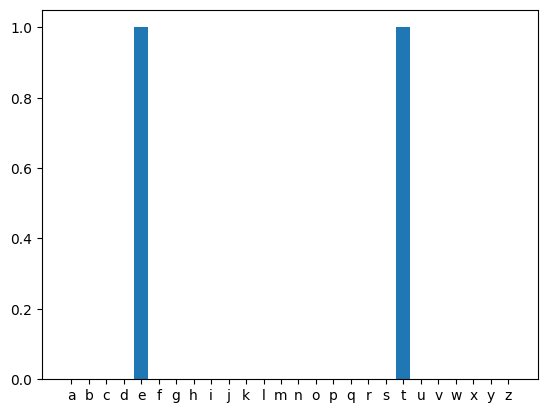

Length: 28, Position: 18


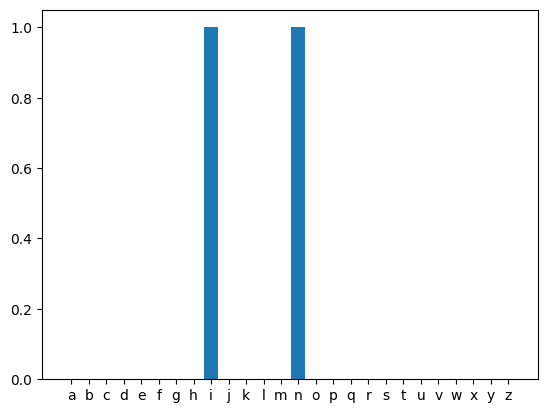

Length: 28, Position: 19


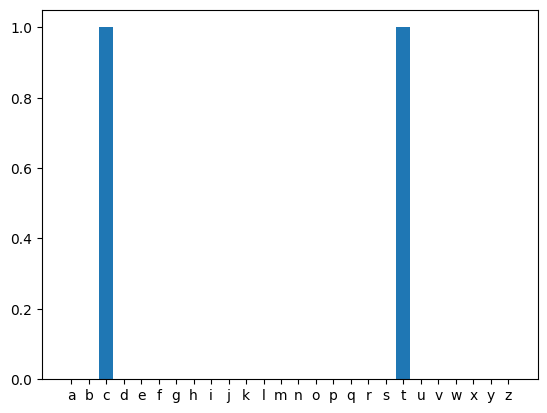

Length: 28, Position: 20


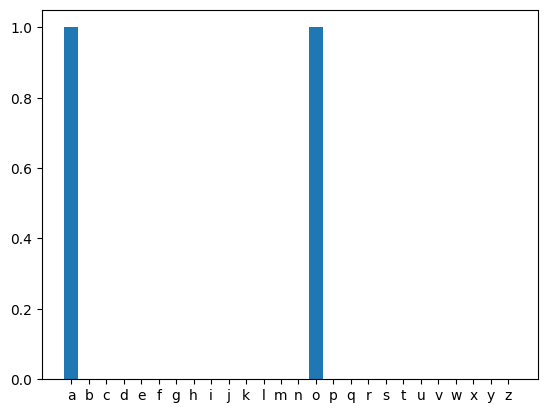

Length: 28, Position: 21


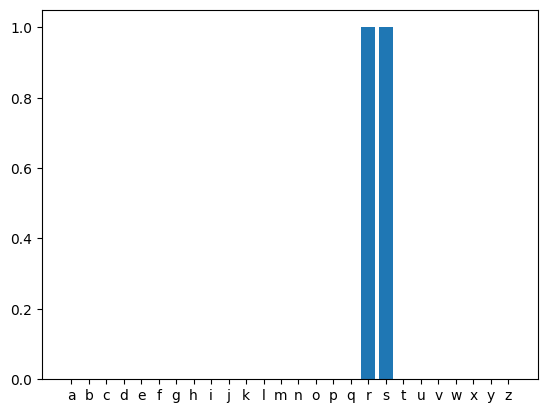

Length: 28, Position: 22


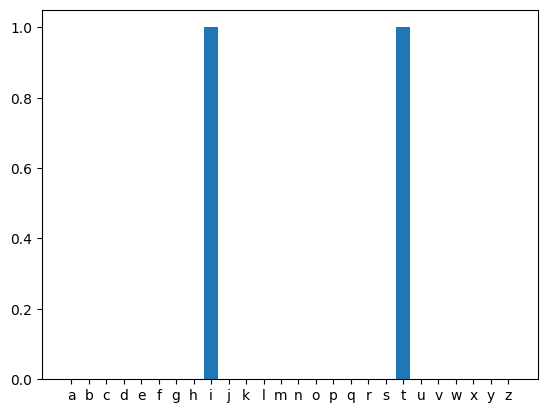

Length: 28, Position: 23


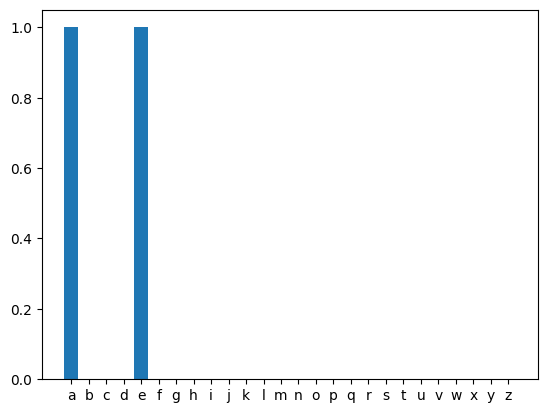

Length: 28, Position: 24


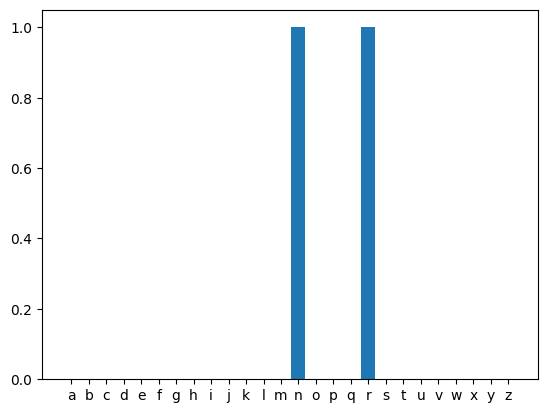

Length: 28, Position: 25


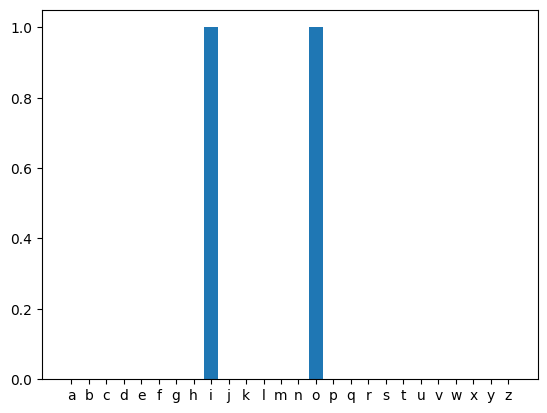

Length: 28, Position: 26


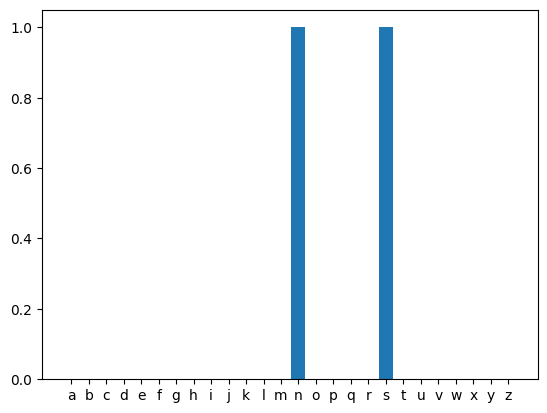

Length: 28, Position: 27


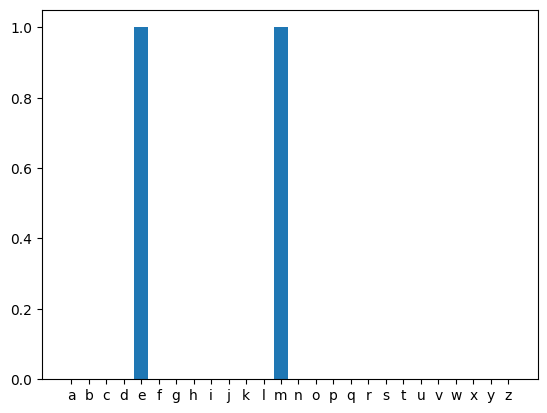

Length: 29, Position: 0


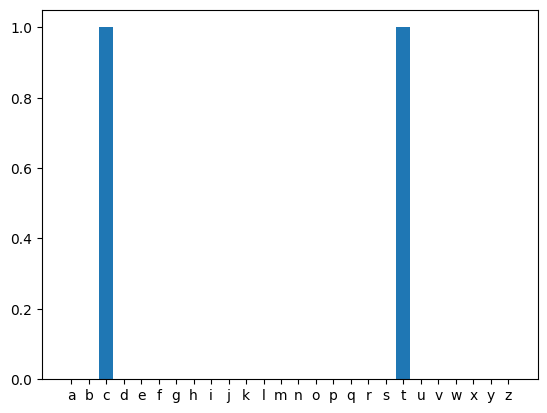

Length: 29, Position: 1


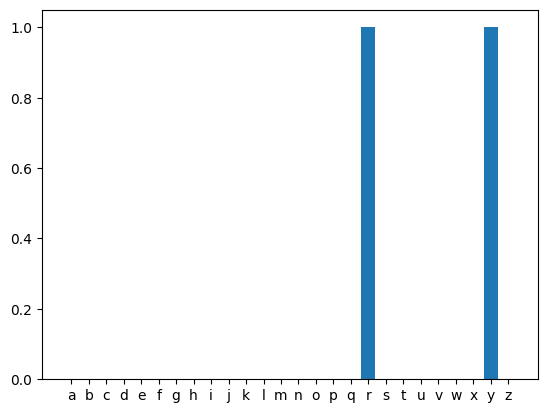

Length: 29, Position: 2


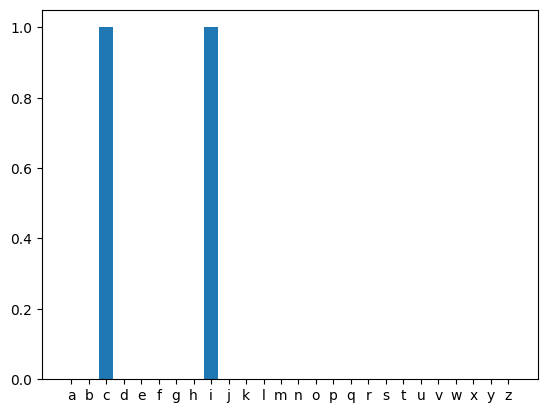

Length: 29, Position: 3


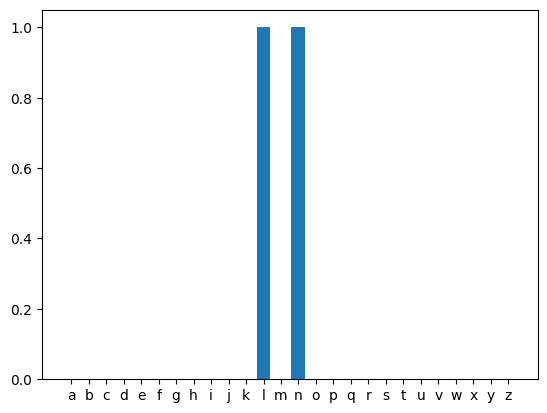

Length: 29, Position: 4


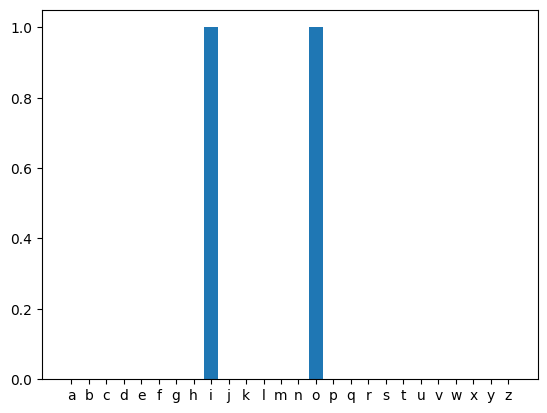

Length: 29, Position: 5


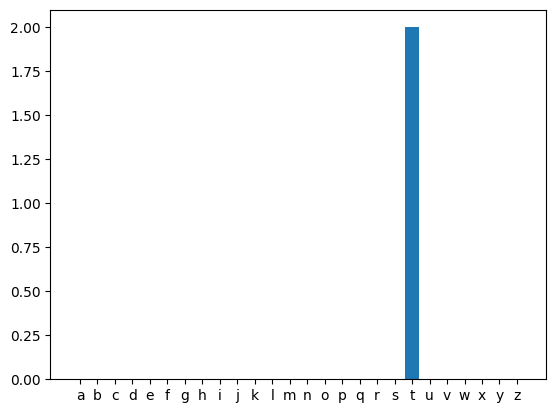

Length: 29, Position: 6


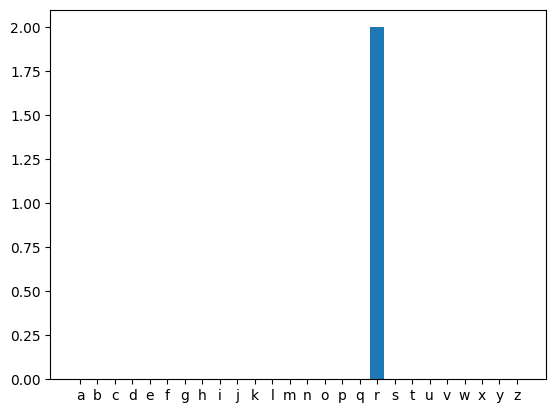

Length: 29, Position: 7


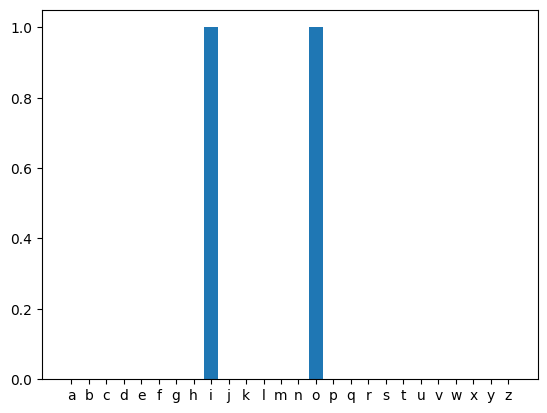

Length: 29, Position: 8


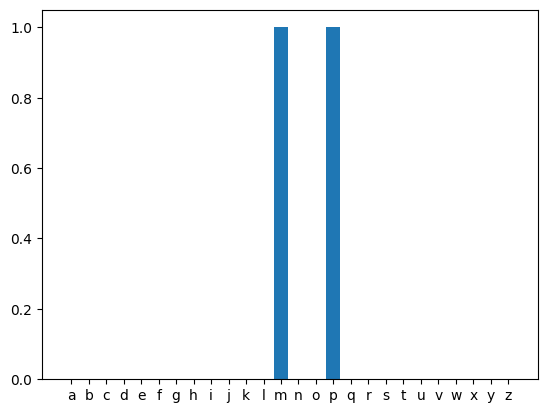

Length: 29, Position: 9


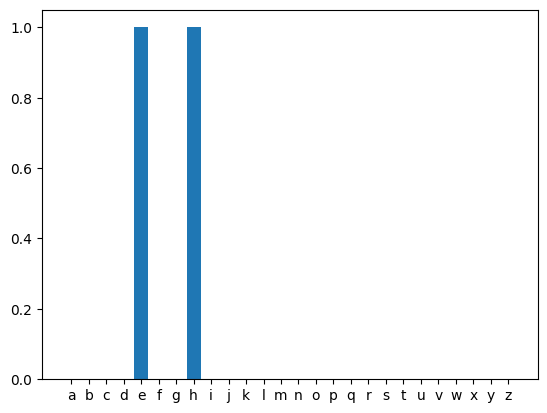

Length: 29, Position: 10


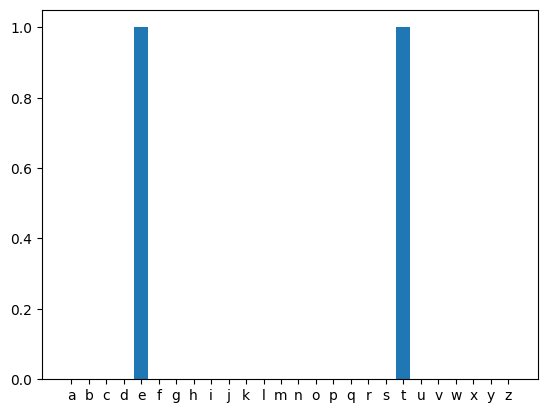

Length: 29, Position: 11


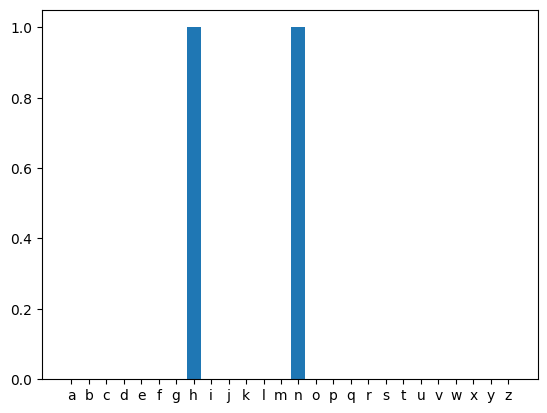

Length: 29, Position: 12


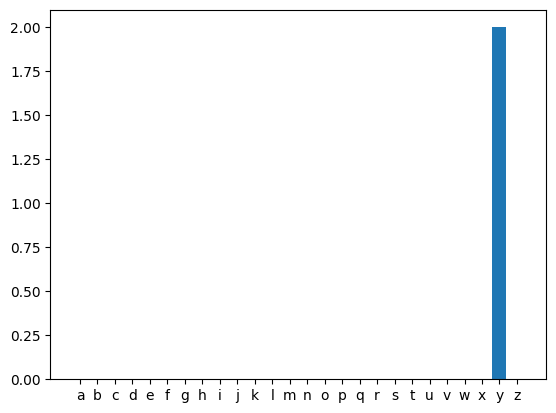

Length: 29, Position: 13


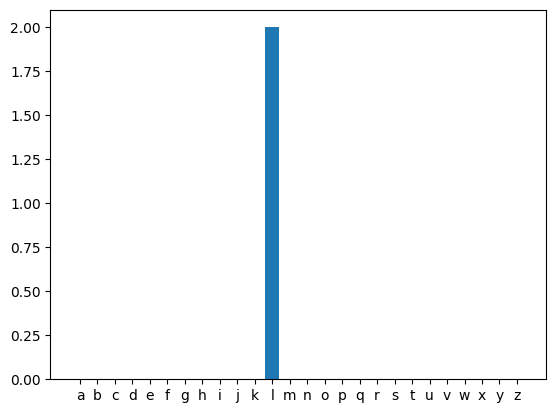

Length: 29, Position: 14


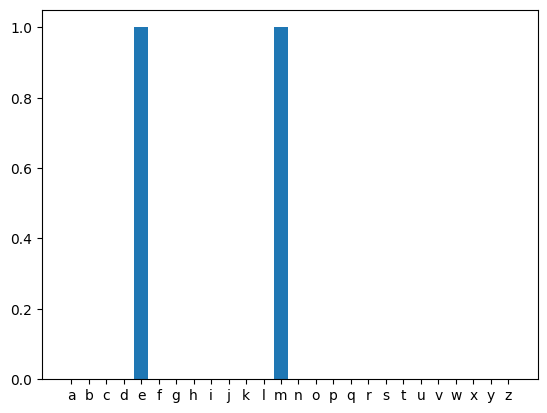

Length: 29, Position: 15


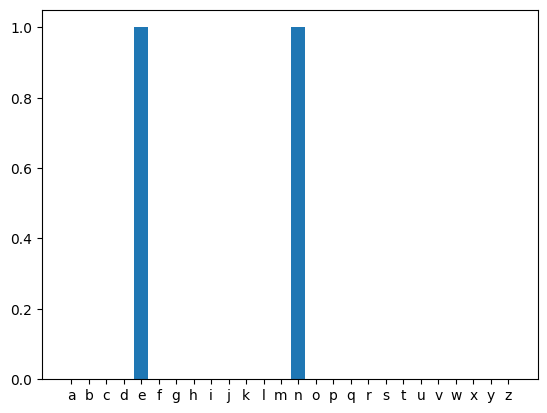

Length: 29, Position: 16


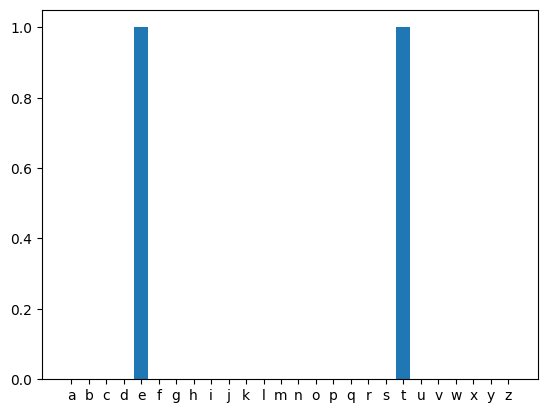

Length: 29, Position: 17


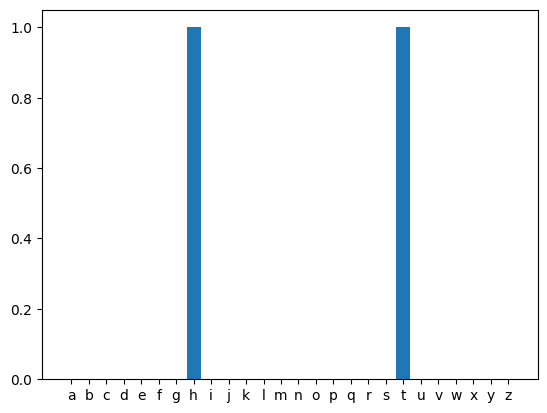

Length: 29, Position: 18


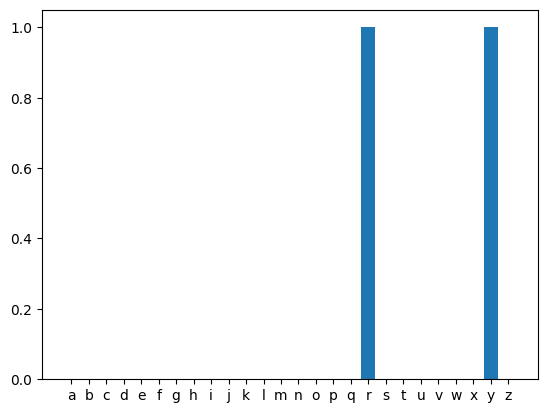

Length: 29, Position: 19


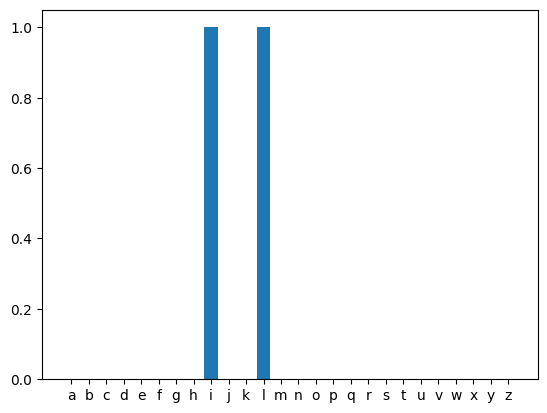

Length: 29, Position: 20


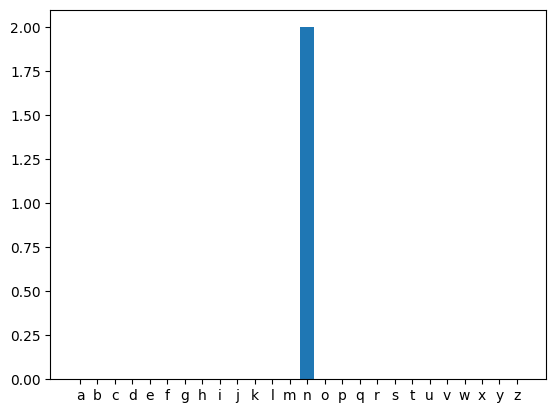

Length: 29, Position: 21


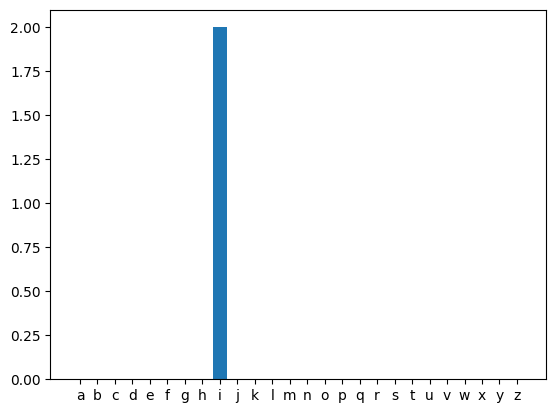

Length: 29, Position: 22


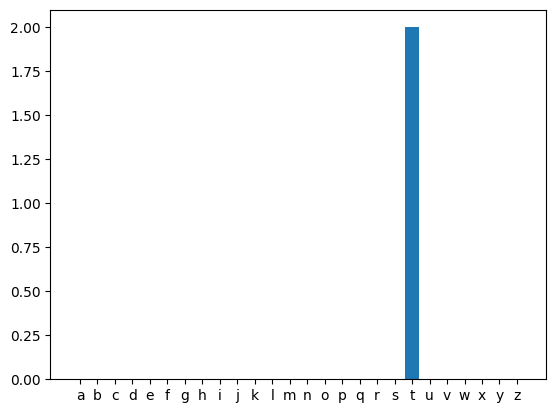

Length: 29, Position: 23


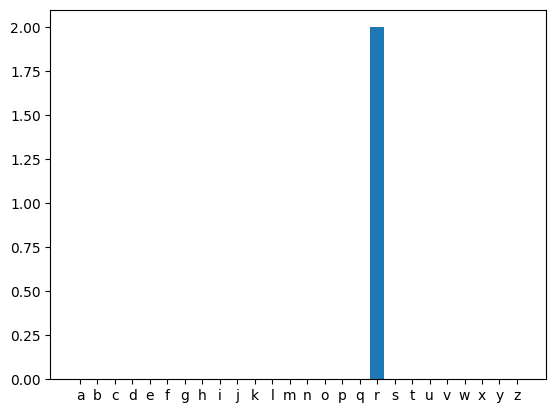

Length: 29, Position: 24


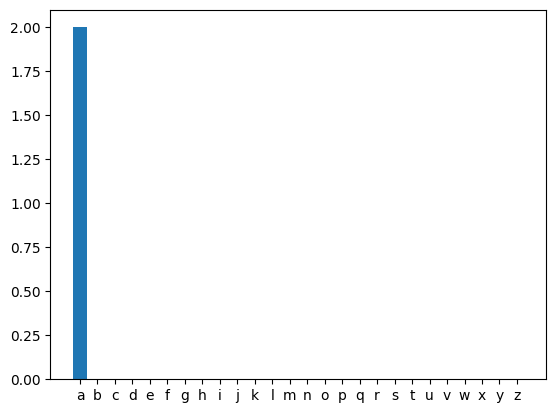

Length: 29, Position: 25


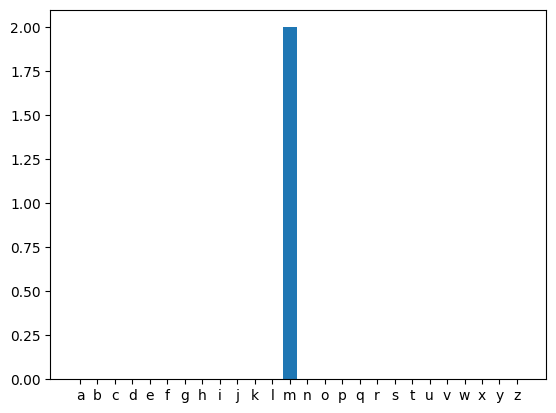

Length: 29, Position: 26


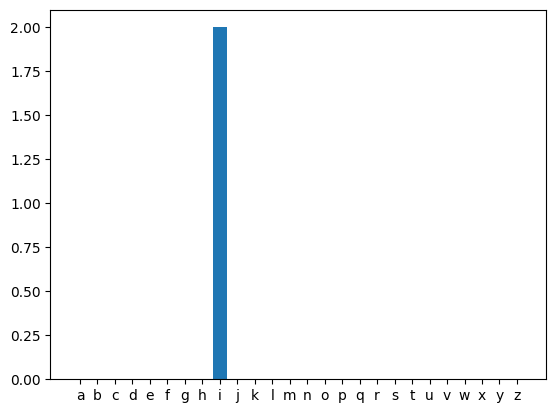

Length: 29, Position: 27


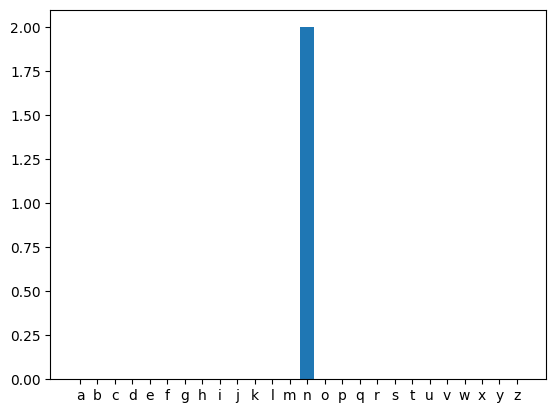

Length: 29, Position: 28


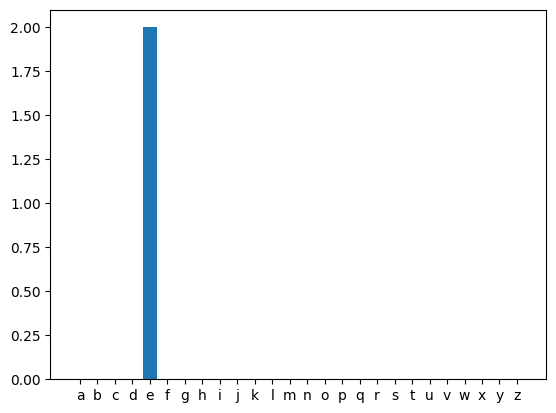

Length: 30, Position: 0


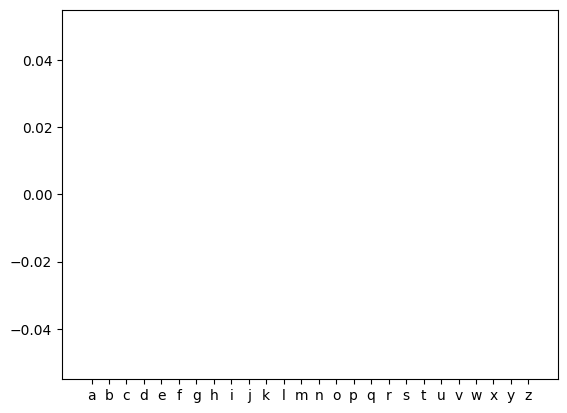

Length: 30, Position: 1


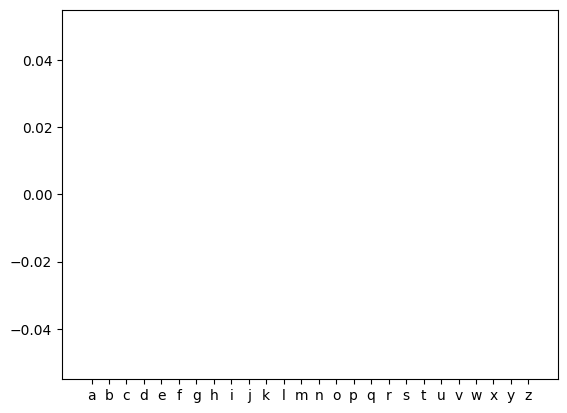

Length: 30, Position: 2


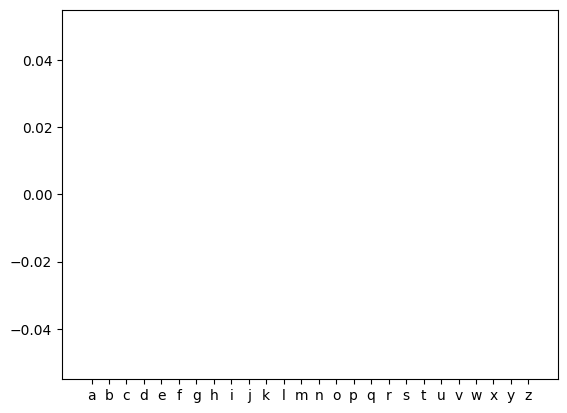

Length: 30, Position: 3


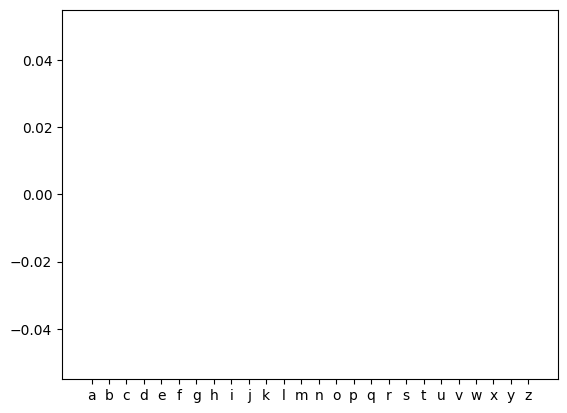

Length: 30, Position: 4


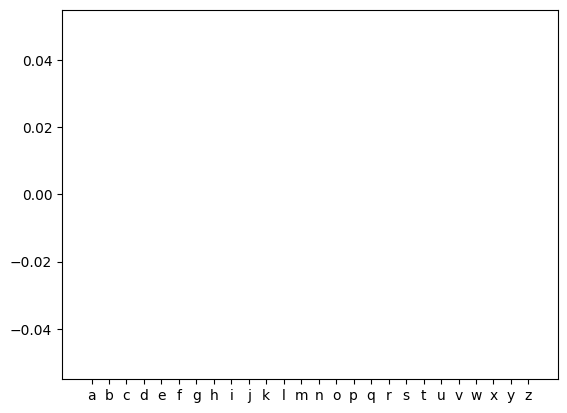

Length: 30, Position: 5


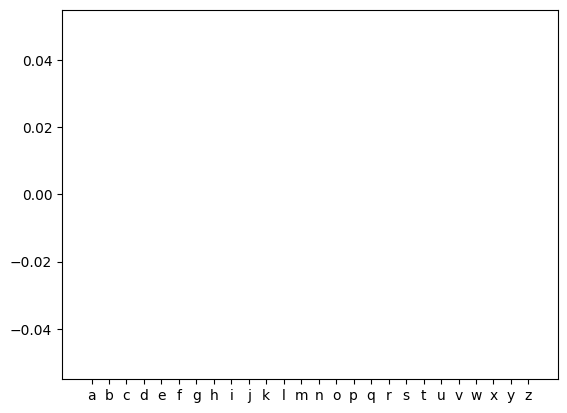

Length: 30, Position: 6


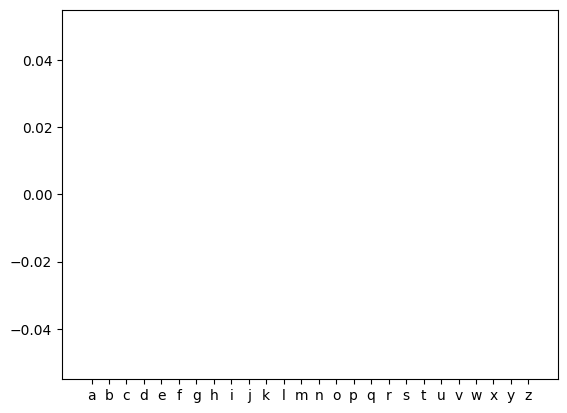

Length: 30, Position: 7


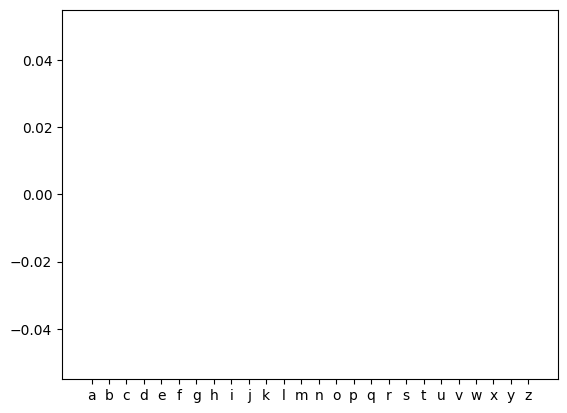

Length: 30, Position: 8


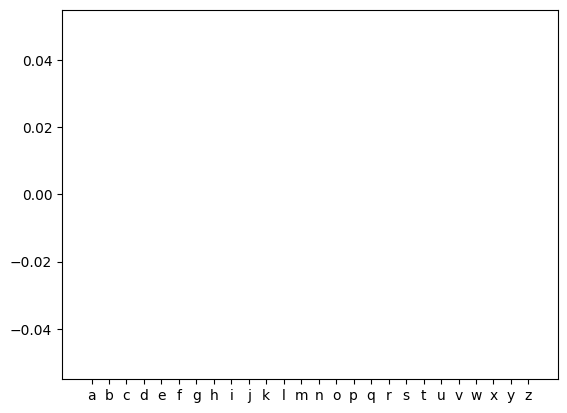

Length: 30, Position: 9


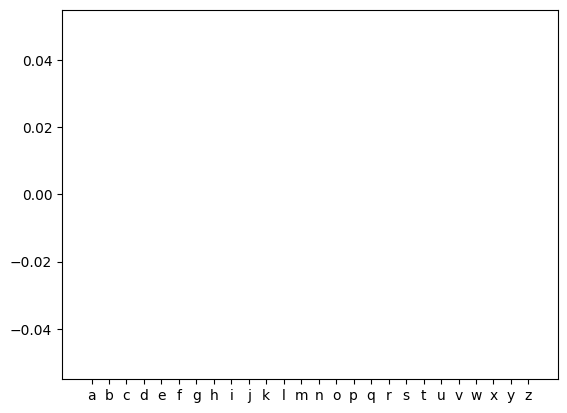

Length: 30, Position: 10


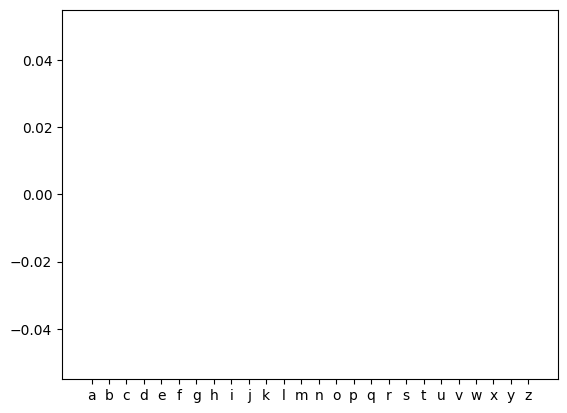

Length: 30, Position: 11


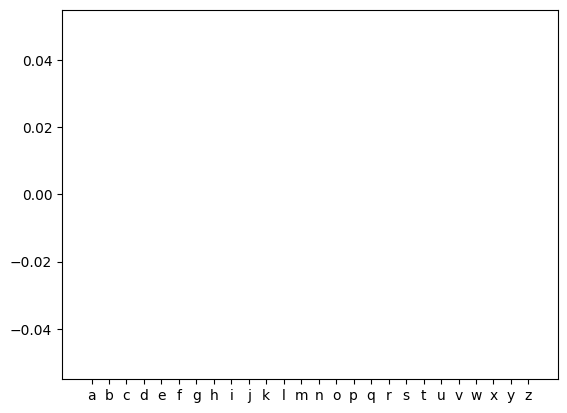

Length: 30, Position: 12


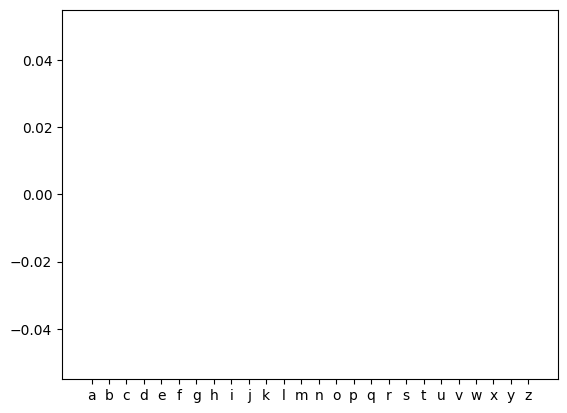

Length: 30, Position: 13


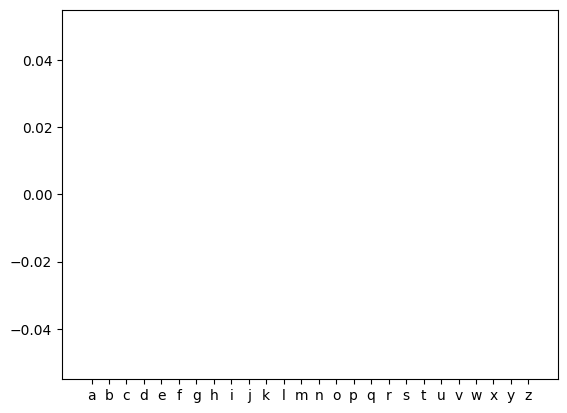

Length: 30, Position: 14


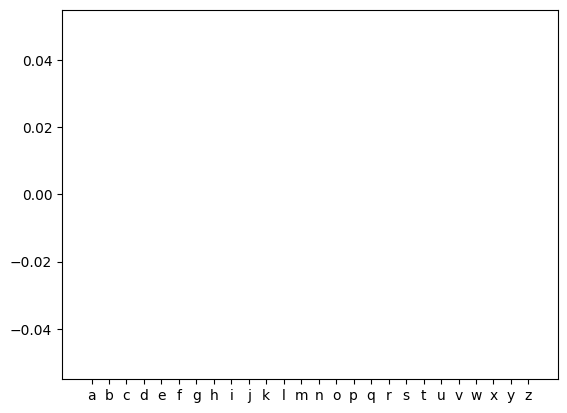

Length: 30, Position: 15


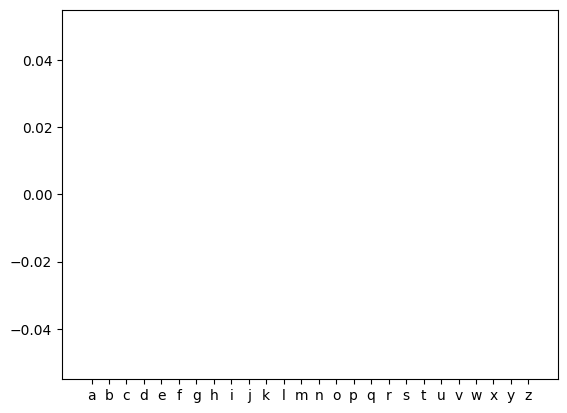

Length: 30, Position: 16


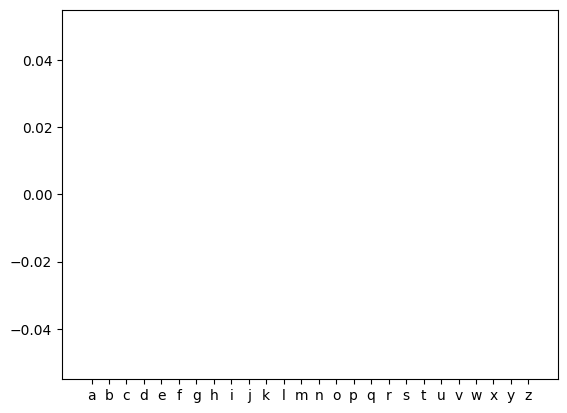

Length: 30, Position: 17


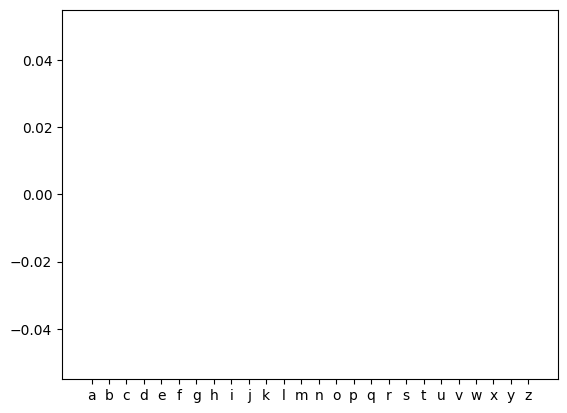

Length: 30, Position: 18


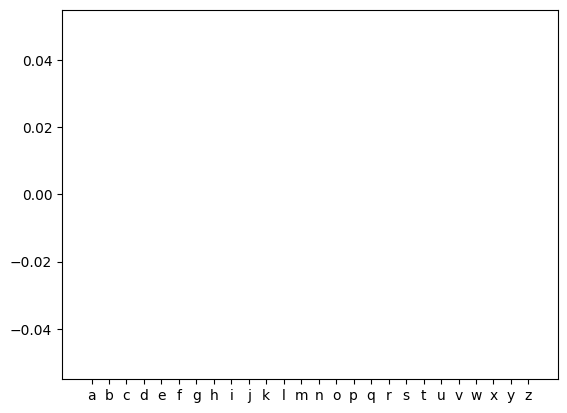

Length: 30, Position: 19


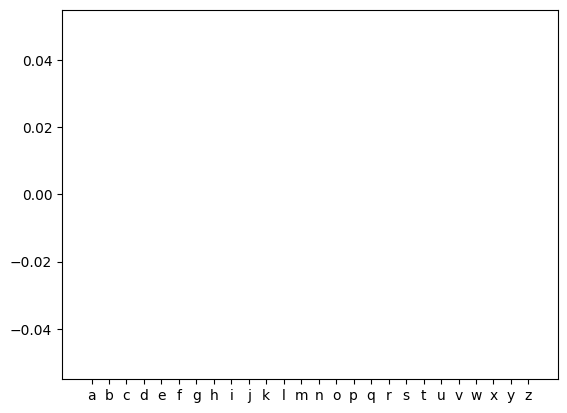

Length: 30, Position: 20


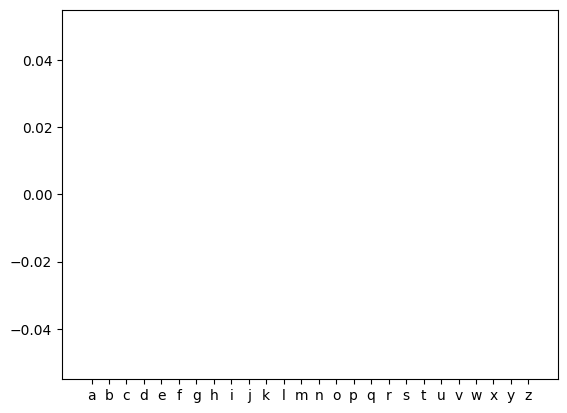

Length: 30, Position: 21


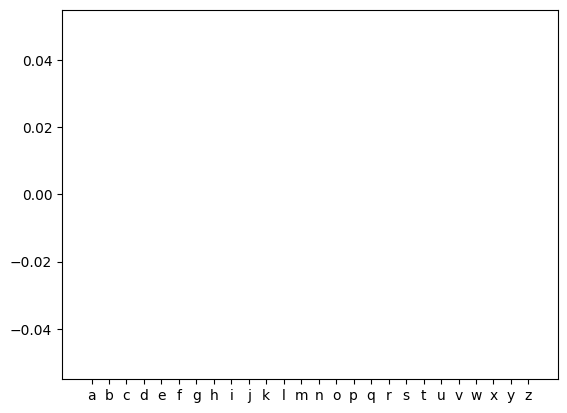

Length: 30, Position: 22


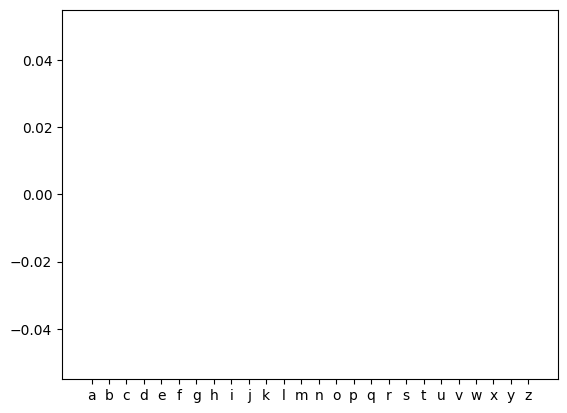

Length: 30, Position: 23


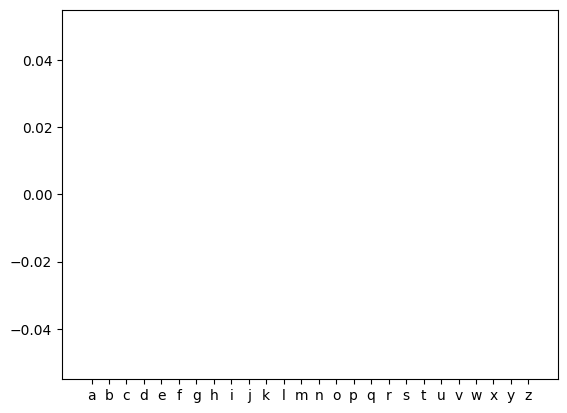

Length: 30, Position: 24


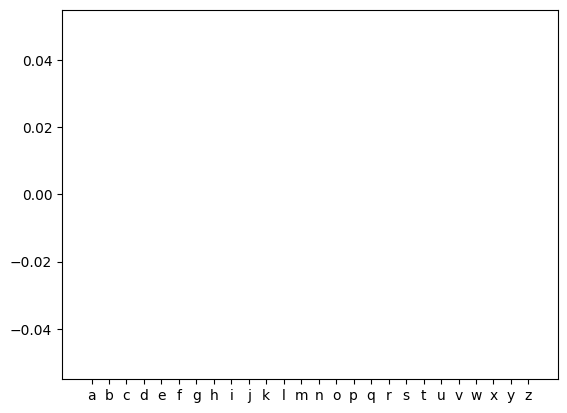

Length: 30, Position: 25


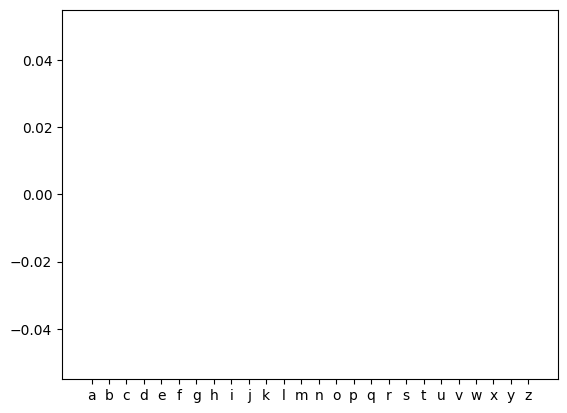

Length: 30, Position: 26


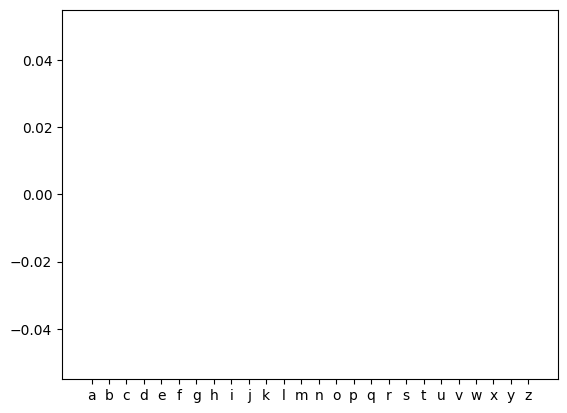

Length: 30, Position: 27


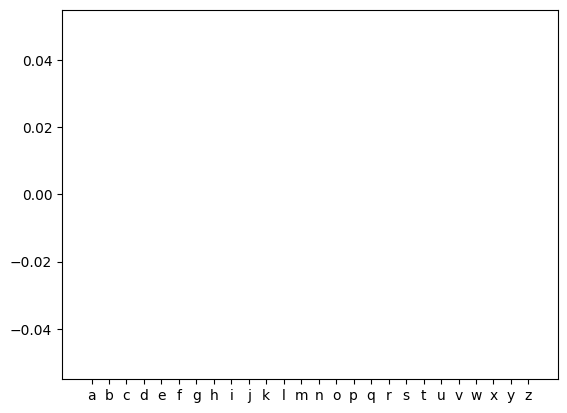

Length: 30, Position: 28


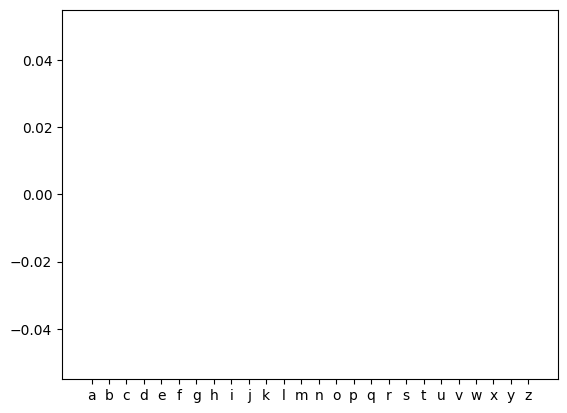

Length: 30, Position: 29


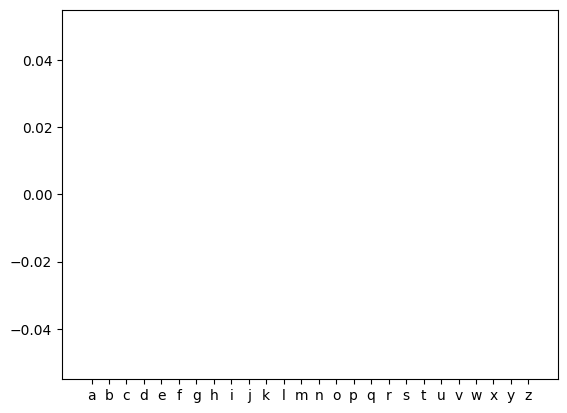

Length: 31, Position: 0


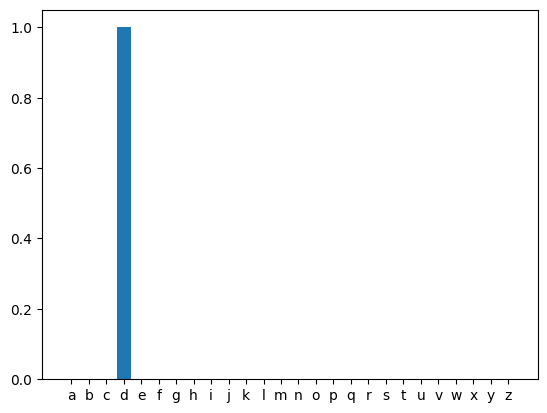

Length: 31, Position: 1


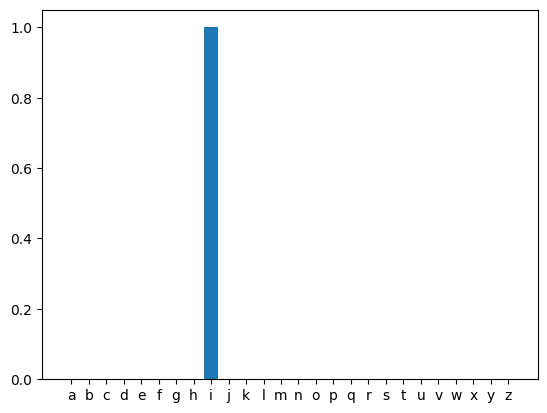

Length: 31, Position: 2


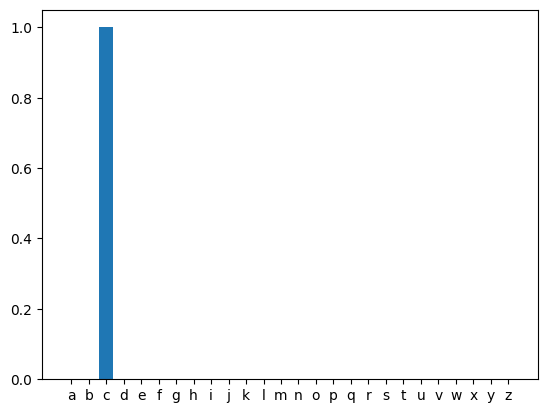

Length: 31, Position: 3


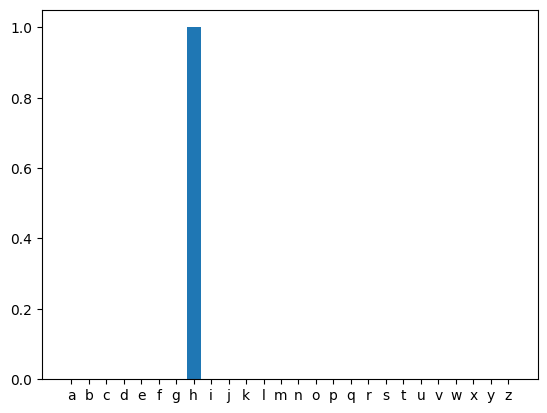

Length: 31, Position: 4


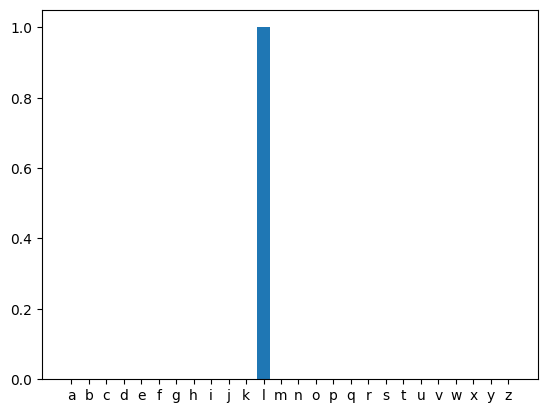

Length: 31, Position: 5


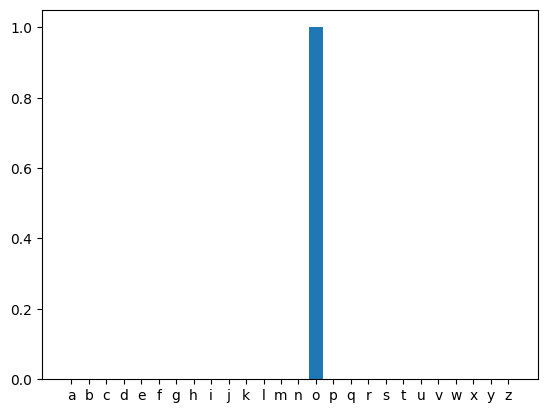

Length: 31, Position: 6


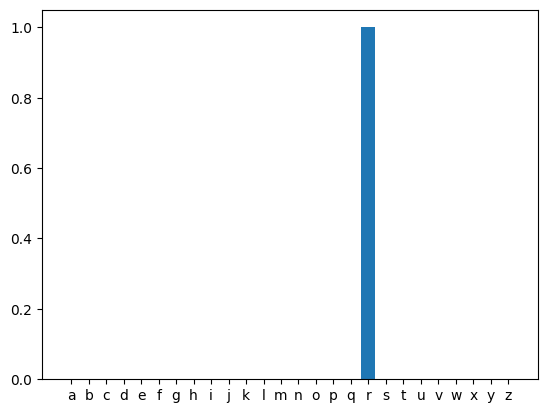

Length: 31, Position: 7


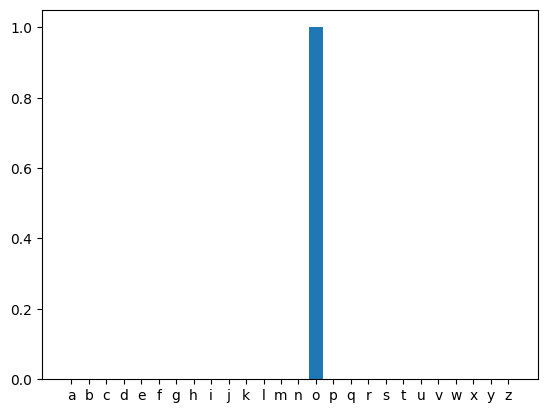

Length: 31, Position: 8


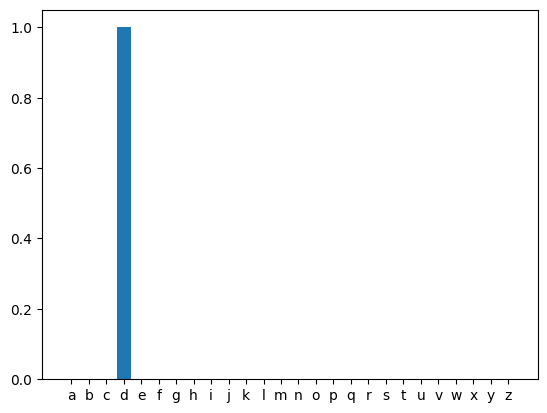

Length: 31, Position: 9


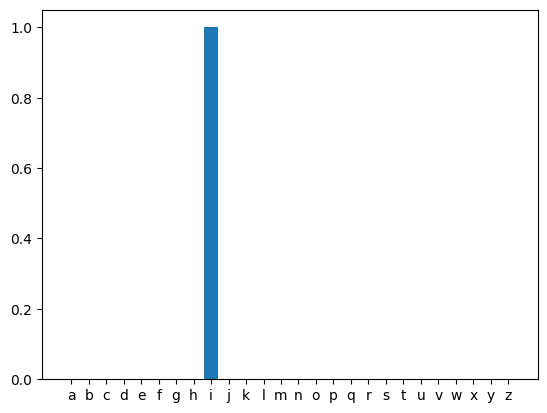

Length: 31, Position: 10


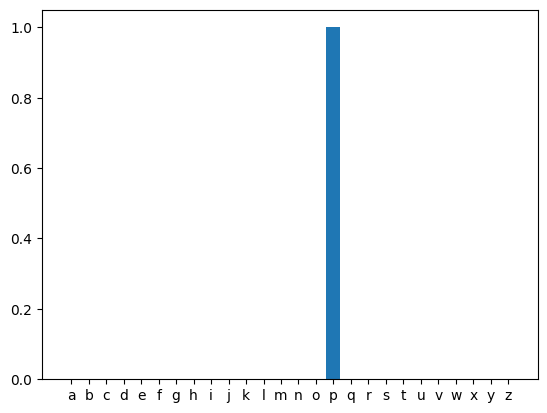

Length: 31, Position: 11


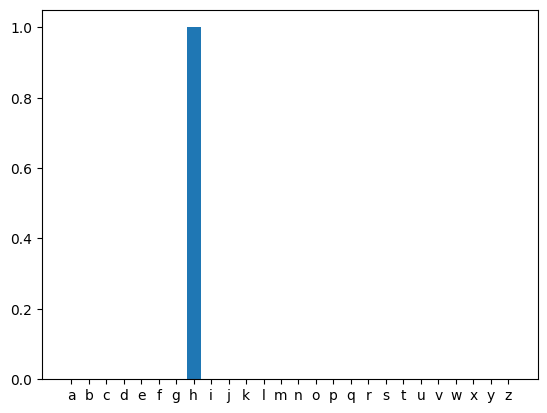

Length: 31, Position: 12


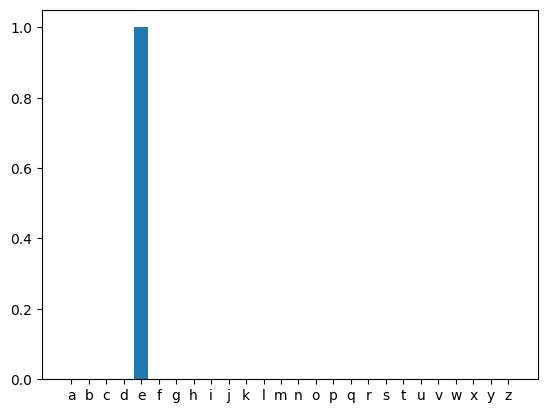

Length: 31, Position: 13


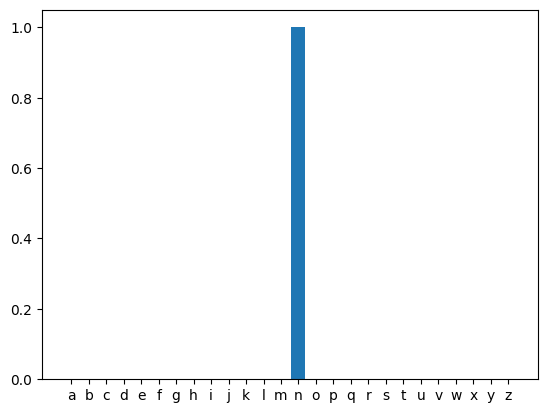

Length: 31, Position: 14


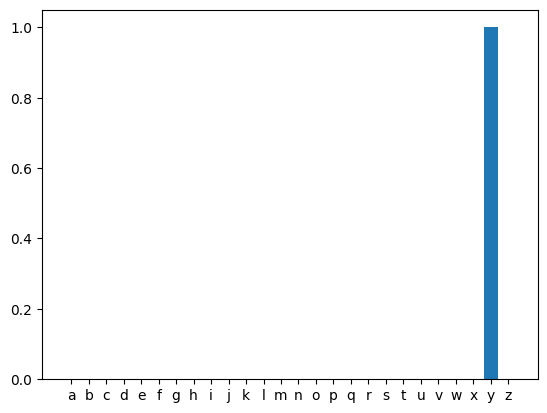

Length: 31, Position: 15


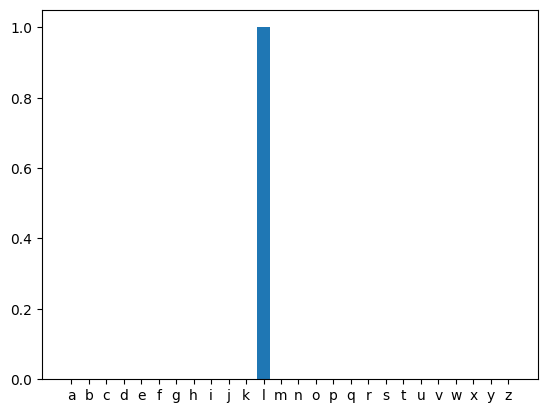

Length: 31, Position: 16


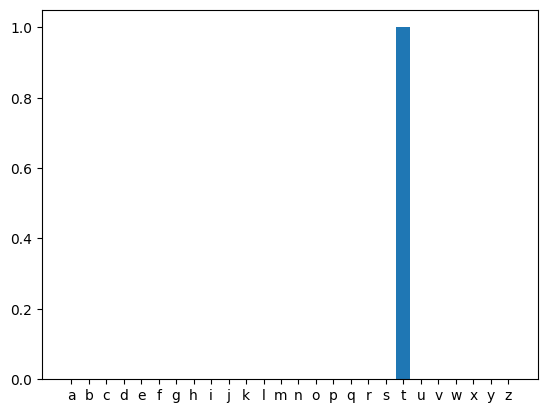

Length: 31, Position: 17


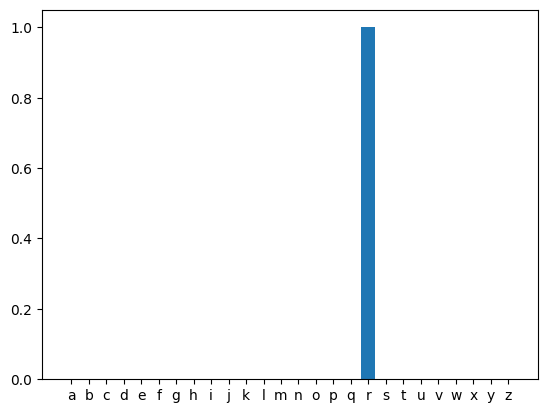

Length: 31, Position: 18


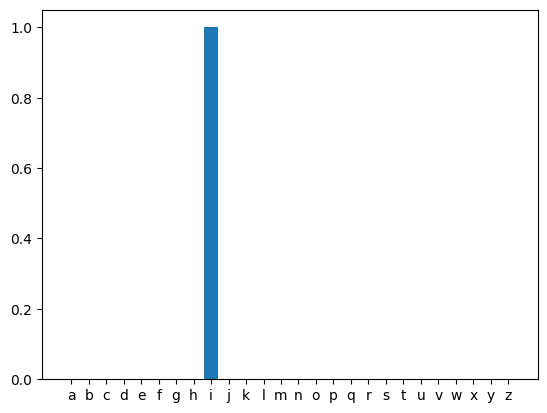

Length: 31, Position: 19


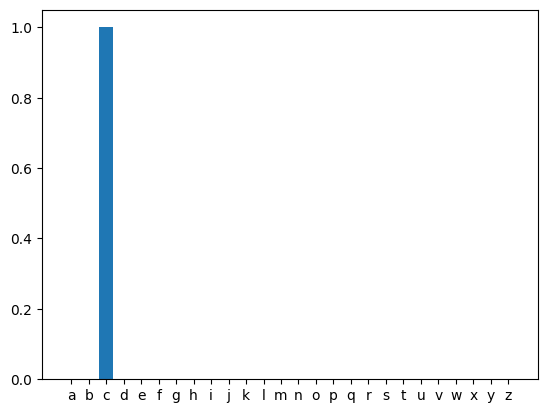

Length: 31, Position: 20


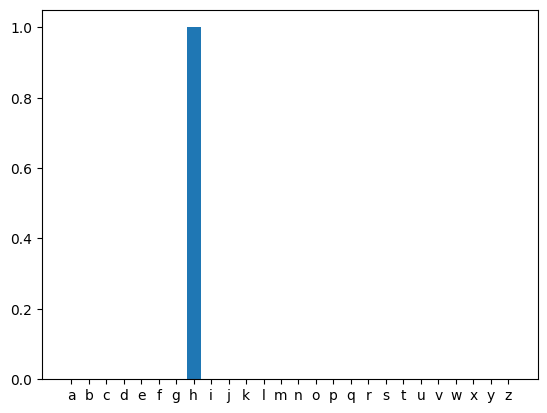

Length: 31, Position: 21


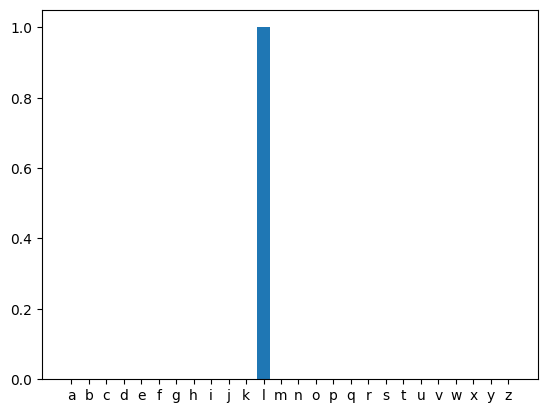

Length: 31, Position: 22


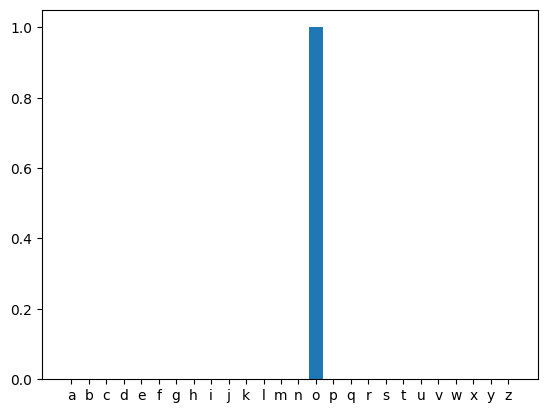

Length: 31, Position: 23


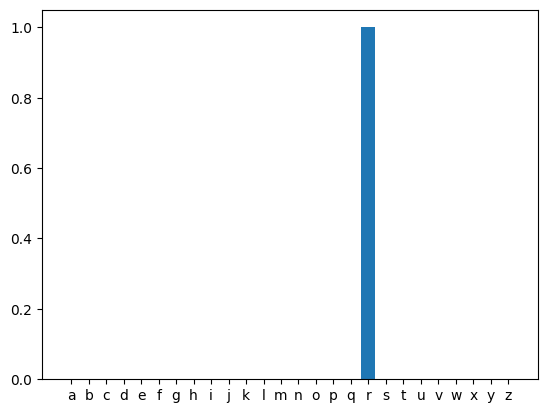

Length: 31, Position: 24


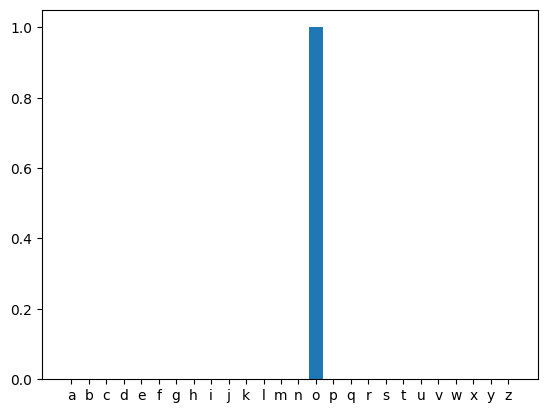

Length: 31, Position: 25


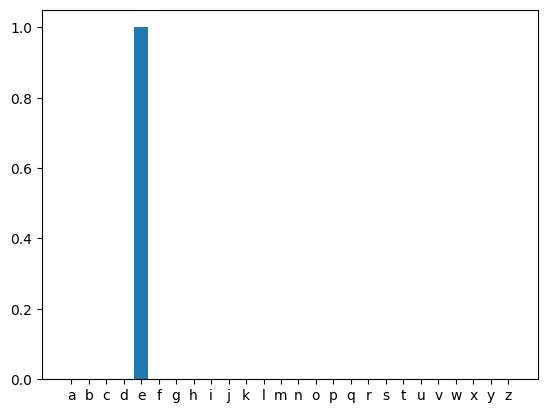

Length: 31, Position: 26


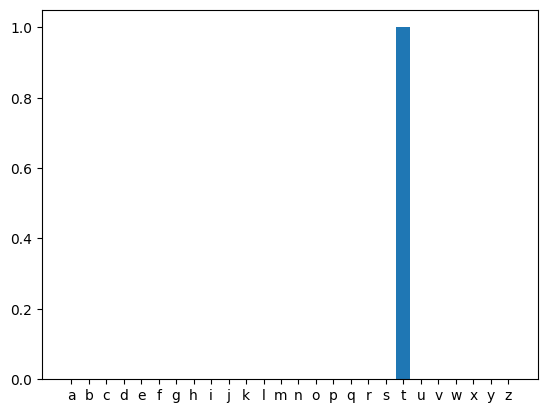

Length: 31, Position: 27


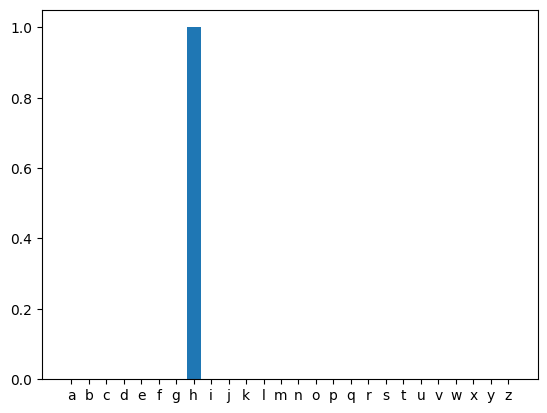

Length: 31, Position: 28


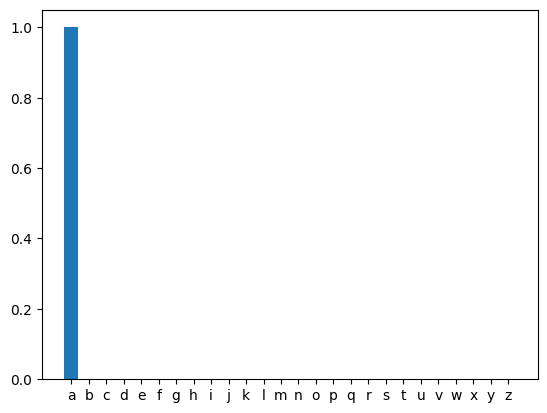

Length: 31, Position: 29


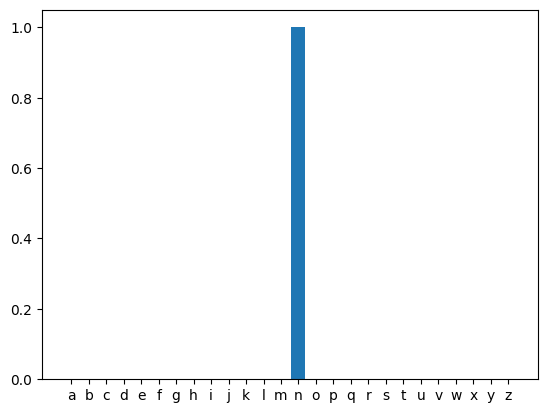

Length: 31, Position: 30


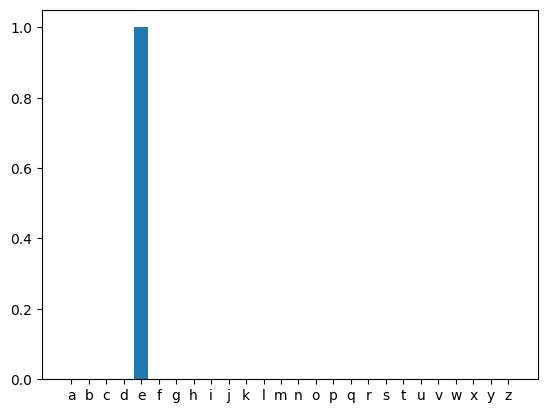

In [212]:
position_frequencies, position_percentages = compute_position_frequencies()
plot_position_frequencies(position_frequencies)

In [223]:
def get_position_frequency_score(word):
    return sum([position_percentages[len(word)][i][char] for i, char in enumerate(word)])

In [228]:
def sort_by_position_frequency_score(words):
    return sorted(words, key = lambda word: get_position_frequency_score(word))[::-1]

In [229]:
sort_by_position_frequency_score(word_lengths[5])[:10]

['sanes',
 'sales',
 'sores',
 'cares',
 'bares',
 'sates',
 'tares',
 'pares',
 'sones',
 'seres']